In [ ]:
import os
import xml.etree.ElementTree as ET
import shutil
from ultralytics import YOLO
import cv2
from google.colab import drive
drive.mount('/content/drive')
# **Step 1: Dataset Preparation**
class XMLToYOLOConverter:
    def __init__(self, xml_folder, image_folder, output_folder):
        self.xml_folder = xml_folder
        self.image_folder = image_folder
        self.output_images = os.path.join(output_folder, "images")
        self.output_labels = os.path.join(output_folder, "labels")
        os.makedirs(self.output_images, exist_ok=True)
        os.makedirs(self.output_labels, exist_ok=True)

    @staticmethod
    def convert_xml_to_yolo(xml_file, image_width, image_height):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        yolo_labels = []
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            class_id = 0  # Assuming only license plates, class ID is 0

            # Extract bounding box coordinates
            xmin = int(obj.find(".//bndbox/xmin").text)
            ymin = int(obj.find(".//bndbox/ymin").text)
            xmax = int(obj.find(".//bndbox/xmax").text)
            ymax = int(obj.find(".//bndbox/ymax").text)

            # Convert to YOLO format
            x_center = (xmin + xmax) / 2 / image_width
            y_center = (ymin + ymax) / 2 / image_height
            width = (xmax - xmin) / image_width
            height = (ymax - ymin) / image_height

            yolo_labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

        return yolo_labels

    def process_annotations(self):
        for xml_file in os.listdir(self.xml_folder):
            if xml_file.endswith('.xml'):
                xml_path = os.path.join(self.xml_folder, xml_file)
                image_name = xml_file.replace('.xml', '.jpg')
                image_path = os.path.join(self.image_folder, image_name)

                if not os.path.exists(image_path):
                    continue

                # Copy image to YOLO dataset folder
                shutil.copy(image_path, os.path.join(self.output_images, image_name))

                # Get image dimensions
                image = cv2.imread(image_path)
                image_height, image_width = image.shape[:2]

                # Convert XML to YOLO format
                yolo_labels = self.convert_xml_to_yolo(xml_path, image_width, image_height)

                # Write YOLO labels to text file
                label_file = os.path.join(self.output_labels, image_name.replace('.jpg', '.txt'))
                with open(label_file, 'w') as f:
                    f.write("\n".join(yolo_labels))

        print("Dataset preparation complete!")

# **Step 2: YOLOv8 Training**
def train_yolo_model(data_yaml, model_path="yolov8n.pt", epochs=50):
    # Train the YOLOv8 model
    model = YOLO(model_path)  # Load YOLOv8 model (e.g., yolov8n.pt for Nano)
    model.train(data=data_yaml, epochs=epochs, imgsz=224)
    model.save("license_plate_model.pt")  # Save the trained model
    print("Model training complete!")

# **Step 3: Main Function**
def main():
    # Paths

# Path to the input image and YOLOv8 model weights
   # xml_folder = '/content/drive/My Drive/licence_number/'
    #image_folder = '/content/drive/My Drive/images_lpv/'
    xml_folder =   '/content/drive/My Drive/licence_number/'# Folder containing XML files
    image_folder = '/content/drive/My Drive/images/' # Folder containing images
    output_folder = '/content/drive/My Drive/yolo_dataset/'  # Output folder for YOLO dataset
    data_yaml = '/content/drive/My Drive/yolo_dataset/data.yaml'  # YAML file for YOLO training

    # Step 1: Prepare Dataset
    converter = XMLToYOLOConverter(xml_folder, image_folder, output_folder)
    converter.process_annotations()

    # Step 2: Create YAML File
    yaml_content = f"""
    path: {output_folder}
    train: images
    val: images
    nc: 1
    names: ['license_plate']
    """
    with open(data_yaml, 'w') as f:
        f.write(yaml_content)

    # Step 3: Train YOLOv8 Model
    train_yolo_model(data_yaml, model_path="yolov8n.pt", epochs=50)

if __name__ == "__main__":
    main()


Mounted at /content/drive
Dataset preparation complete!


100%|██████████| 6.25M/6.25M [00:00<00:00, 168MB/s]


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 34.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 164MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/yolo_dataset/labels... 602 images, 0 backgrounds, 0 corrupt: 100%|██████████| 602/602 [00:06<00:00, 87.35it/s] 


train: New cache created: /content/drive/My Drive/yolo_dataset/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/yolo_dataset/labels.cache... 602 images, 0 backgrounds, 0 corrupt: 100%|██████████| 602/602 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.375G      2.164      2.583      1.314         13        224: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        602        602    0.00675      0.992      0.598      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.357G      1.409      1.057     0.9418         21        224: 100%|██████████| 38/38 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        602        602      0.978      0.807      0.969       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.357G      1.393     0.9649     0.9484         21        224: 100%|██████████| 38/38 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.76it/s]

                   all        602        602       0.89      0.934      0.954      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.367G      1.307     0.8891     0.9293         14        224: 100%|██████████| 38/38 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]

                   all        602        602      0.981      0.966      0.991      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.354G       1.29     0.8301     0.9257         16        224: 100%|██████████| 38/38 [00:09<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.89it/s]

                   all        602        602      0.978      0.979      0.993       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.365G      1.259     0.7935     0.9077         17        224: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        602        602      0.973      0.976      0.991       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.354G      1.244     0.7529     0.9132         20        224: 100%|██████████| 38/38 [00:06<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.43it/s]


                   all        602        602      0.983      0.971      0.989      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.365G       1.14     0.6936     0.8954         21        224: 100%|██████████| 38/38 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.15it/s]

                   all        602        602      0.976      0.988      0.994       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.354G      1.179      0.702     0.8927         16        224: 100%|██████████| 38/38 [00:09<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]


                   all        602        602      0.975      0.983      0.992      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.365G      1.183     0.6874       0.89         19        224: 100%|██████████| 38/38 [00:07<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.19it/s]

                   all        602        602      0.982      0.992      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.354G       1.11     0.6907     0.8843         14        224: 100%|██████████| 38/38 [00:06<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        602        602      0.987      0.978      0.994      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.365G      1.129     0.6923     0.8814         20        224: 100%|██████████| 38/38 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.06it/s]

                   all        602        602      0.965      0.982      0.991      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.354G      1.114     0.6502     0.8856         21        224: 100%|██████████| 38/38 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]

                   all        602        602      0.992      0.976      0.994      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.363G       1.12     0.6371     0.8889         18        224: 100%|██████████| 38/38 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.70it/s]

                   all        602        602      0.991      0.988      0.994      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.352G      1.111     0.6291     0.8857         15        224: 100%|██████████| 38/38 [00:06<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        602        602      0.982      0.996      0.994      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.363G      1.068     0.6225     0.8839         18        224: 100%|██████████| 38/38 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.68it/s]

                   all        602        602      0.997      0.988      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.352G      1.059      0.619     0.8668         18        224: 100%|██████████| 38/38 [00:07<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.11it/s]

                   all        602        602      0.995      0.998      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.365G      1.047     0.6007     0.8696         17        224: 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]

                   all        602        602      0.988      0.996      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.352G      1.053     0.6025     0.8606         18        224: 100%|██████████| 38/38 [00:07<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]

                   all        602        602      0.992      0.995      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.365G     0.9767     0.5807     0.8658         28        224: 100%|██████████| 38/38 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.32it/s]

                   all        602        602      0.993          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.352G      1.008     0.5549     0.8657         20        224: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]

                   all        602        602      0.992          1      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.365G      1.042     0.5838     0.8655         24        224: 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]

                   all        602        602      0.987      0.997      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.352G     0.9901     0.5492     0.8548         16        224: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]

                   all        602        602      0.987      0.993      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.363G     0.9759     0.5468     0.8572         17        224: 100%|██████████| 38/38 [00:06<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

                   all        602        602      0.998      0.993      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.352G      0.996      0.546     0.8626         14        224: 100%|██████████| 38/38 [00:06<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.12it/s]

                   all        602        602      0.995      0.996      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.363G      1.013     0.5595     0.8646         18        224: 100%|██████████| 38/38 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]

                   all        602        602      0.995      0.997      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.354G     0.9601     0.5406     0.8569         24        224: 100%|██████████| 38/38 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]

                   all        602        602      0.997      0.995      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.363G     0.9337     0.5226     0.8492         15        224: 100%|██████████| 38/38 [00:06<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.49it/s]

                   all        602        602      0.996      0.998      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.352G     0.9322     0.5235     0.8462         17        224: 100%|██████████| 38/38 [00:06<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.41it/s]

                   all        602        602      0.997      0.995      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.365G      0.915     0.5136     0.8533         21        224: 100%|██████████| 38/38 [00:07<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]


                   all        602        602          1      0.997      0.995       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.354G     0.9345     0.5178     0.8475         12        224: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]


                   all        602        602      0.995      0.996      0.995      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.363G     0.9208     0.5034     0.8463         19        224: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]

                   all        602        602      0.998      0.998      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.354G      0.943     0.5217     0.8507         19        224: 100%|██████████| 38/38 [00:06<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.24it/s]

                   all        602        602      0.995          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.365G     0.9218     0.5112     0.8481         22        224: 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.47it/s]

                   all        602        602      0.998      0.998      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.352G     0.8942     0.4883     0.8427         20        224: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]

                   all        602        602      0.996      0.998      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.363G      0.856     0.4758     0.8302         19        224: 100%|██████████| 38/38 [00:08<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.13it/s]

                   all        602        602      0.998          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.354G     0.8916     0.4895     0.8457         24        224: 100%|██████████| 38/38 [00:06<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        602        602      0.998      0.998      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.363G     0.8763     0.4739     0.8458         12        224: 100%|██████████| 38/38 [00:06<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.65it/s]

                   all        602        602          1          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.354G     0.8765     0.4781     0.8491         22        224: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]

                   all        602        602      0.999      0.997      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.365G     0.8532     0.4684      0.834         20        224: 100%|██████████| 38/38 [00:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.10it/s]

                   all        602        602      0.999          1      0.995      0.818


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.354G     0.8099     0.4544     0.8199         10        224: 100%|██████████| 38/38 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]

                   all        602        602      0.999      0.997      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.365G     0.8083     0.4464     0.8241         10        224: 100%|██████████| 38/38 [00:06<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.06it/s]

                   all        602        602      0.997      0.997      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.354G     0.7659     0.4224     0.8171         10        224: 100%|██████████| 38/38 [00:07<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.43it/s]

                   all        602        602      0.995          1      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.363G     0.7676     0.4219      0.825          9        224: 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]

                   all        602        602      0.995          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.354G     0.7702     0.4263     0.8218         10        224: 100%|██████████| 38/38 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

                   all        602        602      0.995          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.365G     0.7337     0.4166      0.806         10        224: 100%|██████████| 38/38 [00:06<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        602        602      0.992          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.352G     0.7721     0.4192     0.8349         10        224: 100%|██████████| 38/38 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.53it/s]

                   all        602        602      0.993          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.363G       0.72     0.4008     0.8192         10        224: 100%|██████████| 38/38 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]

                   all        602        602      0.998      0.995      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.354G     0.7268     0.3937     0.8099         10        224: 100%|██████████| 38/38 [00:09<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.42it/s]

                   all        602        602      0.998      0.998      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.365G     0.7291      0.402     0.8222         10        224: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        602        602      0.998      0.997      0.995      0.838



50 epochs completed in 0.198 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.09it/s]


                   all        602        602      0.998      0.995      0.995      0.841
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train
Model training complete!


In [ ]:
# LICENCE PLATE NUMBER DETECTION

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x320 1 license_plate, 131.6ms
Speed: 4.5ms preprocess, 131.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)
Recognized License Plate Text (Tesseract): =ANO1P9687.
Vehicle Image with License Plate Bounding Box and Recognized Text:


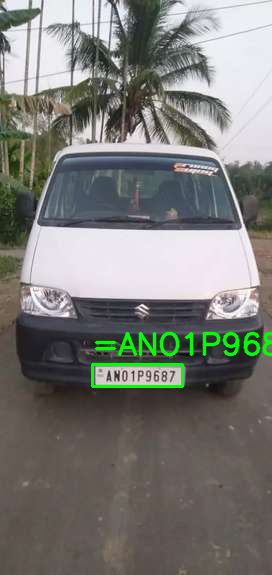

In [ ]:
import os
import cv2
import pytesseract
import torch
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab
from ultralytics import YOLO  # Import YOLO from the ultralytics package
from google.colab import drive
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load YOLOv8 model for license plate detection
license_plate_detector = YOLO('/content/drive/My Drive/license_plate_model.pt')  # Replace with your YOLO model path

# Configurations
IMG_HEIGHT, IMG_WIDTH = 28, 28  # Resized image size for training
NUM_CLASSES = 36  # Assuming digits (0-9) + uppercase letters (A-Z)

# Define Deeper CNN Model for Grayscale Images
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Compute the flattened size of the feature maps dynamically
        self._to_linear = None
        self._define_linear_input((1, IMG_HEIGHT, IMG_WIDTH))

        # Fully Connected Layers
        self.fc1 = nn.Linear(self._to_linear, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def _define_linear_input(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            x = self.pool4(F.relu(self.conv4(x)))
            self._to_linear = x.view(-1).shape[0]

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the data transformations (resizing and normalization for grayscale images)
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize all images to 28x28
    transforms.ToTensor(),       # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale images
])

# Load the saved CNN model
model_save_path = "/content/drive/My Drive/DeepCharRecogCNN_Grayscale.pt"
cnn_model = DeeperCharRecogCNN(num_classes=NUM_CLASSES)
cnn_model.load_state_dict(torch.load(model_save_path))
cnn_model.eval()  # Set the model to evaluation mode

# Tesseract configuration for OCR
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # path in Colb
tesseract_config = '--oem 3 --psm 7'

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score of the bounding box

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Convert the cropped license plate to grayscale
        license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

        # Resize the cropped license plate to CNN input size
        license_plate_resized = cv2.resize(license_plate_gray, (28, 28))
        license_plate_tensor = transforms.ToTensor()(license_plate_resized).unsqueeze(0)  # Add batch dimension

        # Predict using CNN
        with torch.no_grad():
            cnn_output = cnn_model(license_plate_tensor)
            cnn_conf, cnn_pred = torch.max(F.softmax(cnn_output, dim=1), dim=1)  # Confidence and prediction
            cnn_text = ''.join([chr(65 + idx) for idx in cnn_pred])  # Convert indices to characters

        # Predict using Tesseract
        tesseract_text = pytesseract.image_to_string(license_plate_gray, config=tesseract_config).strip()

        # Compare confidence scores (use Tesseract if confidence is higher or if CNN is ambiguous)
        if cnn_conf.item() > 0.8:  # Arbitrary threshold for CNN confidence
            recognized_text = cnn_text
            source = "CNN"
        else:
            recognized_text = tesseract_text
            source = "Tesseract"

        # Display recognized text
        print(f"Recognized License Plate Text ({source}):", recognized_text)

        # Annotate the recognized text on the original image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(original_image, recognized_text, (x1, y1 - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the vehicle image with the bounding box and recognized text
    print("Vehicle Image with License Plate Bounding Box and Recognized Text:")
    cv2_imshow(original_image)




# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/AN1')



0: 384x640 1 license_plate, 143.4ms
Speed: 5.0ms preprocess, 143.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Vehicle Image with License Plate Bounding Box:


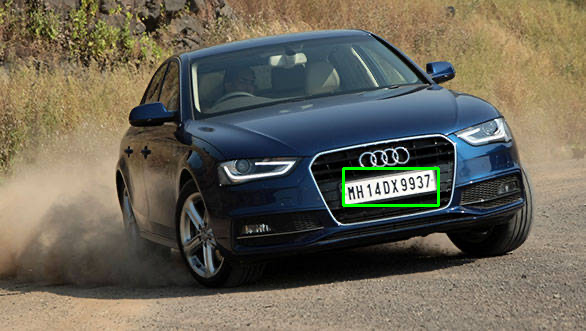

Cropped and Resized License Plate (32x96):


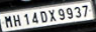

In [ ]:
import os
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

    # Display the vehicle image with the bounding box
    print("Vehicle Image with License Plate Bounding Box:")
    cv2_imshow(original_image)

    # Display the resized license plate
    print("Cropped and Resized License Plate (32x96):")
    cv2_imshow(license_plate_resized)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/Cars86')



0: 384x640 1 license_plate, 137.6ms
Speed: 7.3ms preprocess, 137.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Vehicle Image with License Plate Bounding Box:


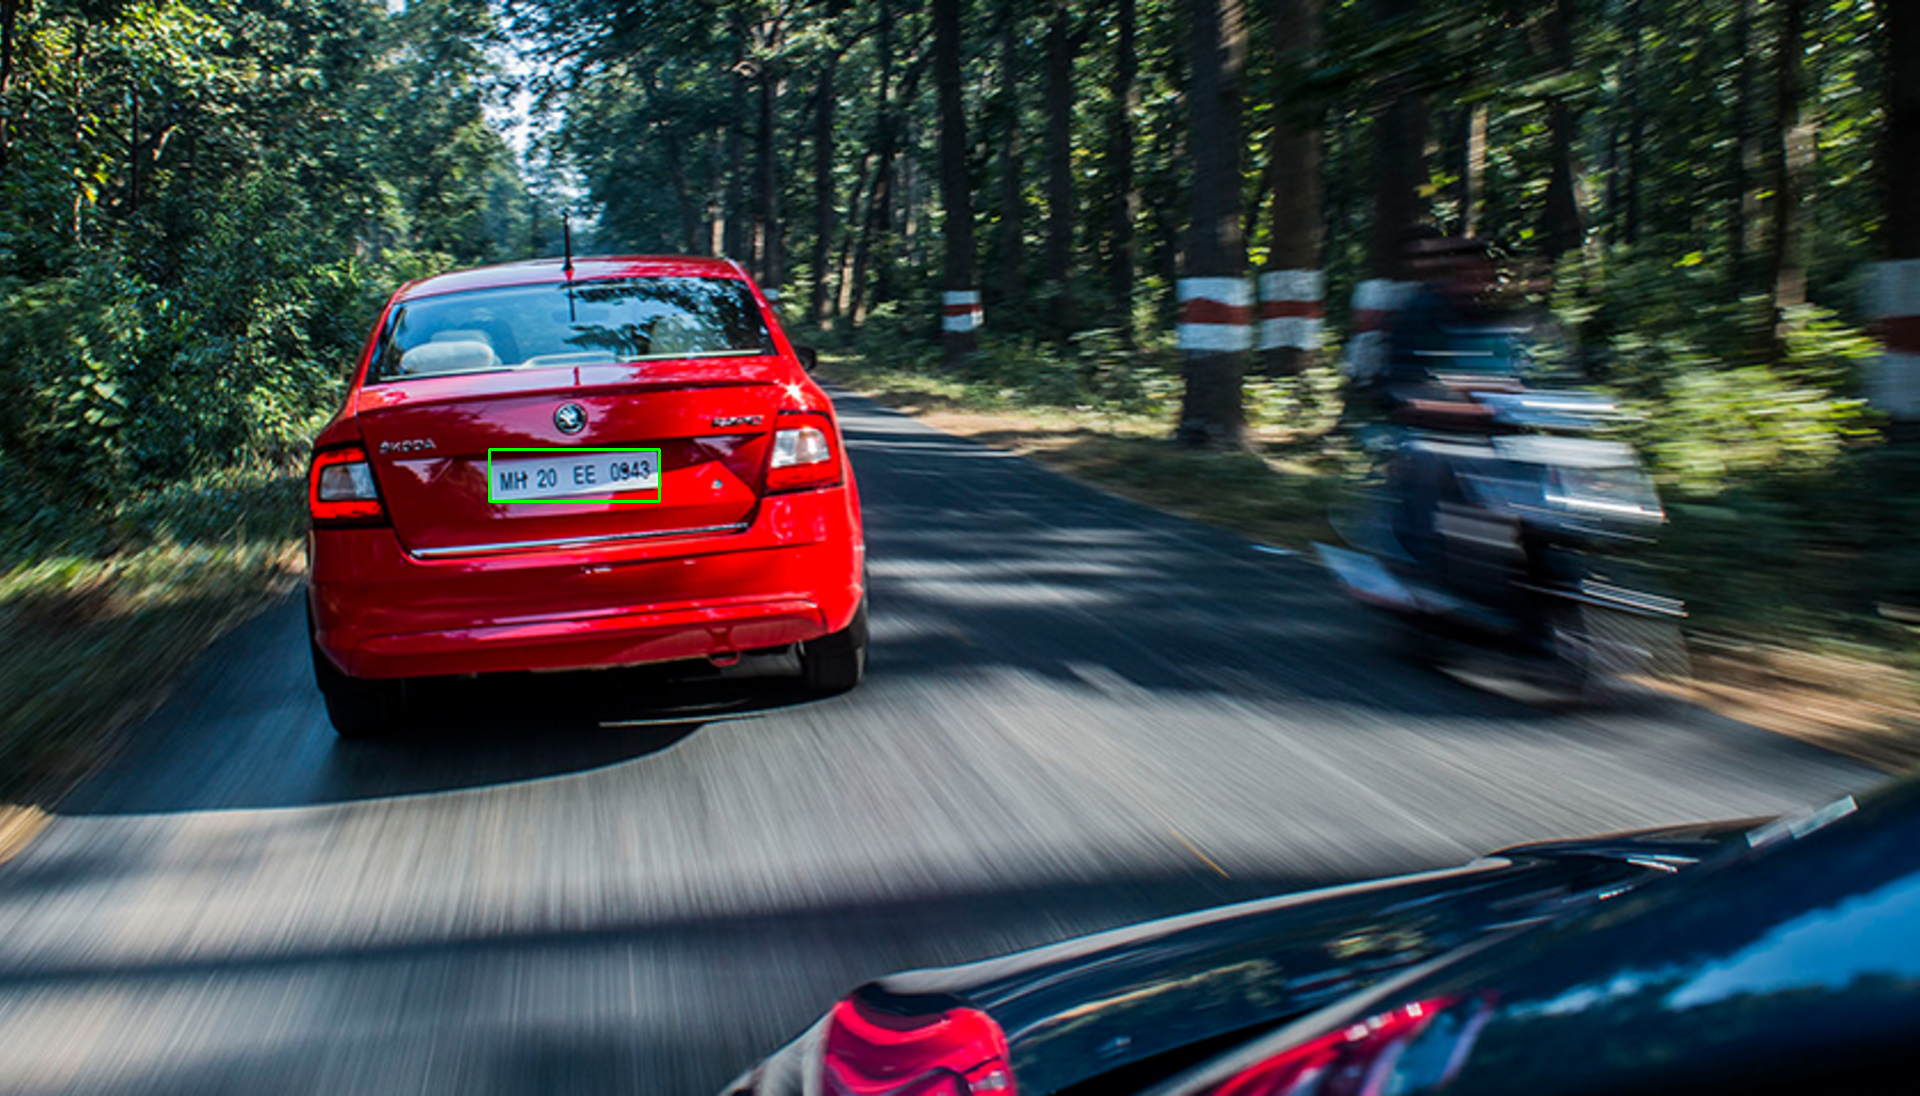

Cropped and Resized License Plate (32x96):


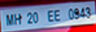

In [ ]:
import os
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

    # Display the vehicle image with the bounding box
    print("Vehicle Image with License Plate Bounding Box:")
    cv2_imshow(original_image)

    # Display the resized license plate
    print("Cropped and Resized License Plate (32x96):")
    cv2_imshow(license_plate_resized)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/00000390')



0: 640x608 1 license_plate, 215.1ms
Speed: 4.6ms preprocess, 215.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)
Vehicle Image with License Plate Bounding Box:


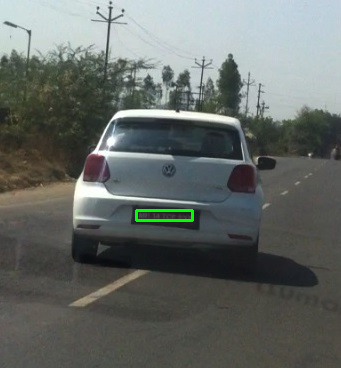

Cropped and Resized License Plate (32x96):


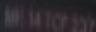

In [ ]:
import os
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

    # Display the vehicle image with the bounding box
    print("Vehicle Image with License Plate Bounding Box:")
    cv2_imshow(original_image)

    # Display the resized license plate
    print("Cropped and Resized License Plate (32x96):")
    cv2_imshow(license_plate_resized)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/1')



0: 320x640 2 license_plates, 427.3ms
Speed: 5.3ms preprocess, 427.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
Vehicle Image with License Plate Bounding Box:


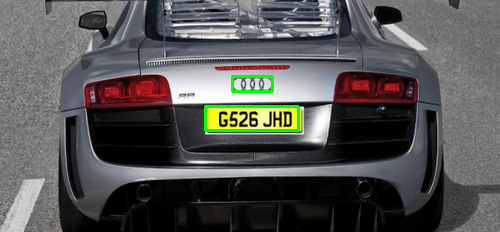

Cropped and Resized License Plate (32x96):


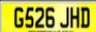

In [ ]:
import os
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

    # Display the vehicle image with the bounding box
    print("Vehicle Image with License Plate Bounding Box:")
    cv2_imshow(original_image)

    # Display the resized license plate
    print("Cropped and Resized License Plate (32x96):")
    cv2_imshow(license_plate_resized)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/Cars8')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x320 1 license_plate, 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 320)
Recognized License Plate Text: * ANO1P9687.
Vehicle Image with License Plate Bounding Box and Recognized Text:


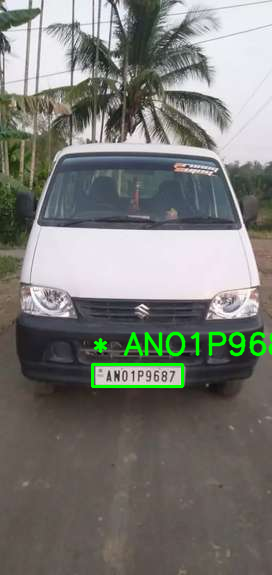

In [ ]:
import os
import cv2
import pytesseract
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab
from ultralytics import YOLO  # Import YOLO from the ultralytics package
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Initialize YOLOv8 model for license plate detection
license_plate_detector = YOLO('/content/drive/My Drive/license_plate_model.pt')  # Replace with the path to your .pt model file

# Define Tesseract configuration for English OCR
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Default path in Colab
config = '--oem 3 --psm 7'  # Set OCR Engine Mode (oem) and Page Segmentation Mode (psm)

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

        # Use Tesseract to recognize text from the cropped license plate
        recognized_text = pytesseract.image_to_string(license_plate_resized, config=config).strip()

        # Display recognized text
        if recognized_text:
            print("Recognized License Plate Text:", recognized_text)

            # Annotate the recognized text on the original image
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(original_image, recognized_text, (x1, y1 - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the vehicle image with the bounding box and recognized text
    print("Vehicle Image with License Plate Bounding Box and Recognized Text:")
    cv2_imshow(original_image)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/AN1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 480x640 2 license_plates, 157.3ms
Speed: 4.8ms preprocess, 157.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Recognized License Plate Text: OAR 0131
Recognized License Plate Text: AR 0131
Vehicle Image with License Plate Bounding Box and Recognized Text:


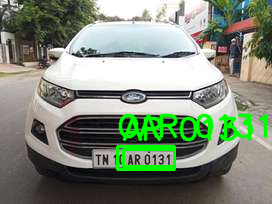

In [ ]:
import os
import cv2
import pytesseract
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab
from ultralytics import YOLO  # Import YOLO from the ultralytics package
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Initialize YOLOv8 model for license plate detection
license_plate_detector = YOLO('/content/drive/My Drive/license_plate_model.pt')  # Replace with the path to your .pt model file

# Define Tesseract configuration for English OCR
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Default path in Colab
config = '--oem 3 --psm 7'  # Set OCR Engine Mode (oem) and Page Segmentation Mode (psm)

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

        # Use Tesseract to recognize text from the cropped license plate
        recognized_text = pytesseract.image_to_string(license_plate_resized, config=config).strip()

        # Display recognized text
        if recognized_text:
            print("Recognized License Plate Text:", recognized_text)

            # Annotate the recognized text on the original image
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(original_image, recognized_text, (x1, y1 - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the vehicle image with the bounding box and recognized text
    print("Vehicle Image with License Plate Bounding Box and Recognized Text:")
    cv2_imshow(original_image)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/TN4')


In [ ]:
import os
import cv2
import pytesseract
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# YOLOv8 License Plate Detection Model Path
LICENSE_PLATE_MODEL_PATH = '/content/drive/My Drive/license_plate_model.pt'

# Dehazing Model Save and Load Paths
DEHAZING_MODEL_SAVE_PATH = '/content/mad_model224.pth'

# Character Recognition Model Save and Load Paths
CHAR_REC_MODEL_PATH = '/content/drive/My Drive/DeepCharRecogCNN_Grayscale.pt'

# ------------------ Dehazing Model ------------------

class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        # Convolution to produce a single attention map
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute pixel-wise attention
        attention = self.sigmoid(self.conv(x))
        # Scale input features by attention map
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Channel Attention Layer
class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        attention = avg_out + max_out
        return x * self.sigmoid(attention)

# MultiScale Attention Layer
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)

        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)

        combined = torch.cat([small_scale, large_scale], dim=1)
        reduced = self.reduction(combined)
        return reduced

# Swin Transformer Block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4, window_size=7):
        super(SwinTransformerBlock, self).__init__()
        self.in_channels = in_channels
        self.window_size = window_size
        self.num_heads = num_heads

        self.norm1 = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(in_channels, num_heads, batch_first=True)
        self.norm2 = nn.LayerNorm(in_channels)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels * 4),
            nn.GELU(),
            nn.Linear(in_channels * 4, in_channels),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.window_size == 0 and W % self.window_size == 0, "Input dimensions must be divisible by the window size."

        # Divide into non-overlapping windows
        x = x.view(B, C, H // self.window_size, self.window_size, W // self.window_size, self.window_size)
        x = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, self.window_size ** 2, C)

        # Attention
        x = self.norm1(x)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out

        # MLP
        x = self.norm2(x)
        x = x + self.mlp(x)

        # Merge back to original shape
        x = x.reshape(B, H // self.window_size, W // self.window_size, self.window_size, self.window_size, C)
        x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, C, H, W)
        return x

# Main Dehazing Model with residual connections
class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=3):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32  # Adjust dimensions based on memory constraints

        # Pre-processing layer
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)

        # Swin Transformer blocks with residual connections and pixel-wise attention
        self.swins = nn.ModuleList([
            nn.Sequential(
                SwinTransformerBlock(self.dim, num_heads=4),
                ChannelAttention(self.dim),
                PixelWiseAttention(self.dim)  # Add pixel-wise attention here
            ) for _ in range(num_blocks)
        ])

        # Multi-scale attention
        self.multi_scale_attn = MultiScaleAttention(self.dim)

        # Post-processing layer
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)

        # Apply Swin Transformer blocks with pixel-wise attention and residual connections
        for swin in self.swins:
            x = x + swin(x)

        # Apply multi-scale attention
        x = self.multi_scale_attn(x)

        # Reconstruct final image
        x = self.post(x)
        return x + residual



# Load Dehazing Model
dehazing_model = MultiAttentionDehazingModel(num_blocks=4)
if os.path.exists(DEHAZING_MODEL_SAVE_PATH):
    dehazing_model.load_state_dict(torch.load(DEHAZING_MODEL_SAVE_PATH))
dehazing_model.eval()

# ------------------ Character Recognition CNN ------------------
# Load YOLOv8 model for license plate detection
license_plate_detector = YOLO('/content/drive/My Drive/license_plate_model.pt')  # Replace with your YOLO model path

# Configurations
IMG_HEIGHT, IMG_WIDTH = 28, 28  # Resized image size for training
NUM_CLASSES = 36  # Assuming digits (0-9) + uppercase letters (A-Z)

# Define Deeper CNN Model for Grayscale Images
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Compute the flattened size of the feature maps dynamically
        self._to_linear = None
        self._define_linear_input((1, IMG_HEIGHT, IMG_WIDTH))

        # Fully Connected Layers
        self.fc1 = nn.Linear(self._to_linear, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def _define_linear_input(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            x = self.pool4(F.relu(self.conv4(x)))
            self._to_linear = x.view(-1).shape[0]

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the data transformations (resizing and normalization for grayscale images)
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize all images to 28x28
    transforms.ToTensor(),       # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale images
])

# Load the saved CNN model
model_save_path = "/content/drive/My Drive/DeepCharRecogCNN_Grayscale.pt"
cnn_model = DeeperCharRecogCNN(num_classes=NUM_CLASSES)
cnn_model.load_state_dict(torch.load(model_save_path))
cnn_model.eval()  # Set the model to evaluation mode

# ------------------ Complete Detection and Recognition Pipeline ------------------
def process_image_with_dehazing_and_detection(image_path):
    # Load and resize the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image path.")
    image_resized = cv2.resize(image, (224, 224))  # Resize to 224x224

    # Convert to tensor and dehaze the image
    hazy_tensor = transforms.ToTensor()(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)).unsqueeze(0)
    with torch.no_grad():
        dehazed_image = dehazing_model(hazy_tensor).squeeze(0).permute(1, 2, 0).numpy()

    # License Plate Detection using YOLO
    license_plate_detector = YOLO(LICENSE_PLATE_MODEL_PATH)
    results = license_plate_detector.predict(dehazed_image)
    print("Detection results:", results)


process_image_with_dehazing_and_detection('/content/drive/My Drive/AN1.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x640 (no detections), 275.8ms
Speed: 50.4ms preprocess, 275.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Detection results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'license_plate'}
obb: None
orig_img: array([[[    0.49156,     0.24105,     0.37085],
        [    0.54881,     0.20755,     0.35878],
        [    0.57504,     0.23697,     0.35896],
        ...,
        [    0.93985,     0.60804,     0.81839],
        [    0.97714,     0.62779,     0.82767],
        [    0.93895,     0.61819,     0.77038]],

       [[    0.57002,     0.25051,     0.47029],
        [    0.77102,     0.34508,     0.48691],
        [     1.0447,     0.57748,     0.69502],
        ...,
        [     1.1572,     0.70755,     0.90031],
        [     

In [ ]:
import os
import cv2
import torch
import pandas as pd
import pytesseract
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Paths
# YOLOv8 License Plate Detection Model Path
LICENSE_PLATE_MODEL_PATH = '/content/drive/My Drive/license_plate_model.pt'

# Dehazing Model Save and Load Paths
DEHAZING_MODEL_SAVE_PATH = '/content/drive/My Drive/mad_model224.pth'

# Character Recognition Model Save and Load Paths
CHAR_REC_MODEL_PATH = '/content/drive/My Drive/DeepCharRecogCNN_Grayscale.pt'


# ------------------ Dehazing Model ------------------
class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        attention = self.sigmoid(self.conv(x))
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return x * self.sigmoid(avg_out + max_out)

class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)
        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)
        combined = torch.cat([small_scale, large_scale], dim=1)
        return self.reduction(combined)

class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=4):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)
        self.swins = nn.ModuleList([nn.Sequential(ChannelAttention(self.dim), PixelWiseAttention(self.dim)) for _ in range(num_blocks)])
        self.multi_scale_attn = MultiScaleAttention(self.dim)
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)
        for swin in self.swins:
            x = x + swin(x)
        x = self.multi_scale_attn(x)
        x = self.post(x)
        return x + residual

# Load Dehazing Model
dehazing_model = MultiAttentionDehazingModel(num_blocks=4)
if os.path.exists(DEHAZING_MODEL_SAVE_PATH):
    dehazing_model.load_state_dict(torch.load(DEHAZING_MODEL_SAVE_PATH))
dehazing_model.eval()

# ------------------ License Plate Detection ------------------
# Load YOLO License Plate Detector
license_plate_detector = YOLO(LICENSE_PLATE_MODEL_PATH)

# ------------------ Character Recognition CNN ------------------
IMG_HEIGHT, IMG_WIDTH = 28, 28  # Resized image size for training
NUM_CLASSES = 36  # Assuming digits (0-9) + uppercase letters (A-Z)

# Define Deeper CNN Model for Grayscale Images
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self._to_linear = None
        self._define_linear_input((1, IMG_HEIGHT, IMG_WIDTH))
        self.fc1 = nn.Linear(self._to_linear, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def _define_linear_input(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            x = self.pool4(F.relu(self.conv4(x)))
            self._to_linear = x.view(-1).shape[0]

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load Character Recognition Model
char_recognition_model = DeeperCharRecogCNN(num_classes=NUM_CLASSES)
char_recognition_model.load_state_dict(torch.load(CHAR_REC_MODEL_PATH))
char_recognition_model.eval()

# ------------------ Helper Functions ------------------
def preprocess_char_image(char_image):
    char_image_resized = cv2.resize(char_image, (32, 96))
    char_image_normalized = transforms.ToTensor()(char_image_resized).unsqueeze(0)
    return char_image_normalized

def recognize_characters_cnn(char_images):
    recognized_text = ''
    for char_image in char_images:
        char_tensor = preprocess_char_image(char_image)
        with torch.no_grad():
            output = char_recognition_model(char_tensor)
            confidence, predicted_char = torch.max(output, 1)
            if confidence.item() > 0.7:
                recognized_text += str(predicted_char.item())
    return recognized_text

def recognize_text_tesseract(char_images):
    recognized_text = ''
    for char_image in char_images:
        gray_char = cv2.cvtColor(char_image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray_char, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        text = pytesseract.image_to_string(thresh, config='--psm 10')
        if text.strip():
            recognized_text += text.strip()
    return recognized_text


# ------------------ Complete Pipeline ------------------
def process_image_with_dehazing_detection_and_recognition(image_path):
    # Load and resize the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found.")

    # Step 1: Dehazing (Optional if using hazy images)
    dehazed_image = dehazing_model(torch.from_numpy(image).float().permute(2, 0, 1).unsqueeze(0) / 255.0)
    dehazed_image = dehazed_image.squeeze(0).permute(1, 2, 0).detach().numpy()  # Ensure it's detached

    # Step 2: Detect license plate
    results = license_plate_detector(image)

    if not results:  # If no plates are detected
        print("No license plates detected.")
        return None, None

    plates = results[0].boxes.xywh  # Ensure this line corresponds to the correct structure in your results object

    if len(plates) == 0:
        print("No license plates detected.")
        return None, None

    # Step 3: Process each detected license plate
    recognized_text_cnn = ''
    recognized_text_tesseract = ''

    for plate in plates:
        x1, y1, x2, y2 = map(int, plate[:4])  # Extract bounding box
        print(f"Detected plate coordinates: x1={x1}, y1={y1}, x2={x2}, y2={y2}")  # Debug output

        # Check if the coordinates are within valid image dimensions
        if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
            print("Invalid bounding box coordinates.")
            continue

        cropped_plate = image[y1:y2, x1:x2]

        # Check if the cropped plate is empty
        if cropped_plate.size == 0:
            print("Cropped plate is empty.")
            continue

        # Step 3: Character segmentation using OpenCV
        gray_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)
        _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

        # Find contours for character segmentation
        contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        char_images = [cv2.boundingRect(c) for c in contours]

        # Step 4: Recognition using CNN and Tesseract
        recognized_text_cnn = recognize_characters_cnn(char_images)  # Assuming you have a function for this
        recognized_text_tesseract = recognize_text_tesseract(cropped_plate)  # Assuming you have a function for this

        # Return recognized text from both methods
        return recognized_text_cnn, recognized_text_tesseract

    # If no plates or characters are recognized, return None for both
    return None, None


# Test the process
image_path = '/content/drive/My Drive/AN1.jpg'
recognized_text_cnn, recognized_text_tesseract = process_image_with_dehazing_detection_and_recognition(image_path)

if recognized_text_cnn and recognized_text_tesseract:
    print(f"Recognized License Plate (CNN): {recognized_text_cnn}")
    print(f"Recognized License Plate (Tesseract): {recognized_text_tesseract}")
else:
    print("No license plate detected or recognition failed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x320 1 license_plate, 136.2ms
Speed: 4.1ms preprocess, 136.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)
Detected plate coordinates: x1=137, y1=375, x2=89, y2=21
Invalid bounding box coordinates.
No license plate detected or recognition failed.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x320 1 license_plate, 110.2ms
Speed: 4.5ms preprocess, 110.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 320)
Recognized License Plate Text: Amo1p9687
Vehicle Image with License Plate Bounding Box and Recognized Text:


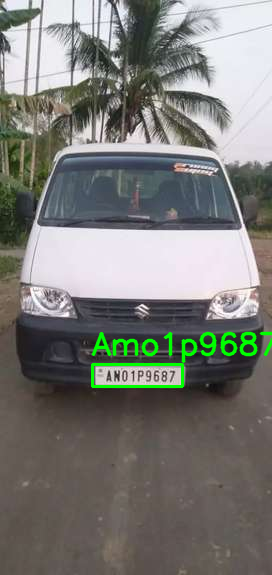

In [ ]:
import os
import cv2
import easyocr
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab
from ultralytics import YOLO  # Import YOLO from the ultralytics package
from google.colab import drive
drive.mount('/content/drive')
# Initialize YOLOv8 model for license plate detection
license_plate_detector = YOLO('/content/drive/My Drive/license_plate_model.pt')  # Replace with the path to your .pt model file

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

def load_image(image_path_base):
    # Check for common image extensions
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        full_path = image_path_base + ext
        if os.path.exists(full_path):
            return cv2.imread(full_path)
    print("Error: Image not found with any of the extensions:", extensions)
    return None

def detect_and_recognize_license_plate(image_path_base):
    # Load the vehicle image with any extension
    image = load_image(image_path_base)
    if image is None:
        print("Error: Could not load image. Please check the file path or format.")
        return
    original_image = image.copy()  # Keep a copy for displaying with bounding box

    # Run YOLOv8 detection
    results = license_plate_detector.predict(image)
    detected_boxes = results[0].boxes  # Get bounding boxes

    if len(detected_boxes) == 0:
        print("No license plate detected.")
        return

    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        conf = box.conf[0]  # Confidence score

        # Draw a bounding box around the license plate on the vehicle image
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness 2

        # Crop the detected license plate area
        license_plate = image[y1:y2, x1:x2]

        # Resize the cropped license plate to 96x32
        license_plate_resized = cv2.resize(license_plate, (96, 32))

        # Use EasyOCR to recognize text from the cropped license plate
        result = reader.readtext(license_plate_resized)
        if result:
            recognized_text = ' '.join([res[1] for res in result])  # Combine all detected text

            # Display recognized text
            print("Recognized License Plate Text:", recognized_text)

            # Annotate the recognized text on the original image
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(original_image, recognized_text, (x1, y1 - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the vehicle image with the bounding box and recognized text
    print("Vehicle Image with License Plate Bounding Box and Recognized Text:")
    cv2_imshow(original_image)

# Test with an image base name
detect_and_recognize_license_plate('/content/drive/My Drive/AN1')


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 16.3 MB/s eta 0:00:00


In [ ]:
# prompt: install tesserect

!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,325 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 18.3 MB/s eta 0:00:00


In [ ]:
#DEHAZING MODEL

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
from tqdm import tqdm

# Mount Google Drive if using datasets from Drive
from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive

# Paths for Hazy and Ground Truth Images
hazy_dir = '/content/drive/My Drive/hazy/'  # Change to your hazy dataset folder
gt_dir = '/content/drive/My Drive/gt/'  # Change to your ground truth dataset folder

# Depthwise Separable Convolution
class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        # Convolution to produce a single attention map
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute pixel-wise attention
        attention = self.sigmoid(self.conv(x))
        # Scale input features by attention map
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Channel Attention Layer
class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        attention = avg_out + max_out
        return x * self.sigmoid(attention)

# MultiScale Attention Layer
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)

        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)

        combined = torch.cat([small_scale, large_scale], dim=1)
        reduced = self.reduction(combined)
        return reduced

# Swin Transformer Block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4, window_size=7):
        super(SwinTransformerBlock, self).__init__()
        self.in_channels = in_channels
        self.window_size = window_size
        self.num_heads = num_heads

        self.norm1 = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(in_channels, num_heads, batch_first=True)
        self.norm2 = nn.LayerNorm(in_channels)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels * 4),
            nn.GELU(),
            nn.Linear(in_channels * 4, in_channels),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.window_size == 0 and W % self.window_size == 0, "Input dimensions must be divisible by the window size."

        # Divide into non-overlapping windows
        x = x.view(B, C, H // self.window_size, self.window_size, W // self.window_size, self.window_size)
        x = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, self.window_size ** 2, C)

        # Attention
        x = self.norm1(x)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out

        # MLP
        x = self.norm2(x)
        x = x + self.mlp(x)

        # Merge back to original shape
        x = x.reshape(B, H // self.window_size, W // self.window_size, self.window_size, self.window_size, C)
        x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, C, H, W)
        return x

# Main Dehazing Model with residual connections
class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=3):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32  # Adjust dimensions based on memory constraints

        # Pre-processing layer
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)

        # Swin Transformer blocks with residual connections and pixel-wise attention
        self.swins = nn.ModuleList([
            nn.Sequential(
                SwinTransformerBlock(self.dim, num_heads=4),
                ChannelAttention(self.dim),
                PixelWiseAttention(self.dim)  # Add pixel-wise attention here
            ) for _ in range(num_blocks)
        ])

        # Multi-scale attention
        self.multi_scale_attn = MultiScaleAttention(self.dim)

        # Post-processing layer
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)

        # Apply Swin Transformer blocks with pixel-wise attention and residual connections
        for swin in self.swins:
            x = x + swin(x)

        # Apply multi-scale attention
        x = self.multi_scale_attn(x)

        # Reconstruct final image
        x = self.post(x)
        return x + residual


# Dataset Class
class HazyDataset(Dataset):
    def __init__(self, hazy_dir, gt_dir, transform=None):
        self.hazy_dir = hazy_dir
        self.gt_dir = gt_dir
        self.transform = transform

        # Get the list of filenames in the ground truth directory
        self.gt_files = [f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')]

        # Create a dictionary mapping GT filename prefix to hazy filenames
        self.hazy_files_dict = {}
        for hazy_file in os.listdir(hazy_dir):
            prefix = hazy_file[:4]
            if prefix not in self.hazy_files_dict:
                self.hazy_files_dict[prefix] = []
            self.hazy_files_dict[prefix].append(hazy_file)

        self.gt_files = [f for f in self.gt_files if f[:4] in self.hazy_files_dict]

    def __len__(self):
        return len(self.gt_files)

    def __getitem__(self, idx):
        gt_name = os.path.join(self.gt_dir, self.gt_files[idx])
        prefix = self.gt_files[idx][:4]
        hazy_names = self.hazy_files_dict.get(prefix, [])

        if not hazy_names:
            raise ValueError(f"No hazy image found for ground truth image: {gt_name}")

        hazy_name = os.path.join(self.hazy_dir, hazy_names[0])

        hazy_image = Image.open(hazy_name).convert('RGB')
        gt_image = Image.open(gt_name).convert('RGB')

        if self.transform:
            hazy_image = self.transform(hazy_image)
            gt_image = self.transform(gt_image)

        return hazy_image, gt_image


# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.64, 0.6, 0.58], std=[0.14, 0.15, 0.152]),
])

# Initialize the dataset and dataloader
dataset = HazyDataset(hazy_dir=hazy_dir, gt_dir=gt_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, pin_memory=True)

# Initialize the model, loss function, and optimizer
model = MultiAttentionDehazingModel(num_blocks=4)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training function
def train_model(model, dataloader, criterion, optimizer, num_epochs=50, save_path='/content/mad_modelO.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    scaler = torch.cuda.amp.GradScaler()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for batch_idx, (hazy, gt) in tqdm(enumerate(dataloader), total=len(dataloader)):
            hazy, gt = hazy.to(device), gt.to(device)

            optimizer.zero_grad()

            with torch.cuda.amp.autocast():
                outputs = model(hazy)
                loss = criterion(outputs, gt)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            running_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    torch.save(model.state_dict(), save_path)

# Train the model
train_model(model, dataloader, criterion, optimizer, num_epochs=100)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  1%|          | 1/122 [00:01<03:51,  1.91s/it]

Epoch [1/100], Batch [1/122], Loss: 0.5747


  9%|▉         | 11/122 [00:11<02:10,  1.18s/it]

Epoch [1/100], Batch [11/122], Loss: 0.9266


 17%|█▋        | 21/122 [00:20<01:35,  1.06it/s]

Epoch [1/100], Batch [21/122], Loss: 0.8084


 25%|██▌       | 31/122 [00:29<01:26,  1.05it/s]

Epoch [1/100], Batch [31/122], Loss: 1.0361


 34%|███▎      | 41/122 [00:38<01:23,  1.03s/it]

Epoch [1/100], Batch [41/122], Loss: 0.6759


 42%|████▏     | 51/122 [00:46<00:52,  1.34it/s]

Epoch [1/100], Batch [51/122], Loss: 0.6500


 50%|█████     | 61/122 [00:55<01:03,  1.04s/it]

Epoch [1/100], Batch [61/122], Loss: 0.5621


 58%|█████▊    | 71/122 [01:03<00:36,  1.40it/s]

Epoch [1/100], Batch [71/122], Loss: 0.5735


 66%|██████▋   | 81/122 [01:12<00:40,  1.00it/s]

Epoch [1/100], Batch [81/122], Loss: 0.4816


 75%|███████▍  | 91/122 [01:20<00:26,  1.17it/s]

Epoch [1/100], Batch [91/122], Loss: 0.4008


 83%|████████▎ | 101/122 [01:30<00:22,  1.08s/it]

Epoch [1/100], Batch [101/122], Loss: 0.3501


 91%|█████████ | 111/122 [01:38<00:10,  1.01it/s]

Epoch [1/100], Batch [111/122], Loss: 0.5480


 99%|█████████▉| 121/122 [01:46<00:00,  1.33it/s]

Epoch [1/100], Batch [121/122], Loss: 0.4055


100%|██████████| 122/122 [01:47<00:00,  1.14it/s]

Epoch [1/100], Loss: 0.6676



  1%|          | 1/122 [00:00<00:53,  2.26it/s]

Epoch [2/100], Batch [1/122], Loss: 0.3432


  9%|▉         | 11/122 [00:03<00:29,  3.73it/s]

Epoch [2/100], Batch [11/122], Loss: 0.4294


 17%|█▋        | 21/122 [00:05<00:25,  4.00it/s]

Epoch [2/100], Batch [21/122], Loss: 0.4620


 25%|██▌       | 31/122 [00:08<00:22,  4.08it/s]

Epoch [2/100], Batch [31/122], Loss: 0.3985


 34%|███▎      | 41/122 [00:10<00:19,  4.07it/s]

Epoch [2/100], Batch [41/122], Loss: 0.3552


 42%|████▏     | 51/122 [00:13<00:17,  4.08it/s]

Epoch [2/100], Batch [51/122], Loss: 0.3399


 50%|█████     | 61/122 [00:15<00:15,  3.97it/s]

Epoch [2/100], Batch [61/122], Loss: 0.6176


 58%|█████▊    | 71/122 [00:18<00:13,  3.92it/s]

Epoch [2/100], Batch [71/122], Loss: 0.3079


 66%|██████▋   | 81/122 [00:20<00:10,  3.87it/s]

Epoch [2/100], Batch [81/122], Loss: 0.4937


 75%|███████▍  | 91/122 [00:23<00:07,  4.07it/s]

Epoch [2/100], Batch [91/122], Loss: 0.3349


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [2/100], Batch [101/122], Loss: 0.2929


 91%|█████████ | 111/122 [00:27<00:02,  4.08it/s]

Epoch [2/100], Batch [111/122], Loss: 0.3081


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [2/100], Batch [121/122], Loss: 0.4348


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [2/100], Loss: 0.4121



  1%|          | 1/122 [00:00<01:09,  1.74it/s]

Epoch [3/100], Batch [1/122], Loss: 0.3410


  9%|▉         | 11/122 [00:03<00:28,  3.85it/s]

Epoch [3/100], Batch [11/122], Loss: 0.3538


 17%|█▋        | 21/122 [00:05<00:26,  3.88it/s]

Epoch [3/100], Batch [21/122], Loss: 0.4131


 25%|██▌       | 31/122 [00:08<00:22,  4.04it/s]

Epoch [3/100], Batch [31/122], Loss: 0.2921


 34%|███▎      | 41/122 [00:10<00:19,  4.13it/s]

Epoch [3/100], Batch [41/122], Loss: 0.3780


 42%|████▏     | 51/122 [00:13<00:17,  4.13it/s]

Epoch [3/100], Batch [51/122], Loss: 0.4305


 50%|█████     | 61/122 [00:15<00:14,  4.13it/s]

Epoch [3/100], Batch [61/122], Loss: 0.5435


 58%|█████▊    | 71/122 [00:17<00:12,  3.98it/s]

Epoch [3/100], Batch [71/122], Loss: 0.2835


 66%|██████▋   | 81/122 [00:20<00:10,  3.98it/s]

Epoch [3/100], Batch [81/122], Loss: 0.3965


 75%|███████▍  | 91/122 [00:23<00:08,  3.83it/s]

Epoch [3/100], Batch [91/122], Loss: 0.2828


 83%|████████▎ | 101/122 [00:25<00:05,  4.03it/s]

Epoch [3/100], Batch [101/122], Loss: 0.3622


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [3/100], Batch [111/122], Loss: 0.6143


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [3/100], Batch [121/122], Loss: 0.3987
Epoch [3/100], Loss: 0.4021



  1%|          | 1/122 [00:00<00:53,  2.26it/s]

Epoch [4/100], Batch [1/122], Loss: 0.3499


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [4/100], Batch [11/122], Loss: 0.3945


 17%|█▋        | 21/122 [00:05<00:25,  4.00it/s]

Epoch [4/100], Batch [21/122], Loss: 0.3796


 25%|██▌       | 31/122 [00:07<00:23,  3.93it/s]

Epoch [4/100], Batch [31/122], Loss: 0.4581


 34%|███▎      | 41/122 [00:10<00:21,  3.81it/s]

Epoch [4/100], Batch [41/122], Loss: 0.7550


 42%|████▏     | 51/122 [00:12<00:17,  4.10it/s]

Epoch [4/100], Batch [51/122], Loss: 0.5270


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [4/100], Batch [61/122], Loss: 0.3094


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [4/100], Batch [71/122], Loss: 0.3779


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [4/100], Batch [81/122], Loss: 0.4161


 75%|███████▍  | 91/122 [00:22<00:07,  4.02it/s]

Epoch [4/100], Batch [91/122], Loss: 0.3880


 83%|████████▎ | 101/122 [00:25<00:05,  3.92it/s]

Epoch [4/100], Batch [101/122], Loss: 0.8174


 91%|█████████ | 111/122 [00:27<00:02,  3.80it/s]

Epoch [4/100], Batch [111/122], Loss: 0.4172


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [4/100], Batch [121/122], Loss: 0.4033
Epoch [4/100], Loss: 0.3957



  1%|          | 1/122 [00:00<00:57,  2.12it/s]

Epoch [5/100], Batch [1/122], Loss: 0.3441


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [5/100], Batch [11/122], Loss: 0.4194


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [5/100], Batch [21/122], Loss: 0.4576


 25%|██▌       | 31/122 [00:07<00:22,  4.12it/s]

Epoch [5/100], Batch [31/122], Loss: 0.3065


 34%|███▎      | 41/122 [00:10<00:20,  3.92it/s]

Epoch [5/100], Batch [41/122], Loss: 0.3280


 42%|████▏     | 51/122 [00:12<00:18,  3.86it/s]

Epoch [5/100], Batch [51/122], Loss: 0.4130


 50%|█████     | 61/122 [00:15<00:15,  3.98it/s]

Epoch [5/100], Batch [61/122], Loss: 0.4277


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [5/100], Batch [71/122], Loss: 0.6067


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [5/100], Batch [81/122], Loss: 0.3964


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [5/100], Batch [91/122], Loss: 0.3114


 83%|████████▎ | 101/122 [00:25<00:05,  4.11it/s]

Epoch [5/100], Batch [101/122], Loss: 0.6341


 91%|█████████ | 111/122 [00:27<00:02,  3.79it/s]

Epoch [5/100], Batch [111/122], Loss: 0.3242


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [5/100], Batch [121/122], Loss: 0.3771


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [5/100], Loss: 0.3851



  1%|          | 1/122 [00:00<01:12,  1.68it/s]

Epoch [6/100], Batch [1/122], Loss: 0.3780


  9%|▉         | 11/122 [00:03<00:27,  4.07it/s]

Epoch [6/100], Batch [11/122], Loss: 0.3197


 17%|█▋        | 21/122 [00:05<00:25,  4.03it/s]

Epoch [6/100], Batch [21/122], Loss: 0.3713


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [6/100], Batch [31/122], Loss: 0.3093


 34%|███▎      | 41/122 [00:10<00:19,  4.05it/s]

Epoch [6/100], Batch [41/122], Loss: 0.3485


 42%|████▏     | 51/122 [00:12<00:17,  3.97it/s]

Epoch [6/100], Batch [51/122], Loss: 0.1997


 50%|█████     | 61/122 [00:15<00:15,  3.93it/s]

Epoch [6/100], Batch [61/122], Loss: 0.4924


 58%|█████▊    | 71/122 [00:18<00:13,  3.82it/s]

Epoch [6/100], Batch [71/122], Loss: 0.5947


 66%|██████▋   | 81/122 [00:20<00:10,  3.98it/s]

Epoch [6/100], Batch [81/122], Loss: 0.2922


 75%|███████▍  | 91/122 [00:23<00:07,  4.11it/s]

Epoch [6/100], Batch [91/122], Loss: 0.2699


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [6/100], Batch [101/122], Loss: 0.2670


 91%|█████████ | 111/122 [00:27<00:02,  4.12it/s]

Epoch [6/100], Batch [111/122], Loss: 0.3765


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [6/100], Batch [121/122], Loss: 0.4224


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [6/100], Loss: 0.3774



  1%|          | 1/122 [00:00<00:55,  2.18it/s]

Epoch [7/100], Batch [1/122], Loss: 0.3980


  9%|▉         | 11/122 [00:02<00:27,  3.98it/s]

Epoch [7/100], Batch [11/122], Loss: 0.3246


 17%|█▋        | 21/122 [00:05<00:25,  3.91it/s]

Epoch [7/100], Batch [21/122], Loss: 0.3720


 25%|██▌       | 31/122 [00:08<00:23,  3.81it/s]

Epoch [7/100], Batch [31/122], Loss: 0.3242


 34%|███▎      | 41/122 [00:10<00:19,  4.10it/s]

Epoch [7/100], Batch [41/122], Loss: 0.2747


 42%|████▏     | 51/122 [00:12<00:17,  4.12it/s]

Epoch [7/100], Batch [51/122], Loss: 0.3507


 50%|█████     | 61/122 [00:15<00:14,  4.13it/s]

Epoch [7/100], Batch [61/122], Loss: 0.2613


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [7/100], Batch [71/122], Loss: 0.2589


 66%|██████▋   | 81/122 [00:20<00:10,  3.95it/s]

Epoch [7/100], Batch [81/122], Loss: 0.2327


 75%|███████▍  | 91/122 [00:22<00:07,  3.97it/s]

Epoch [7/100], Batch [91/122], Loss: 0.3172


 83%|████████▎ | 101/122 [00:25<00:05,  3.81it/s]

Epoch [7/100], Batch [101/122], Loss: 0.4421


 91%|█████████ | 111/122 [00:27<00:02,  4.09it/s]

Epoch [7/100], Batch [111/122], Loss: 0.2745


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [7/100], Batch [121/122], Loss: 0.2687


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [7/100], Loss: 0.3632



  1%|          | 1/122 [00:00<00:55,  2.19it/s]

Epoch [8/100], Batch [1/122], Loss: 0.2349


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [8/100], Batch [11/122], Loss: 0.3522


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [8/100], Batch [21/122], Loss: 0.3619


 25%|██▌       | 31/122 [00:07<00:23,  3.94it/s]

Epoch [8/100], Batch [31/122], Loss: 0.3006


 34%|███▎      | 41/122 [00:10<00:20,  3.89it/s]

Epoch [8/100], Batch [41/122], Loss: 0.2797


 42%|████▏     | 51/122 [00:12<00:17,  4.01it/s]

Epoch [8/100], Batch [51/122], Loss: 0.3452


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [8/100], Batch [61/122], Loss: 0.6737


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [8/100], Batch [71/122], Loss: 0.3417


 66%|██████▋   | 81/122 [00:20<00:10,  4.06it/s]

Epoch [8/100], Batch [81/122], Loss: 0.3160


 75%|███████▍  | 91/122 [00:22<00:07,  4.09it/s]

Epoch [8/100], Batch [91/122], Loss: 0.2886


 83%|████████▎ | 101/122 [00:25<00:05,  3.83it/s]

Epoch [8/100], Batch [101/122], Loss: 0.2632


 91%|█████████ | 111/122 [00:27<00:02,  3.91it/s]

Epoch [8/100], Batch [111/122], Loss: 0.3515


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [8/100], Batch [121/122], Loss: 0.2460


Epoch [8/100], Loss: 0.3529


  1%|          | 1/122 [00:00<00:49,  2.44it/s]

Epoch [9/100], Batch [1/122], Loss: 0.2922


  9%|▉         | 11/122 [00:02<00:27,  4.11it/s]

Epoch [9/100], Batch [11/122], Loss: 0.4027


 17%|█▋        | 21/122 [00:05<00:24,  4.13it/s]

Epoch [9/100], Batch [21/122], Loss: 0.3407


 25%|██▌       | 31/122 [00:07<00:22,  4.06it/s]

Epoch [9/100], Batch [31/122], Loss: 0.3039


 34%|███▎      | 41/122 [00:10<00:20,  3.92it/s]

Epoch [9/100], Batch [41/122], Loss: 0.2449


 42%|████▏     | 51/122 [00:12<00:18,  3.90it/s]

Epoch [9/100], Batch [51/122], Loss: 0.2578


 50%|█████     | 61/122 [00:15<00:15,  3.85it/s]

Epoch [9/100], Batch [61/122], Loss: 0.5723


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [9/100], Batch [71/122], Loss: 0.1943


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [9/100], Batch [81/122], Loss: 0.3460


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [9/100], Batch [91/122], Loss: 0.4352


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [9/100], Batch [101/122], Loss: 0.4510


 91%|█████████ | 111/122 [00:27<00:02,  4.03it/s]

Epoch [9/100], Batch [111/122], Loss: 0.3039


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [9/100], Batch [121/122], Loss: 0.3389


100%|██████████| 122/122 [00:30<00:00,  4.02it/s]

Epoch [9/100], Loss: 0.3390



  1%|          | 1/122 [00:00<01:07,  1.79it/s]

Epoch [10/100], Batch [1/122], Loss: 0.4525


  9%|▉         | 11/122 [00:03<00:27,  4.06it/s]

Epoch [10/100], Batch [11/122], Loss: 0.2609


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [10/100], Batch [21/122], Loss: 0.4815


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [10/100], Batch [31/122], Loss: 0.3631


 34%|███▎      | 41/122 [00:10<00:19,  4.13it/s]

Epoch [10/100], Batch [41/122], Loss: 0.3335


 42%|████▏     | 51/122 [00:12<00:18,  3.93it/s]

Epoch [10/100], Batch [51/122], Loss: 0.3050


 50%|█████     | 61/122 [00:15<00:15,  3.84it/s]

Epoch [10/100], Batch [61/122], Loss: 0.2793


 58%|█████▊    | 71/122 [00:18<00:13,  3.87it/s]

Epoch [10/100], Batch [71/122], Loss: 0.2992


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [10/100], Batch [81/122], Loss: 0.2677


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [10/100], Batch [91/122], Loss: 0.2823


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [10/100], Batch [101/122], Loss: 0.3612


 91%|█████████ | 111/122 [00:27<00:02,  4.13it/s]

Epoch [10/100], Batch [111/122], Loss: 0.3920


100%|██████████| 122/122 [00:30<00:00,  4.67it/s]

Epoch [10/100], Batch [121/122], Loss: 0.2950


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [10/100], Loss: 0.3333



  1%|          | 1/122 [00:00<01:04,  1.87it/s]

Epoch [11/100], Batch [1/122], Loss: 0.4499


  9%|▉         | 11/122 [00:03<00:29,  3.79it/s]

Epoch [11/100], Batch [11/122], Loss: 0.4076


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [11/100], Batch [21/122], Loss: 0.4391


 25%|██▌       | 31/122 [00:08<00:22,  4.12it/s]

Epoch [11/100], Batch [31/122], Loss: 0.3287


 34%|███▎      | 41/122 [00:10<00:19,  4.12it/s]

Epoch [11/100], Batch [41/122], Loss: 0.2773


 42%|████▏     | 51/122 [00:12<00:17,  4.13it/s]

Epoch [11/100], Batch [51/122], Loss: 0.3623


 50%|█████     | 61/122 [00:15<00:15,  3.87it/s]

Epoch [11/100], Batch [61/122], Loss: 0.2416


 58%|█████▊    | 71/122 [00:17<00:13,  3.92it/s]

Epoch [11/100], Batch [71/122], Loss: 0.2830


 66%|██████▋   | 81/122 [00:20<00:10,  3.95it/s]

Epoch [11/100], Batch [81/122], Loss: 0.3325


 75%|███████▍  | 91/122 [00:22<00:07,  4.08it/s]

Epoch [11/100], Batch [91/122], Loss: 0.4377


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [11/100], Batch [101/122], Loss: 0.4055


 91%|█████████ | 111/122 [00:27<00:02,  4.13it/s]

Epoch [11/100], Batch [111/122], Loss: 0.4028


100%|██████████| 122/122 [00:30<00:00,  4.79it/s]

Epoch [11/100], Batch [121/122], Loss: 0.3460


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [11/100], Loss: 0.3320



  1%|          | 1/122 [00:00<01:03,  1.91it/s]

Epoch [12/100], Batch [1/122], Loss: 0.2888


  9%|▉         | 11/122 [00:03<00:28,  3.87it/s]

Epoch [12/100], Batch [11/122], Loss: 0.3529


 17%|█▋        | 21/122 [00:05<00:26,  3.87it/s]

Epoch [12/100], Batch [21/122], Loss: 0.2768


 25%|██▌       | 31/122 [00:08<00:22,  3.96it/s]

Epoch [12/100], Batch [31/122], Loss: 0.2655


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [12/100], Batch [41/122], Loss: 0.2609


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [12/100], Batch [51/122], Loss: 0.3432


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [12/100], Batch [61/122], Loss: 0.2644


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [12/100], Batch [71/122], Loss: 0.3442


 66%|██████▋   | 81/122 [00:20<00:10,  3.89it/s]

Epoch [12/100], Batch [81/122], Loss: 0.4586


 75%|███████▍  | 91/122 [00:23<00:08,  3.81it/s]

Epoch [12/100], Batch [91/122], Loss: 0.2329


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [12/100], Batch [101/122], Loss: 0.4149


 91%|█████████ | 111/122 [00:27<00:02,  4.10it/s]

Epoch [12/100], Batch [111/122], Loss: 0.2242


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [12/100], Batch [121/122], Loss: 0.3123
Epoch [12/100], Loss: 0.3293



  1%|          | 1/122 [00:00<00:50,  2.39it/s]

Epoch [13/100], Batch [1/122], Loss: 0.5983


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [13/100], Batch [11/122], Loss: 0.4062


 17%|█▋        | 21/122 [00:05<00:25,  3.94it/s]

Epoch [13/100], Batch [21/122], Loss: 0.2978


 25%|██▌       | 31/122 [00:07<00:23,  3.87it/s]

Epoch [13/100], Batch [31/122], Loss: 0.2485


 34%|███▎      | 41/122 [00:10<00:20,  3.93it/s]

Epoch [13/100], Batch [41/122], Loss: 0.3705


 42%|████▏     | 51/122 [00:12<00:17,  4.11it/s]

Epoch [13/100], Batch [51/122], Loss: 0.2446


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [13/100], Batch [61/122], Loss: 0.4869


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [13/100], Batch [71/122], Loss: 0.2637


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [13/100], Batch [81/122], Loss: 0.3057


 75%|███████▍  | 91/122 [00:22<00:07,  3.95it/s]

Epoch [13/100], Batch [91/122], Loss: 0.3224


 83%|████████▎ | 101/122 [00:25<00:05,  3.90it/s]

Epoch [13/100], Batch [101/122], Loss: 0.4980


 91%|█████████ | 111/122 [00:27<00:02,  3.99it/s]

Epoch [13/100], Batch [111/122], Loss: 0.3719


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [13/100], Batch [121/122], Loss: 0.2652


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [13/100], Loss: 0.3217



  1%|          | 1/122 [00:00<00:49,  2.43it/s]

Epoch [14/100], Batch [1/122], Loss: 0.2275


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [14/100], Batch [11/122], Loss: 0.1890


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [14/100], Batch [21/122], Loss: 0.4918


 25%|██▌       | 31/122 [00:07<00:23,  3.84it/s]

Epoch [14/100], Batch [31/122], Loss: 0.3803


 34%|███▎      | 41/122 [00:10<00:21,  3.85it/s]

Epoch [14/100], Batch [41/122], Loss: 0.2775


 42%|████▏     | 51/122 [00:13<00:19,  3.73it/s]

Epoch [14/100], Batch [51/122], Loss: 0.1990


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [14/100], Batch [61/122], Loss: 0.2890


 58%|█████▊    | 71/122 [00:17<00:12,  4.08it/s]

Epoch [14/100], Batch [71/122], Loss: 0.3416


 66%|██████▋   | 81/122 [00:20<00:10,  4.09it/s]

Epoch [14/100], Batch [81/122], Loss: 0.3419


 75%|███████▍  | 91/122 [00:22<00:07,  4.13it/s]

Epoch [14/100], Batch [91/122], Loss: 0.1788


 83%|████████▎ | 101/122 [00:25<00:05,  3.92it/s]

Epoch [14/100], Batch [101/122], Loss: 0.2854


 91%|█████████ | 111/122 [00:27<00:02,  4.01it/s]

Epoch [14/100], Batch [111/122], Loss: 0.3414


100%|██████████| 122/122 [00:30<00:00,  4.69it/s]

Epoch [14/100], Batch [121/122], Loss: 0.2296


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [14/100], Loss: 0.3249



  1%|          | 1/122 [00:00<00:52,  2.32it/s]

Epoch [15/100], Batch [1/122], Loss: 0.2576


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [15/100], Batch [11/122], Loss: 0.2997


 17%|█▋        | 21/122 [00:05<00:24,  4.09it/s]

Epoch [15/100], Batch [21/122], Loss: 0.4017


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [15/100], Batch [31/122], Loss: 0.2646


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [15/100], Batch [41/122], Loss: 0.3304


 42%|████▏     | 51/122 [00:12<00:17,  3.96it/s]

Epoch [15/100], Batch [51/122], Loss: 0.4143


 50%|█████     | 61/122 [00:15<00:15,  3.94it/s]

Epoch [15/100], Batch [61/122], Loss: 0.3793


 58%|█████▊    | 71/122 [00:17<00:12,  3.96it/s]

Epoch [15/100], Batch [71/122], Loss: 0.2564


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [15/100], Batch [81/122], Loss: 0.4175


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [15/100], Batch [91/122], Loss: 0.2996


 83%|████████▎ | 101/122 [00:25<00:05,  4.13it/s]

Epoch [15/100], Batch [101/122], Loss: 0.2705


 91%|█████████ | 111/122 [00:27<00:02,  4.12it/s]

Epoch [15/100], Batch [111/122], Loss: 0.2804


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [15/100], Batch [121/122], Loss: 0.4249


100%|██████████| 122/122 [00:30<00:00,  4.02it/s]

Epoch [15/100], Loss: 0.3199



  1%|          | 1/122 [00:00<01:21,  1.49it/s]

Epoch [16/100], Batch [1/122], Loss: 0.2237


  9%|▉         | 11/122 [00:03<00:29,  3.79it/s]

Epoch [16/100], Batch [11/122], Loss: 0.3305


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [16/100], Batch [21/122], Loss: 0.2873


 25%|██▌       | 31/122 [00:08<00:22,  4.13it/s]

Epoch [16/100], Batch [31/122], Loss: 0.3070


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [16/100], Batch [41/122], Loss: 0.3395


 42%|████▏     | 51/122 [00:13<00:18,  3.92it/s]

Epoch [16/100], Batch [51/122], Loss: 0.3450


 50%|█████     | 61/122 [00:15<00:15,  3.94it/s]

Epoch [16/100], Batch [61/122], Loss: 0.3448


 58%|█████▊    | 71/122 [00:18<00:13,  3.86it/s]

Epoch [16/100], Batch [71/122], Loss: 0.3235


 66%|██████▋   | 81/122 [00:20<00:10,  3.90it/s]

Epoch [16/100], Batch [81/122], Loss: 0.4162


 75%|███████▍  | 91/122 [00:23<00:08,  3.80it/s]

Epoch [16/100], Batch [91/122], Loss: 0.1992


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [16/100], Batch [101/122], Loss: 0.3719


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [16/100], Batch [111/122], Loss: 0.2965


100%|██████████| 122/122 [00:31<00:00,  3.93it/s]

Epoch [16/100], Batch [121/122], Loss: 0.2875
Epoch [16/100], Loss: 0.3198



  1%|          | 1/122 [00:00<00:50,  2.40it/s]

Epoch [17/100], Batch [1/122], Loss: 0.2860


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [17/100], Batch [11/122], Loss: 0.2743


 17%|█▋        | 21/122 [00:05<00:25,  3.93it/s]

Epoch [17/100], Batch [21/122], Loss: 0.2188


 25%|██▌       | 31/122 [00:07<00:23,  3.93it/s]

Epoch [17/100], Batch [31/122], Loss: 0.4236


 34%|███▎      | 41/122 [00:10<00:20,  3.90it/s]

Epoch [17/100], Batch [41/122], Loss: 0.3791


 42%|████▏     | 51/122 [00:12<00:17,  4.12it/s]

Epoch [17/100], Batch [51/122], Loss: 0.2892


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [17/100], Batch [61/122], Loss: 0.2410


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [17/100], Batch [71/122], Loss: 0.2577


 66%|██████▋   | 81/122 [00:20<00:10,  4.08it/s]

Epoch [17/100], Batch [81/122], Loss: 0.2169


 75%|███████▍  | 91/122 [00:22<00:08,  3.81it/s]

Epoch [17/100], Batch [91/122], Loss: 0.2892


 83%|████████▎ | 101/122 [00:25<00:05,  3.86it/s]

Epoch [17/100], Batch [101/122], Loss: 0.3124


 91%|█████████ | 111/122 [00:28<00:02,  3.95it/s]

Epoch [17/100], Batch [111/122], Loss: 0.3365


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [17/100], Batch [121/122], Loss: 0.4153


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [17/100], Loss: 0.3176



  1%|          | 1/122 [00:00<00:50,  2.39it/s]

Epoch [18/100], Batch [1/122], Loss: 0.3604


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [18/100], Batch [11/122], Loss: 0.2523


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [18/100], Batch [21/122], Loss: 0.3412


 25%|██▌       | 31/122 [00:07<00:23,  3.90it/s]

Epoch [18/100], Batch [31/122], Loss: 0.3117


 34%|███▎      | 41/122 [00:10<00:20,  3.89it/s]

Epoch [18/100], Batch [41/122], Loss: 0.2301


 42%|████▏     | 51/122 [00:12<00:18,  3.86it/s]

Epoch [18/100], Batch [51/122], Loss: 0.3132


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [18/100], Batch [61/122], Loss: 0.2118


 58%|█████▊    | 71/122 [00:17<00:12,  4.10it/s]

Epoch [18/100], Batch [71/122], Loss: 0.2915


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [18/100], Batch [81/122], Loss: 0.3670


 75%|███████▍  | 91/122 [00:22<00:07,  4.13it/s]

Epoch [18/100], Batch [91/122], Loss: 0.4808


 83%|████████▎ | 101/122 [00:25<00:05,  3.99it/s]

Epoch [18/100], Batch [101/122], Loss: 0.5098


 91%|█████████ | 111/122 [00:27<00:02,  3.85it/s]

Epoch [18/100], Batch [111/122], Loss: 0.2934


100%|██████████| 122/122 [00:30<00:00,  4.63it/s]

Epoch [18/100], Batch [121/122], Loss: 0.2697


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [18/100], Loss: 0.3153



  1%|          | 1/122 [00:00<00:53,  2.27it/s]

Epoch [19/100], Batch [1/122], Loss: 0.3686


  9%|▉         | 11/122 [00:02<00:27,  4.02it/s]

Epoch [19/100], Batch [11/122], Loss: 0.2676


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [19/100], Batch [21/122], Loss: 0.3997


 25%|██▌       | 31/122 [00:07<00:22,  4.09it/s]

Epoch [19/100], Batch [31/122], Loss: 0.2350


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [19/100], Batch [41/122], Loss: 0.3017


 42%|████▏     | 51/122 [00:12<00:18,  3.87it/s]

Epoch [19/100], Batch [51/122], Loss: 0.3182


 50%|█████     | 61/122 [00:15<00:15,  3.86it/s]

Epoch [19/100], Batch [61/122], Loss: 0.5282


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [19/100], Batch [71/122], Loss: 0.3462


 66%|██████▋   | 81/122 [00:20<00:10,  4.09it/s]

Epoch [19/100], Batch [81/122], Loss: 0.4897


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [19/100], Batch [91/122], Loss: 0.2906


 83%|████████▎ | 101/122 [00:25<00:05,  4.13it/s]

Epoch [19/100], Batch [101/122], Loss: 0.3502


 91%|█████████ | 111/122 [00:27<00:02,  3.84it/s]

Epoch [19/100], Batch [111/122], Loss: 0.3478


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [19/100], Batch [121/122], Loss: 0.2095


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [19/100], Loss: 0.3127



  1%|          | 1/122 [00:00<01:00,  1.99it/s]

Epoch [20/100], Batch [1/122], Loss: 0.2797


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [20/100], Batch [11/122], Loss: 0.2870


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [20/100], Batch [21/122], Loss: 0.2450


 25%|██▌       | 31/122 [00:07<00:22,  4.12it/s]

Epoch [20/100], Batch [31/122], Loss: 0.3642


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [20/100], Batch [41/122], Loss: 0.4736


 42%|████▏     | 51/122 [00:12<00:18,  3.80it/s]

Epoch [20/100], Batch [51/122], Loss: 0.2331


 50%|█████     | 61/122 [00:15<00:16,  3.78it/s]

Epoch [20/100], Batch [61/122], Loss: 0.2112


 58%|█████▊    | 71/122 [00:17<00:12,  4.05it/s]

Epoch [20/100], Batch [71/122], Loss: 0.3428


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [20/100], Batch [81/122], Loss: 0.3110


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [20/100], Batch [91/122], Loss: 0.3059


 83%|████████▎ | 101/122 [00:25<00:05,  4.08it/s]

Epoch [20/100], Batch [101/122], Loss: 0.2994


 91%|█████████ | 111/122 [00:27<00:02,  4.01it/s]

Epoch [20/100], Batch [111/122], Loss: 0.2494


100%|██████████| 122/122 [00:30<00:00,  4.71it/s]

Epoch [20/100], Batch [121/122], Loss: 0.2675


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [20/100], Loss: 0.3143



  1%|          | 1/122 [00:00<01:06,  1.82it/s]

Epoch [21/100], Batch [1/122], Loss: 0.3430


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [21/100], Batch [11/122], Loss: 0.4332


 17%|█▋        | 21/122 [00:05<00:24,  4.09it/s]

Epoch [21/100], Batch [21/122], Loss: 0.1954


 25%|██▌       | 31/122 [00:07<00:22,  4.10it/s]

Epoch [21/100], Batch [31/122], Loss: 0.4259


 34%|███▎      | 41/122 [00:10<00:19,  4.10it/s]

Epoch [21/100], Batch [41/122], Loss: 0.3252


 42%|████▏     | 51/122 [00:12<00:17,  3.96it/s]

Epoch [21/100], Batch [51/122], Loss: 0.2677


 50%|█████     | 61/122 [00:15<00:16,  3.74it/s]

Epoch [21/100], Batch [61/122], Loss: 0.5528


 58%|█████▊    | 71/122 [00:17<00:12,  4.08it/s]

Epoch [21/100], Batch [71/122], Loss: 0.3403


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [21/100], Batch [81/122], Loss: 0.2784


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [21/100], Batch [91/122], Loss: 0.2499


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [21/100], Batch [101/122], Loss: 0.2401


 91%|█████████ | 111/122 [00:27<00:02,  3.93it/s]

Epoch [21/100], Batch [111/122], Loss: 0.4239


100%|██████████| 122/122 [00:30<00:00,  4.63it/s]

Epoch [21/100], Batch [121/122], Loss: 0.3252


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [21/100], Loss: 0.3119



  1%|          | 1/122 [00:00<01:07,  1.78it/s]

Epoch [22/100], Batch [1/122], Loss: 0.3941


  9%|▉         | 11/122 [00:03<00:27,  4.07it/s]

Epoch [22/100], Batch [11/122], Loss: 0.2677


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [22/100], Batch [21/122], Loss: 0.2385


 25%|██▌       | 31/122 [00:07<00:22,  4.04it/s]

Epoch [22/100], Batch [31/122], Loss: 0.4062


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [22/100], Batch [41/122], Loss: 0.2445


 42%|████▏     | 51/122 [00:12<00:17,  3.96it/s]

Epoch [22/100], Batch [51/122], Loss: 0.2351


 50%|█████     | 61/122 [00:15<00:15,  3.81it/s]

Epoch [22/100], Batch [61/122], Loss: 0.2792


 58%|█████▊    | 71/122 [00:17<00:12,  4.06it/s]

Epoch [22/100], Batch [71/122], Loss: 0.2798


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [22/100], Batch [81/122], Loss: 0.4440


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [22/100], Batch [91/122], Loss: 0.2422


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [22/100], Batch [101/122], Loss: 0.1843


 91%|█████████ | 111/122 [00:27<00:02,  4.03it/s]

Epoch [22/100], Batch [111/122], Loss: 0.2523


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [22/100], Batch [121/122], Loss: 0.2484


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [22/100], Loss: 0.3093



  1%|          | 1/122 [00:00<01:12,  1.67it/s]

Epoch [23/100], Batch [1/122], Loss: 0.2417


  9%|▉         | 11/122 [00:03<00:27,  4.08it/s]

Epoch [23/100], Batch [11/122], Loss: 0.3348


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [23/100], Batch [21/122], Loss: 0.2214


 25%|██▌       | 31/122 [00:07<00:22,  4.12it/s]

Epoch [23/100], Batch [31/122], Loss: 0.2342


 34%|███▎      | 41/122 [00:10<00:19,  4.12it/s]

Epoch [23/100], Batch [41/122], Loss: 0.2827


 42%|████▏     | 51/122 [00:12<00:18,  3.86it/s]

Epoch [23/100], Batch [51/122], Loss: 0.3531


 50%|█████     | 61/122 [00:15<00:15,  3.88it/s]

Epoch [23/100], Batch [61/122], Loss: 0.3515


 58%|█████▊    | 71/122 [00:17<00:12,  4.03it/s]

Epoch [23/100], Batch [71/122], Loss: 0.2214


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [23/100], Batch [81/122], Loss: 0.5011


 75%|███████▍  | 91/122 [00:22<00:07,  4.06it/s]

Epoch [23/100], Batch [91/122], Loss: 0.4570


 83%|████████▎ | 101/122 [00:25<00:05,  4.06it/s]

Epoch [23/100], Batch [101/122], Loss: 0.3214


 91%|█████████ | 111/122 [00:27<00:02,  3.93it/s]

Epoch [23/100], Batch [111/122], Loss: 0.3250


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [23/100], Batch [121/122], Loss: 0.3875


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [23/100], Loss: 0.3065



  1%|          | 1/122 [00:00<01:20,  1.50it/s]

Epoch [24/100], Batch [1/122], Loss: 0.2271


  9%|▉         | 11/122 [00:03<00:27,  4.05it/s]

Epoch [24/100], Batch [11/122], Loss: 0.2934


 17%|█▋        | 21/122 [00:05<00:24,  4.09it/s]

Epoch [24/100], Batch [21/122], Loss: 0.2683


 25%|██▌       | 31/122 [00:08<00:22,  4.06it/s]

Epoch [24/100], Batch [31/122], Loss: 0.3564


 34%|███▎      | 41/122 [00:10<00:19,  4.07it/s]

Epoch [24/100], Batch [41/122], Loss: 0.3495


 42%|████▏     | 51/122 [00:12<00:18,  3.92it/s]

Epoch [24/100], Batch [51/122], Loss: 0.5110


 50%|█████     | 61/122 [00:15<00:15,  3.86it/s]

Epoch [24/100], Batch [61/122], Loss: 0.2883


 58%|█████▊    | 71/122 [00:18<00:13,  3.91it/s]

Epoch [24/100], Batch [71/122], Loss: 0.3278


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [24/100], Batch [81/122], Loss: 0.2269


 75%|███████▍  | 91/122 [00:23<00:07,  4.12it/s]

Epoch [24/100], Batch [91/122], Loss: 0.6251


 83%|████████▎ | 101/122 [00:25<00:05,  4.05it/s]

Epoch [24/100], Batch [101/122], Loss: 0.2995


 91%|█████████ | 111/122 [00:27<00:02,  4.11it/s]

Epoch [24/100], Batch [111/122], Loss: 0.2301


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [24/100], Batch [121/122], Loss: 0.3498


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [24/100], Loss: 0.3105



  1%|          | 1/122 [00:00<01:14,  1.62it/s]

Epoch [25/100], Batch [1/122], Loss: 0.3940


  9%|▉         | 11/122 [00:03<00:30,  3.69it/s]

Epoch [25/100], Batch [11/122], Loss: 0.2742


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [25/100], Batch [21/122], Loss: 0.3012


 25%|██▌       | 31/122 [00:08<00:22,  4.12it/s]

Epoch [25/100], Batch [31/122], Loss: 0.2626


 34%|███▎      | 41/122 [00:10<00:19,  4.10it/s]

Epoch [25/100], Batch [41/122], Loss: 0.2401


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [25/100], Batch [51/122], Loss: 0.2401


 50%|█████     | 61/122 [00:15<00:15,  3.96it/s]

Epoch [25/100], Batch [61/122], Loss: 0.2461


 58%|█████▊    | 71/122 [00:18<00:13,  3.91it/s]

Epoch [25/100], Batch [71/122], Loss: 0.2875


 66%|██████▋   | 81/122 [00:20<00:10,  3.89it/s]

Epoch [25/100], Batch [81/122], Loss: 0.3840


 75%|███████▍  | 91/122 [00:23<00:07,  4.10it/s]

Epoch [25/100], Batch [91/122], Loss: 0.2766


 83%|████████▎ | 101/122 [00:25<00:05,  4.08it/s]

Epoch [25/100], Batch [101/122], Loss: 0.3181


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [25/100], Batch [111/122], Loss: 0.2201


100%|██████████| 122/122 [00:30<00:00,  4.75it/s]

Epoch [25/100], Batch [121/122], Loss: 0.2217


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [25/100], Loss: 0.3067



  1%|          | 1/122 [00:00<01:03,  1.90it/s]

Epoch [26/100], Batch [1/122], Loss: 0.3095


  9%|▉         | 11/122 [00:03<00:29,  3.82it/s]

Epoch [26/100], Batch [11/122], Loss: 0.2640


 17%|█▋        | 21/122 [00:05<00:27,  3.67it/s]

Epoch [26/100], Batch [21/122], Loss: 0.2326


 25%|██▌       | 31/122 [00:08<00:24,  3.77it/s]

Epoch [26/100], Batch [31/122], Loss: 0.2629


 34%|███▎      | 41/122 [00:11<00:21,  3.76it/s]

Epoch [26/100], Batch [41/122], Loss: 0.2797


 42%|████▏     | 51/122 [00:13<00:17,  3.98it/s]

Epoch [26/100], Batch [51/122], Loss: 0.2750


 50%|█████     | 61/122 [00:16<00:14,  4.08it/s]

Epoch [26/100], Batch [61/122], Loss: 0.2605


 58%|█████▊    | 71/122 [00:18<00:12,  3.93it/s]

Epoch [26/100], Batch [71/122], Loss: 0.3201


 66%|██████▋   | 81/122 [00:21<00:10,  3.96it/s]

Epoch [26/100], Batch [81/122], Loss: 0.1978


 75%|███████▍  | 91/122 [00:23<00:07,  3.89it/s]

Epoch [26/100], Batch [91/122], Loss: 0.4585


 83%|████████▎ | 101/122 [00:26<00:05,  4.10it/s]

Epoch [26/100], Batch [101/122], Loss: 0.3887


 91%|█████████ | 111/122 [00:28<00:02,  4.08it/s]

Epoch [26/100], Batch [111/122], Loss: 0.2839


100%|██████████| 122/122 [00:31<00:00,  3.91it/s]

Epoch [26/100], Batch [121/122], Loss: 0.4092
Epoch [26/100], Loss: 0.3054

  1%|          | 1/122 [00:00<00:53,  2.28it/s]

Epoch [27/100], Batch [1/122], Loss: 0.2477


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [27/100], Batch [11/122], Loss: 0.3328


 17%|█▋        | 21/122 [00:05<00:25,  3.97it/s]

Epoch [27/100], Batch [21/122], Loss: 0.2725


 25%|██▌       | 31/122 [00:07<00:23,  3.93it/s]

Epoch [27/100], Batch [31/122], Loss: 0.3370


 34%|███▎      | 41/122 [00:10<00:20,  3.97it/s]

Epoch [27/100], Batch [41/122], Loss: 0.2994


 42%|████▏     | 51/122 [00:12<00:17,  4.12it/s]

Epoch [27/100], Batch [51/122], Loss: 0.3278


 50%|█████     | 61/122 [00:15<00:14,  4.13it/s]

Epoch [27/100], Batch [61/122], Loss: 0.2581


 58%|█████▊    | 71/122 [00:17<00:12,  4.13it/s]

Epoch [27/100], Batch [71/122], Loss: 0.2579


 66%|██████▋   | 81/122 [00:20<00:10,  4.00it/s]

Epoch [27/100], Batch [81/122], Loss: 0.3794


 75%|███████▍  | 91/122 [00:22<00:07,  3.91it/s]

Epoch [27/100], Batch [91/122], Loss: 0.2312


 83%|████████▎ | 101/122 [00:25<00:05,  3.90it/s]

Epoch [27/100], Batch [101/122], Loss: 0.2856


 91%|█████████ | 111/122 [00:27<00:02,  4.07it/s]

Epoch [27/100], Batch [111/122], Loss: 0.3874


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [27/100], Batch [121/122], Loss: 0.3293
Epoch [27/100], Loss: 0.3030



  1%|          | 1/122 [00:00<00:54,  2.22it/s]

Epoch [28/100], Batch [1/122], Loss: 0.2876


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [28/100], Batch [11/122], Loss: 0.2331


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [28/100], Batch [21/122], Loss: 0.3016


 25%|██▌       | 31/122 [00:07<00:23,  3.91it/s]

Epoch [28/100], Batch [31/122], Loss: 0.3165


 34%|███▎      | 41/122 [00:10<00:20,  3.95it/s]

Epoch [28/100], Batch [41/122], Loss: 0.3455


 42%|████▏     | 51/122 [00:12<00:18,  3.85it/s]

Epoch [28/100], Batch [51/122], Loss: 0.3513


 50%|█████     | 61/122 [00:15<00:14,  4.08it/s]

Epoch [28/100], Batch [61/122], Loss: 0.1977


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [28/100], Batch [71/122], Loss: 0.3835


 66%|██████▋   | 81/122 [00:20<00:09,  4.10it/s]

Epoch [28/100], Batch [81/122], Loss: 0.3242


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [28/100], Batch [91/122], Loss: 0.2390


 83%|████████▎ | 101/122 [00:25<00:05,  3.94it/s]

Epoch [28/100], Batch [101/122], Loss: 0.2666


 91%|█████████ | 111/122 [00:27<00:02,  3.77it/s]

Epoch [28/100], Batch [111/122], Loss: 0.2963


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [28/100], Batch [121/122], Loss: 0.2706
Epoch [28/100], Loss: 0.3034



  1%|          | 1/122 [00:00<00:49,  2.45it/s]

Epoch [29/100], Batch [1/122], Loss: 0.2189


  9%|▉         | 11/122 [00:02<00:27,  4.10it/s]

Epoch [29/100], Batch [11/122], Loss: 0.3453


 17%|█▋        | 21/122 [00:05<00:24,  4.08it/s]

Epoch [29/100], Batch [21/122], Loss: 0.2289


 25%|██▌       | 31/122 [00:07<00:22,  4.13it/s]

Epoch [29/100], Batch [31/122], Loss: 0.3931


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [29/100], Batch [41/122], Loss: 0.3411


 42%|████▏     | 51/122 [00:12<00:18,  3.88it/s]

Epoch [29/100], Batch [51/122], Loss: 0.3508


 50%|█████     | 61/122 [00:15<00:15,  3.97it/s]

Epoch [29/100], Batch [61/122], Loss: 0.2148


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [29/100], Batch [71/122], Loss: 0.2603


 66%|██████▋   | 81/122 [00:20<00:10,  4.09it/s]

Epoch [29/100], Batch [81/122], Loss: 0.2977


 75%|███████▍  | 91/122 [00:22<00:07,  4.09it/s]

Epoch [29/100], Batch [91/122], Loss: 0.3203


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [29/100], Batch [101/122], Loss: 0.2321


 91%|█████████ | 111/122 [00:27<00:02,  3.93it/s]

Epoch [29/100], Batch [111/122], Loss: 0.2283


100%|██████████| 122/122 [00:30<00:00,  4.70it/s]

Epoch [29/100], Batch [121/122], Loss: 0.2907


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [29/100], Loss: 0.2999



  1%|          | 1/122 [00:00<00:57,  2.09it/s]

Epoch [30/100], Batch [1/122], Loss: 0.2783


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [30/100], Batch [11/122], Loss: 0.3276


 17%|█▋        | 21/122 [00:05<00:24,  4.09it/s]

Epoch [30/100], Batch [21/122], Loss: 0.3255


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [30/100], Batch [31/122], Loss: 0.2532


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [30/100], Batch [41/122], Loss: 0.3689


 42%|████▏     | 51/122 [00:12<00:18,  3.88it/s]

Epoch [30/100], Batch [51/122], Loss: 0.2616


 50%|█████     | 61/122 [00:15<00:15,  3.92it/s]

Epoch [30/100], Batch [61/122], Loss: 0.2934


 58%|█████▊    | 71/122 [00:17<00:12,  4.03it/s]

Epoch [30/100], Batch [71/122], Loss: 0.1876


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [30/100], Batch [81/122], Loss: 0.2763


 75%|███████▍  | 91/122 [00:22<00:07,  4.10it/s]

Epoch [30/100], Batch [91/122], Loss: 0.2165


 83%|████████▎ | 101/122 [00:25<00:05,  4.08it/s]

Epoch [30/100], Batch [101/122], Loss: 0.3046


 91%|█████████ | 111/122 [00:27<00:02,  3.98it/s]

Epoch [30/100], Batch [111/122], Loss: 0.2752


100%|██████████| 122/122 [00:30<00:00,  4.64it/s]

Epoch [30/100], Batch [121/122], Loss: 0.3359


100%|██████████| 122/122 [00:30<00:00,  4.01it/s]

Epoch [30/100], Loss: 0.2978



  1%|          | 1/122 [00:00<01:24,  1.42it/s]

Epoch [31/100], Batch [1/122], Loss: 0.2502


  9%|▉         | 11/122 [00:03<00:27,  4.00it/s]

Epoch [31/100], Batch [11/122], Loss: 0.3493


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [31/100], Batch [21/122], Loss: 0.2587


 25%|██▌       | 31/122 [00:08<00:22,  4.05it/s]

Epoch [31/100], Batch [31/122], Loss: 0.2104


 34%|███▎      | 41/122 [00:10<00:19,  4.12it/s]

Epoch [31/100], Batch [41/122], Loss: 0.2703


 42%|████▏     | 51/122 [00:13<00:18,  3.79it/s]

Epoch [31/100], Batch [51/122], Loss: 0.2944


 50%|█████     | 61/122 [00:15<00:15,  3.84it/s]

Epoch [31/100], Batch [61/122], Loss: 0.1939


 58%|█████▊    | 71/122 [00:18<00:13,  3.91it/s]

Epoch [31/100], Batch [71/122], Loss: 0.1844


 66%|██████▋   | 81/122 [00:20<00:10,  4.10it/s]

Epoch [31/100], Batch [81/122], Loss: 0.3432


 75%|███████▍  | 91/122 [00:23<00:07,  4.10it/s]

Epoch [31/100], Batch [91/122], Loss: 0.5611


 83%|████████▎ | 101/122 [00:25<00:05,  4.07it/s]

Epoch [31/100], Batch [101/122], Loss: 0.2372


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [31/100], Batch [111/122], Loss: 0.2106


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [31/100], Batch [121/122], Loss: 0.3034


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [31/100], Loss: 0.2984



  1%|          | 1/122 [00:00<01:10,  1.72it/s]

Epoch [32/100], Batch [1/122], Loss: 0.2334


  9%|▉         | 11/122 [00:03<00:29,  3.79it/s]

Epoch [32/100], Batch [11/122], Loss: 0.1886


 17%|█▋        | 21/122 [00:05<00:24,  4.06it/s]

Epoch [32/100], Batch [21/122], Loss: 0.3888


 25%|██▌       | 31/122 [00:08<00:22,  4.11it/s]

Epoch [32/100], Batch [31/122], Loss: 0.3091


 34%|███▎      | 41/122 [00:10<00:20,  4.04it/s]

Epoch [32/100], Batch [41/122], Loss: 0.3445


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [32/100], Batch [51/122], Loss: 0.2922


 50%|█████     | 61/122 [00:15<00:15,  3.90it/s]

Epoch [32/100], Batch [61/122], Loss: 0.3200


 58%|█████▊    | 71/122 [00:18<00:13,  3.79it/s]

Epoch [32/100], Batch [71/122], Loss: 0.5538


 66%|██████▋   | 81/122 [00:20<00:10,  3.86it/s]

Epoch [32/100], Batch [81/122], Loss: 0.2597


 75%|███████▍  | 91/122 [00:23<00:07,  4.07it/s]

Epoch [32/100], Batch [91/122], Loss: 0.2507


 83%|████████▎ | 101/122 [00:25<00:05,  4.06it/s]

Epoch [32/100], Batch [101/122], Loss: 0.2206


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [32/100], Batch [111/122], Loss: 0.2750


100%|██████████| 122/122 [00:30<00:00,  4.74it/s]

Epoch [32/100], Batch [121/122], Loss: 0.2857


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [32/100], Loss: 0.2976



  1%|          | 1/122 [00:00<01:06,  1.81it/s]

Epoch [33/100], Batch [1/122], Loss: 0.2536


  9%|▉         | 11/122 [00:03<00:28,  3.91it/s]

Epoch [33/100], Batch [11/122], Loss: 0.2461


 17%|█▋        | 21/122 [00:05<00:26,  3.75it/s]

Epoch [33/100], Batch [21/122], Loss: 0.3007


 25%|██▌       | 31/122 [00:08<00:22,  3.98it/s]

Epoch [33/100], Batch [31/122], Loss: 0.2900


 34%|███▎      | 41/122 [00:10<00:19,  4.12it/s]

Epoch [33/100], Batch [41/122], Loss: 0.5185


 42%|████▏     | 51/122 [00:13<00:17,  4.00it/s]

Epoch [33/100], Batch [51/122], Loss: 0.2630


 50%|█████     | 61/122 [00:15<00:15,  3.93it/s]

Epoch [33/100], Batch [61/122], Loss: 0.2039


 58%|█████▊    | 71/122 [00:18<00:13,  3.84it/s]

Epoch [33/100], Batch [71/122], Loss: 0.3585


 66%|██████▋   | 81/122 [00:21<00:14,  2.81it/s]

Epoch [33/100], Batch [81/122], Loss: 0.2491


 75%|███████▍  | 91/122 [00:24<00:08,  3.50it/s]

Epoch [33/100], Batch [91/122], Loss: 0.1825


 83%|████████▎ | 101/122 [00:26<00:05,  4.05it/s]

Epoch [33/100], Batch [101/122], Loss: 0.1923


 91%|█████████ | 111/122 [00:29<00:02,  4.09it/s]

Epoch [33/100], Batch [111/122], Loss: 0.4536


100%|██████████| 122/122 [00:32<00:00,  4.75it/s]

Epoch [33/100], Batch [121/122], Loss: 0.2025


100%|██████████| 122/122 [00:32<00:00,  3.80it/s]

Epoch [33/100], Loss: 0.2974



  1%|          | 1/122 [00:00<00:51,  2.35it/s]

Epoch [34/100], Batch [1/122], Loss: 0.4365


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [34/100], Batch [11/122], Loss: 0.3887


 17%|█▋        | 21/122 [00:05<00:26,  3.82it/s]

Epoch [34/100], Batch [21/122], Loss: 0.3264


 25%|██▌       | 31/122 [00:08<00:23,  3.83it/s]

Epoch [34/100], Batch [31/122], Loss: 0.2601


 34%|███▎      | 41/122 [00:10<00:19,  4.10it/s]

Epoch [34/100], Batch [41/122], Loss: 0.2247


 42%|████▏     | 51/122 [00:12<00:17,  4.06it/s]

Epoch [34/100], Batch [51/122], Loss: 0.2915


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [34/100], Batch [61/122], Loss: 0.2095


 58%|█████▊    | 71/122 [00:17<00:12,  3.96it/s]

Epoch [34/100], Batch [71/122], Loss: 0.3422


 66%|██████▋   | 81/122 [00:20<00:10,  3.91it/s]

Epoch [34/100], Batch [81/122], Loss: 0.2523


 75%|███████▍  | 91/122 [00:23<00:07,  3.90it/s]

Epoch [34/100], Batch [91/122], Loss: 0.3368


 83%|████████▎ | 101/122 [00:25<00:05,  3.79it/s]

Epoch [34/100], Batch [101/122], Loss: 0.2873


 91%|█████████ | 111/122 [00:28<00:02,  4.08it/s]

Epoch [34/100], Batch [111/122], Loss: 0.3595


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [34/100], Batch [121/122], Loss: 0.2898


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [34/100], Loss: 0.2935



  1%|          | 1/122 [00:00<00:55,  2.16it/s]

Epoch [35/100], Batch [1/122], Loss: 0.2859


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [35/100], Batch [11/122], Loss: 0.2988


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [35/100], Batch [21/122], Loss: 0.1925


 25%|██▌       | 31/122 [00:07<00:23,  3.91it/s]

Epoch [35/100], Batch [31/122], Loss: 0.2064


 34%|███▎      | 41/122 [00:10<00:21,  3.79it/s]

Epoch [35/100], Batch [41/122], Loss: 0.2901


 42%|████▏     | 51/122 [00:13<00:17,  3.97it/s]

Epoch [35/100], Batch [51/122], Loss: 0.1721


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [35/100], Batch [61/122], Loss: 0.2887


 58%|█████▊    | 71/122 [00:18<00:12,  4.03it/s]

Epoch [35/100], Batch [71/122], Loss: 0.3226


 66%|██████▋   | 81/122 [00:20<00:10,  4.06it/s]

Epoch [35/100], Batch [81/122], Loss: 0.2779


 75%|███████▍  | 91/122 [00:22<00:07,  3.99it/s]

Epoch [35/100], Batch [91/122], Loss: 0.4534


 83%|████████▎ | 101/122 [00:25<00:06,  3.07it/s]

Epoch [35/100], Batch [101/122], Loss: 0.4123


 91%|█████████ | 111/122 [00:28<00:03,  3.43it/s]

Epoch [35/100], Batch [111/122], Loss: 0.3109


100%|██████████| 122/122 [00:31<00:00,  4.51it/s]

Epoch [35/100], Batch [121/122], Loss: 0.3012


100%|██████████| 122/122 [00:31<00:00,  3.83it/s]

Epoch [35/100], Loss: 0.2911



  1%|          | 1/122 [00:00<01:13,  1.65it/s]

Epoch [36/100], Batch [1/122], Loss: 0.4207


  9%|▉         | 11/122 [00:03<00:27,  4.07it/s]

Epoch [36/100], Batch [11/122], Loss: 0.2895


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [36/100], Batch [21/122], Loss: 0.4557


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [36/100], Batch [31/122], Loss: 0.2798


 34%|███▎      | 41/122 [00:10<00:20,  4.05it/s]

Epoch [36/100], Batch [41/122], Loss: 0.2290


 42%|████▏     | 51/122 [00:12<00:18,  3.93it/s]

Epoch [36/100], Batch [51/122], Loss: 0.3047


 50%|█████     | 61/122 [00:15<00:16,  3.80it/s]

Epoch [36/100], Batch [61/122], Loss: 0.2943


 58%|█████▊    | 71/122 [00:18<00:12,  4.04it/s]

Epoch [36/100], Batch [71/122], Loss: 0.3119


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [36/100], Batch [81/122], Loss: 0.3799


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [36/100], Batch [91/122], Loss: 0.2724


 83%|████████▎ | 101/122 [00:25<00:05,  4.08it/s]

Epoch [36/100], Batch [101/122], Loss: 0.3082


 91%|█████████ | 111/122 [00:27<00:02,  3.95it/s]

Epoch [36/100], Batch [111/122], Loss: 0.2608


100%|██████████| 122/122 [00:30<00:00,  4.69it/s]

Epoch [36/100], Batch [121/122], Loss: 0.2592


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [36/100], Loss: 0.2889



  1%|          | 1/122 [00:00<01:05,  1.84it/s]

Epoch [37/100], Batch [1/122], Loss: 0.2226


  9%|▉         | 11/122 [00:03<00:27,  4.01it/s]

Epoch [37/100], Batch [11/122], Loss: 0.2731


 17%|█▋        | 21/122 [00:05<00:24,  4.05it/s]

Epoch [37/100], Batch [21/122], Loss: 0.2336


 25%|██▌       | 31/122 [00:07<00:22,  4.10it/s]

Epoch [37/100], Batch [31/122], Loss: 0.3750


 34%|███▎      | 41/122 [00:10<00:20,  4.00it/s]

Epoch [37/100], Batch [41/122], Loss: 0.3493


 42%|████▏     | 51/122 [00:13<00:18,  3.93it/s]

Epoch [37/100], Batch [51/122], Loss: 0.2808


 50%|█████     | 61/122 [00:15<00:15,  3.96it/s]

Epoch [37/100], Batch [61/122], Loss: 0.2609


 58%|█████▊    | 71/122 [00:18<00:13,  3.90it/s]

Epoch [37/100], Batch [71/122], Loss: 0.4060


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [37/100], Batch [81/122], Loss: 0.3205


 75%|███████▍  | 91/122 [00:23<00:07,  4.12it/s]

Epoch [37/100], Batch [91/122], Loss: 0.3247


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [37/100], Batch [101/122], Loss: 0.2676


 91%|█████████ | 111/122 [00:27<00:02,  4.12it/s]

Epoch [37/100], Batch [111/122], Loss: 0.7256


100%|██████████| 122/122 [00:30<00:00,  4.69it/s]

Epoch [37/100], Batch [121/122], Loss: 0.3102


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [37/100], Loss: 0.2941



  1%|          | 1/122 [00:00<01:03,  1.90it/s]

Epoch [38/100], Batch [1/122], Loss: 0.2468


  9%|▉         | 11/122 [00:03<00:30,  3.65it/s]

Epoch [38/100], Batch [11/122], Loss: 0.4603


 17%|█▋        | 21/122 [00:05<00:24,  4.05it/s]

Epoch [38/100], Batch [21/122], Loss: 0.2588


 25%|██▌       | 31/122 [00:08<00:22,  4.08it/s]

Epoch [38/100], Batch [31/122], Loss: 0.2585


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [38/100], Batch [41/122], Loss: 0.2641


 42%|████▏     | 51/122 [00:13<00:17,  4.04it/s]

Epoch [38/100], Batch [51/122], Loss: 0.2850


 50%|█████     | 61/122 [00:15<00:15,  3.91it/s]

Epoch [38/100], Batch [61/122], Loss: 0.2733


 58%|█████▊    | 71/122 [00:18<00:13,  3.77it/s]

Epoch [38/100], Batch [71/122], Loss: 0.2700


 66%|██████▋   | 81/122 [00:20<00:10,  3.80it/s]

Epoch [38/100], Batch [81/122], Loss: 0.4039


 75%|███████▍  | 91/122 [00:23<00:07,  4.07it/s]

Epoch [38/100], Batch [91/122], Loss: 0.2374


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [38/100], Batch [101/122], Loss: 0.2042


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [38/100], Batch [111/122], Loss: 0.2892


100%|██████████| 122/122 [00:30<00:00,  4.79it/s]

Epoch [38/100], Batch [121/122], Loss: 0.2011


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [38/100], Loss: 0.2870



  1%|          | 1/122 [00:00<01:05,  1.84it/s]

Epoch [39/100], Batch [1/122], Loss: 0.2598


  9%|▉         | 11/122 [00:03<00:28,  3.88it/s]

Epoch [39/100], Batch [11/122], Loss: 0.2476


 17%|█▋        | 21/122 [00:05<00:26,  3.82it/s]

Epoch [39/100], Batch [21/122], Loss: 0.2383


 25%|██▌       | 31/122 [00:08<00:22,  4.06it/s]

Epoch [39/100], Batch [31/122], Loss: 0.2068


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [39/100], Batch [41/122], Loss: 0.3754


 42%|████▏     | 51/122 [00:13<00:17,  4.11it/s]

Epoch [39/100], Batch [51/122], Loss: 0.3609


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [39/100], Batch [61/122], Loss: 0.2310


 58%|█████▊    | 71/122 [00:18<00:12,  3.99it/s]

Epoch [39/100], Batch [71/122], Loss: 0.3256


 66%|██████▋   | 81/122 [00:20<00:10,  3.99it/s]

Epoch [39/100], Batch [81/122], Loss: 0.3215


 75%|███████▍  | 91/122 [00:23<00:08,  3.86it/s]

Epoch [39/100], Batch [91/122], Loss: 0.4964


 83%|████████▎ | 101/122 [00:25<00:05,  4.04it/s]

Epoch [39/100], Batch [101/122], Loss: 0.2739


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [39/100], Batch [111/122], Loss: 0.4593


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [39/100], Batch [121/122], Loss: 0.2232
Epoch [39/100], Loss: 0.2937



  1%|          | 1/122 [00:00<00:54,  2.20it/s]

Epoch [40/100], Batch [1/122], Loss: 0.2138


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [40/100], Batch [11/122], Loss: 0.2248


 17%|█▋        | 21/122 [00:05<00:25,  3.91it/s]

Epoch [40/100], Batch [21/122], Loss: 0.3031


 25%|██▌       | 31/122 [00:08<00:24,  3.79it/s]

Epoch [40/100], Batch [31/122], Loss: 0.5171


 34%|███▎      | 41/122 [00:10<00:20,  3.93it/s]

Epoch [40/100], Batch [41/122], Loss: 0.2392


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [40/100], Batch [51/122], Loss: 0.3334


 50%|█████     | 61/122 [00:15<00:14,  4.13it/s]

Epoch [40/100], Batch [61/122], Loss: 0.2208


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [40/100], Batch [71/122], Loss: 0.4626


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [40/100], Batch [81/122], Loss: 0.2559


 75%|███████▍  | 91/122 [00:22<00:07,  3.98it/s]

Epoch [40/100], Batch [91/122], Loss: 0.2812


 83%|████████▎ | 101/122 [00:25<00:05,  3.90it/s]

Epoch [40/100], Batch [101/122], Loss: 0.3380


 91%|█████████ | 111/122 [00:28<00:02,  4.05it/s]

Epoch [40/100], Batch [111/122], Loss: 0.3133


100%|██████████| 122/122 [00:30<00:00,  4.75it/s]

Epoch [40/100], Batch [121/122], Loss: 0.4805


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [40/100], Loss: 0.2887



  1%|          | 1/122 [00:00<00:54,  2.20it/s]

Epoch [41/100], Batch [1/122], Loss: 0.2114


  9%|▉         | 11/122 [00:02<00:27,  4.01it/s]

Epoch [41/100], Batch [11/122], Loss: 0.3315


 17%|█▋        | 21/122 [00:05<00:24,  4.06it/s]

Epoch [41/100], Batch [21/122], Loss: 0.3649


 25%|██▌       | 31/122 [00:07<00:23,  3.94it/s]

Epoch [41/100], Batch [31/122], Loss: 0.2659


 34%|███▎      | 41/122 [00:10<00:20,  3.92it/s]

Epoch [41/100], Batch [41/122], Loss: 0.3886


 42%|████▏     | 51/122 [00:13<00:17,  3.98it/s]

Epoch [41/100], Batch [51/122], Loss: 0.2517


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [41/100], Batch [61/122], Loss: 0.3039


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [41/100], Batch [71/122], Loss: 0.3145


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [41/100], Batch [81/122], Loss: 0.4790


 75%|███████▍  | 91/122 [00:22<00:07,  4.03it/s]

Epoch [41/100], Batch [91/122], Loss: 0.2601


 83%|████████▎ | 101/122 [00:25<00:05,  3.93it/s]

Epoch [41/100], Batch [101/122], Loss: 0.2585


 91%|█████████ | 111/122 [00:27<00:02,  3.85it/s]

Epoch [41/100], Batch [111/122], Loss: 0.2166


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [41/100], Batch [121/122], Loss: 0.3014
Epoch [41/100], Loss: 0.2891



  1%|          | 1/122 [00:00<00:50,  2.41it/s]

Epoch [42/100], Batch [1/122], Loss: 0.2682


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [42/100], Batch [11/122], Loss: 0.2705


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [42/100], Batch [21/122], Loss: 0.3464


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [42/100], Batch [31/122], Loss: 0.4552


 34%|███▎      | 41/122 [00:10<00:20,  3.93it/s]

Epoch [42/100], Batch [41/122], Loss: 0.3497


 42%|████▏     | 51/122 [00:12<00:18,  3.88it/s]

Epoch [42/100], Batch [51/122], Loss: 0.2285


 50%|█████     | 61/122 [00:15<00:15,  3.84it/s]

Epoch [42/100], Batch [61/122], Loss: 0.3404


 58%|█████▊    | 71/122 [00:17<00:12,  4.08it/s]

Epoch [42/100], Batch [71/122], Loss: 0.4362


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [42/100], Batch [81/122], Loss: 0.2719


 75%|███████▍  | 91/122 [00:22<00:07,  4.09it/s]

Epoch [42/100], Batch [91/122], Loss: 0.2867


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [42/100], Batch [101/122], Loss: 0.2998


 91%|█████████ | 111/122 [00:27<00:02,  3.95it/s]

Epoch [42/100], Batch [111/122], Loss: 0.2323


100%|██████████| 122/122 [00:30<00:00,  4.69it/s]

Epoch [42/100], Batch [121/122], Loss: 0.2995


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [42/100], Loss: 0.2847



  1%|          | 1/122 [00:00<00:59,  2.03it/s]

Epoch [43/100], Batch [1/122], Loss: 0.2206


  9%|▉         | 11/122 [00:02<00:27,  4.03it/s]

Epoch [43/100], Batch [11/122], Loss: 0.3935


 17%|█▋        | 21/122 [00:05<00:25,  4.04it/s]

Epoch [43/100], Batch [21/122], Loss: 0.3091


 25%|██▌       | 31/122 [00:07<00:22,  4.03it/s]

Epoch [43/100], Batch [31/122], Loss: 0.2375


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [43/100], Batch [41/122], Loss: 0.2271


 42%|████▏     | 51/122 [00:12<00:18,  3.92it/s]

Epoch [43/100], Batch [51/122], Loss: 0.3056


 50%|█████     | 61/122 [00:15<00:16,  3.71it/s]

Epoch [43/100], Batch [61/122], Loss: 0.2704


 58%|█████▊    | 71/122 [00:18<00:12,  3.96it/s]

Epoch [43/100], Batch [71/122], Loss: 0.1616


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [43/100], Batch [81/122], Loss: 0.2550


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [43/100], Batch [91/122], Loss: 0.2680


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [43/100], Batch [101/122], Loss: 0.2183


 91%|█████████ | 111/122 [00:27<00:02,  3.99it/s]

Epoch [43/100], Batch [111/122], Loss: 0.2322


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [43/100], Batch [121/122], Loss: 0.2306


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [43/100], Loss: 0.2850



  1%|          | 1/122 [00:00<01:26,  1.40it/s]

Epoch [44/100], Batch [1/122], Loss: 0.3776


  9%|▉         | 11/122 [00:03<00:27,  4.05it/s]

Epoch [44/100], Batch [11/122], Loss: 0.2404


 17%|█▋        | 21/122 [00:05<00:24,  4.13it/s]

Epoch [44/100], Batch [21/122], Loss: 0.2863


 25%|██▌       | 31/122 [00:08<00:22,  4.12it/s]

Epoch [44/100], Batch [31/122], Loss: 0.2573


 34%|███▎      | 41/122 [00:10<00:19,  4.05it/s]

Epoch [44/100], Batch [41/122], Loss: 0.2708


 42%|████▏     | 51/122 [00:13<00:18,  3.92it/s]

Epoch [44/100], Batch [51/122], Loss: 0.2351


 50%|█████     | 61/122 [00:15<00:15,  3.86it/s]

Epoch [44/100], Batch [61/122], Loss: 0.2865


 58%|█████▊    | 71/122 [00:18<00:12,  3.94it/s]

Epoch [44/100], Batch [71/122], Loss: 0.2410


 66%|██████▋   | 81/122 [00:20<00:10,  4.06it/s]

Epoch [44/100], Batch [81/122], Loss: 0.2639


 75%|███████▍  | 91/122 [00:23<00:07,  4.03it/s]

Epoch [44/100], Batch [91/122], Loss: 0.3199


 83%|████████▎ | 101/122 [00:25<00:05,  4.11it/s]

Epoch [44/100], Batch [101/122], Loss: 0.2387


 91%|█████████ | 111/122 [00:27<00:02,  4.11it/s]

Epoch [44/100], Batch [111/122], Loss: 0.2620


100%|██████████| 122/122 [00:30<00:00,  4.70it/s]

Epoch [44/100], Batch [121/122], Loss: 0.3192


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [44/100], Loss: 0.2851



  1%|          | 1/122 [00:00<01:10,  1.71it/s]

Epoch [45/100], Batch [1/122], Loss: 0.2963


  9%|▉         | 11/122 [00:03<00:29,  3.82it/s]

Epoch [45/100], Batch [11/122], Loss: 0.2494


 17%|█▋        | 21/122 [00:05<00:25,  3.99it/s]

Epoch [45/100], Batch [21/122], Loss: 0.2520


 25%|██▌       | 31/122 [00:08<00:22,  4.07it/s]

Epoch [45/100], Batch [31/122], Loss: 0.4092


 34%|███▎      | 41/122 [00:10<00:20,  3.91it/s]

Epoch [45/100], Batch [41/122], Loss: 0.2615


 42%|████▏     | 51/122 [00:13<00:18,  3.92it/s]

Epoch [45/100], Batch [51/122], Loss: 0.3746


 50%|█████     | 61/122 [00:15<00:16,  3.81it/s]

Epoch [45/100], Batch [61/122], Loss: 0.2292


 58%|█████▊    | 71/122 [00:18<00:13,  3.83it/s]

Epoch [45/100], Batch [71/122], Loss: 0.2244


 66%|██████▋   | 81/122 [00:21<00:10,  3.87it/s]

Epoch [45/100], Batch [81/122], Loss: 0.2575


 75%|███████▍  | 91/122 [00:23<00:07,  3.95it/s]

Epoch [45/100], Batch [91/122], Loss: 0.2958


 83%|████████▎ | 101/122 [00:26<00:05,  4.04it/s]

Epoch [45/100], Batch [101/122], Loss: 0.1989


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [45/100], Batch [111/122], Loss: 0.2855


100%|██████████| 122/122 [00:31<00:00,  4.76it/s]

Epoch [45/100], Batch [121/122], Loss: 0.3596


100%|██████████| 122/122 [00:31<00:00,  3.91it/s]

Epoch [45/100], Loss: 0.2807



  1%|          | 1/122 [00:00<00:51,  2.35it/s]

Epoch [46/100], Batch [1/122], Loss: 0.3009


  9%|▉         | 11/122 [00:02<00:28,  3.90it/s]

Epoch [46/100], Batch [11/122], Loss: 0.2631


 17%|█▋        | 21/122 [00:05<00:25,  3.91it/s]

Epoch [46/100], Batch [21/122], Loss: 0.2781


 25%|██▌       | 31/122 [00:08<00:23,  3.84it/s]

Epoch [46/100], Batch [31/122], Loss: 0.3439


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [46/100], Batch [41/122], Loss: 0.2138


 42%|████▏     | 51/122 [00:12<00:17,  4.13it/s]

Epoch [46/100], Batch [51/122], Loss: 0.3203


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [46/100], Batch [61/122], Loss: 0.2102


 58%|█████▊    | 71/122 [00:17<00:12,  4.08it/s]

Epoch [46/100], Batch [71/122], Loss: 0.2938


 66%|██████▋   | 81/122 [00:20<00:10,  3.90it/s]

Epoch [46/100], Batch [81/122], Loss: 0.3085


 75%|███████▍  | 91/122 [00:23<00:08,  3.80it/s]

Epoch [46/100], Batch [91/122], Loss: 0.3283


 83%|████████▎ | 101/122 [00:25<00:05,  3.91it/s]

Epoch [46/100], Batch [101/122], Loss: 0.2743


 91%|█████████ | 111/122 [00:28<00:02,  4.07it/s]

Epoch [46/100], Batch [111/122], Loss: 0.4749


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [46/100], Batch [121/122], Loss: 0.4057


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [46/100], Loss: 0.2822



  1%|          | 1/122 [00:00<00:53,  2.24it/s]

Epoch [47/100], Batch [1/122], Loss: 0.2860


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [47/100], Batch [11/122], Loss: 0.2244


 17%|█▋        | 21/122 [00:05<00:25,  3.94it/s]

Epoch [47/100], Batch [21/122], Loss: 0.2453


 25%|██▌       | 31/122 [00:07<00:23,  3.87it/s]

Epoch [47/100], Batch [31/122], Loss: 0.2989


 34%|███▎      | 41/122 [00:10<00:21,  3.78it/s]

Epoch [47/100], Batch [41/122], Loss: 0.3975


 42%|████▏     | 51/122 [00:13<00:17,  4.00it/s]

Epoch [47/100], Batch [51/122], Loss: 0.2656


 50%|█████     | 61/122 [00:15<00:15,  4.03it/s]

Epoch [47/100], Batch [61/122], Loss: 0.2567


 58%|█████▊    | 71/122 [00:18<00:12,  4.11it/s]

Epoch [47/100], Batch [71/122], Loss: 0.2536


 66%|██████▋   | 81/122 [00:20<00:10,  4.09it/s]

Epoch [47/100], Batch [81/122], Loss: 0.2619


 75%|███████▍  | 91/122 [00:22<00:07,  3.94it/s]

Epoch [47/100], Batch [91/122], Loss: 0.1542


 83%|████████▎ | 101/122 [00:25<00:05,  3.94it/s]

Epoch [47/100], Batch [101/122], Loss: 0.2331


 91%|█████████ | 111/122 [00:28<00:02,  4.04it/s]

Epoch [47/100], Batch [111/122], Loss: 0.2991


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [47/100], Batch [121/122], Loss: 0.4491


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [47/100], Loss: 0.2840



  1%|          | 1/122 [00:00<00:55,  2.18it/s]

Epoch [48/100], Batch [1/122], Loss: 0.1932


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [48/100], Batch [11/122], Loss: 0.2460


 17%|█▋        | 21/122 [00:05<00:24,  4.09it/s]

Epoch [48/100], Batch [21/122], Loss: 0.2472


 25%|██▌       | 31/122 [00:07<00:22,  3.99it/s]

Epoch [48/100], Batch [31/122], Loss: 0.2147


 34%|███▎      | 41/122 [00:10<00:20,  3.94it/s]

Epoch [48/100], Batch [41/122], Loss: 0.2149


 42%|████▏     | 51/122 [00:13<00:18,  3.79it/s]

Epoch [48/100], Batch [51/122], Loss: 0.2331


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [48/100], Batch [61/122], Loss: 0.2838


 58%|█████▊    | 71/122 [00:17<00:12,  4.06it/s]

Epoch [48/100], Batch [71/122], Loss: 0.2014


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [48/100], Batch [81/122], Loss: 0.3104


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [48/100], Batch [91/122], Loss: 0.2665


 83%|████████▎ | 101/122 [00:25<00:05,  3.98it/s]

Epoch [48/100], Batch [101/122], Loss: 0.2484


 91%|█████████ | 111/122 [00:27<00:02,  3.95it/s]

Epoch [48/100], Batch [111/122], Loss: 0.3919


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [48/100], Batch [121/122], Loss: 0.1594


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [48/100], Loss: 0.2804



  1%|          | 1/122 [00:00<00:52,  2.29it/s]

Epoch [49/100], Batch [1/122], Loss: 0.2479


  9%|▉         | 11/122 [00:02<00:27,  4.05it/s]

Epoch [49/100], Batch [11/122], Loss: 0.2210


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [49/100], Batch [21/122], Loss: 0.2587


 25%|██▌       | 31/122 [00:07<00:22,  4.07it/s]

Epoch [49/100], Batch [31/122], Loss: 0.2191


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [49/100], Batch [41/122], Loss: 0.1706


 42%|████▏     | 51/122 [00:12<00:18,  3.88it/s]

Epoch [49/100], Batch [51/122], Loss: 0.3687


 50%|█████     | 61/122 [00:15<00:15,  3.82it/s]

Epoch [49/100], Batch [61/122], Loss: 0.3305


 58%|█████▊    | 71/122 [00:17<00:12,  4.00it/s]

Epoch [49/100], Batch [71/122], Loss: 0.2123


 66%|██████▋   | 81/122 [00:20<00:10,  4.08it/s]

Epoch [49/100], Batch [81/122], Loss: 0.2907


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [49/100], Batch [91/122], Loss: 0.2965


 83%|████████▎ | 101/122 [00:25<00:05,  4.07it/s]

Epoch [49/100], Batch [101/122], Loss: 0.2725


 91%|█████████ | 111/122 [00:27<00:02,  4.01it/s]

Epoch [49/100], Batch [111/122], Loss: 0.3465


100%|██████████| 122/122 [00:30<00:00,  4.61it/s]

Epoch [49/100], Batch [121/122], Loss: 0.2430


100%|██████████| 122/122 [00:30<00:00,  4.00it/s]

Epoch [49/100], Loss: 0.2793



  1%|          | 1/122 [00:00<01:28,  1.37it/s]

Epoch [50/100], Batch [1/122], Loss: 0.3140


  9%|▉         | 11/122 [00:03<00:27,  3.98it/s]

Epoch [50/100], Batch [11/122], Loss: 0.3148


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [50/100], Batch [21/122], Loss: 0.3395


 25%|██▌       | 31/122 [00:08<00:22,  4.08it/s]

Epoch [50/100], Batch [31/122], Loss: 0.2462


 34%|███▎      | 41/122 [00:10<00:19,  4.07it/s]

Epoch [50/100], Batch [41/122], Loss: 0.2510


 42%|████▏     | 51/122 [00:13<00:18,  3.92it/s]

Epoch [50/100], Batch [51/122], Loss: 0.3549


 50%|█████     | 61/122 [00:15<00:15,  3.89it/s]

Epoch [50/100], Batch [61/122], Loss: 0.1957


 58%|█████▊    | 71/122 [00:18<00:13,  3.86it/s]

Epoch [50/100], Batch [71/122], Loss: 0.2754


 66%|██████▋   | 81/122 [00:20<00:10,  4.03it/s]

Epoch [50/100], Batch [81/122], Loss: 0.2930


 75%|███████▍  | 91/122 [00:23<00:07,  4.13it/s]

Epoch [50/100], Batch [91/122], Loss: 0.3423


 83%|████████▎ | 101/122 [00:25<00:05,  4.04it/s]

Epoch [50/100], Batch [101/122], Loss: 0.2142


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [50/100], Batch [111/122], Loss: 0.3456


100%|██████████| 122/122 [00:30<00:00,  4.76it/s]

Epoch [50/100], Batch [121/122], Loss: 0.2397


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [50/100], Loss: 0.2818



  1%|          | 1/122 [00:00<01:13,  1.64it/s]

Epoch [51/100], Batch [1/122], Loss: 0.2795


  9%|▉         | 11/122 [00:03<00:28,  3.88it/s]

Epoch [51/100], Batch [11/122], Loss: 0.2743


 17%|█▋        | 21/122 [00:05<00:26,  3.85it/s]

Epoch [51/100], Batch [21/122], Loss: 0.2882


 25%|██▌       | 31/122 [00:08<00:22,  4.11it/s]

Epoch [51/100], Batch [31/122], Loss: 0.2828


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [51/100], Batch [41/122], Loss: 0.2583


 42%|████▏     | 51/122 [00:13<00:17,  4.09it/s]

Epoch [51/100], Batch [51/122], Loss: 0.2944


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [51/100], Batch [61/122], Loss: 0.2068


 58%|█████▊    | 71/122 [00:18<00:13,  3.90it/s]

Epoch [51/100], Batch [71/122], Loss: 0.4325


 66%|██████▋   | 81/122 [00:20<00:10,  3.92it/s]

Epoch [51/100], Batch [81/122], Loss: 0.2117


 75%|███████▍  | 91/122 [00:23<00:07,  4.06it/s]

Epoch [51/100], Batch [91/122], Loss: 0.2813


 83%|████████▎ | 101/122 [00:25<00:05,  4.05it/s]

Epoch [51/100], Batch [101/122], Loss: 0.3615


 91%|█████████ | 111/122 [00:28<00:02,  4.06it/s]

Epoch [51/100], Batch [111/122], Loss: 0.2412


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [51/100], Batch [121/122], Loss: 0.2238


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [51/100], Loss: 0.2764



  1%|          | 1/122 [00:00<00:54,  2.24it/s]

Epoch [52/100], Batch [1/122], Loss: 0.3633


  9%|▉         | 11/122 [00:02<00:28,  3.87it/s]

Epoch [52/100], Batch [11/122], Loss: 0.2672


 17%|█▋        | 21/122 [00:05<00:26,  3.76it/s]

Epoch [52/100], Batch [21/122], Loss: 0.2156


 25%|██▌       | 31/122 [00:08<00:24,  3.74it/s]

Epoch [52/100], Batch [31/122], Loss: 0.2962


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [52/100], Batch [41/122], Loss: 0.3554


 42%|████▏     | 51/122 [00:13<00:17,  4.08it/s]

Epoch [52/100], Batch [51/122], Loss: 0.1919


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [52/100], Batch [61/122], Loss: 0.3627


 58%|█████▊    | 71/122 [00:18<00:12,  4.08it/s]

Epoch [52/100], Batch [71/122], Loss: 0.1664


 66%|██████▋   | 81/122 [00:20<00:10,  3.81it/s]

Epoch [52/100], Batch [81/122], Loss: 0.4782


 75%|███████▍  | 91/122 [00:23<00:07,  3.94it/s]

Epoch [52/100], Batch [91/122], Loss: 0.2829


 83%|████████▎ | 101/122 [00:25<00:05,  3.95it/s]

Epoch [52/100], Batch [101/122], Loss: 0.4115


 91%|█████████ | 111/122 [00:28<00:02,  3.98it/s]

Epoch [52/100], Batch [111/122], Loss: 0.2517


100%|██████████| 122/122 [00:30<00:00,  4.76it/s]

Epoch [52/100], Batch [121/122], Loss: 0.3469


100%|██████████| 122/122 [00:30<00:00,  3.94it/s]

Epoch [52/100], Loss: 0.2758



  1%|          | 1/122 [00:00<00:48,  2.49it/s]

Epoch [53/100], Batch [1/122], Loss: 0.2540


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [53/100], Batch [11/122], Loss: 0.3056


 17%|█▋        | 21/122 [00:05<00:25,  4.00it/s]

Epoch [53/100], Batch [21/122], Loss: 0.2444


 25%|██▌       | 31/122 [00:07<00:24,  3.78it/s]

Epoch [53/100], Batch [31/122], Loss: 0.6091


 34%|███▎      | 41/122 [00:10<00:21,  3.83it/s]

Epoch [53/100], Batch [41/122], Loss: 0.2367


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [53/100], Batch [51/122], Loss: 0.1887


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [53/100], Batch [61/122], Loss: 0.2416


 58%|█████▊    | 71/122 [00:17<00:12,  4.08it/s]

Epoch [53/100], Batch [71/122], Loss: 0.3023


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [53/100], Batch [81/122], Loss: 0.2517


 75%|███████▍  | 91/122 [00:22<00:07,  3.99it/s]

Epoch [53/100], Batch [91/122], Loss: 0.6485


 83%|████████▎ | 101/122 [00:25<00:05,  3.90it/s]

Epoch [53/100], Batch [101/122], Loss: 0.2646


 91%|█████████ | 111/122 [00:27<00:02,  3.99it/s]

Epoch [53/100], Batch [111/122], Loss: 0.3152


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [53/100], Batch [121/122], Loss: 0.4052


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [53/100], Loss: 0.2774



  1%|          | 1/122 [00:00<00:50,  2.40it/s]

Epoch [54/100], Batch [1/122], Loss: 0.2656


  9%|▉         | 11/122 [00:02<00:27,  4.06it/s]

Epoch [54/100], Batch [11/122], Loss: 0.2233


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [54/100], Batch [21/122], Loss: 0.2302


 25%|██▌       | 31/122 [00:07<00:23,  3.85it/s]

Epoch [54/100], Batch [31/122], Loss: 0.2452


 34%|███▎      | 41/122 [00:10<00:20,  3.91it/s]

Epoch [54/100], Batch [41/122], Loss: 0.2235


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [54/100], Batch [51/122], Loss: 0.3046


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [54/100], Batch [61/122], Loss: 0.1962


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [54/100], Batch [71/122], Loss: 0.1844


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [54/100], Batch [81/122], Loss: 0.2089


 75%|███████▍  | 91/122 [00:22<00:07,  4.09it/s]

Epoch [54/100], Batch [91/122], Loss: 0.3164


 83%|████████▎ | 101/122 [00:25<00:05,  3.89it/s]

Epoch [54/100], Batch [101/122], Loss: 0.2463


 91%|█████████ | 111/122 [00:27<00:02,  3.83it/s]

Epoch [54/100], Batch [111/122], Loss: 0.2691


100%|██████████| 122/122 [00:30<00:00,  4.63it/s]

Epoch [54/100], Batch [121/122], Loss: 0.3334


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [54/100], Loss: 0.2747



  1%|          | 1/122 [00:00<01:08,  1.77it/s]

Epoch [55/100], Batch [1/122], Loss: 0.2094


  9%|▉         | 11/122 [00:03<00:27,  4.02it/s]

Epoch [55/100], Batch [11/122], Loss: 0.2345


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [55/100], Batch [21/122], Loss: 0.2750


 25%|██▌       | 31/122 [00:07<00:22,  4.13it/s]

Epoch [55/100], Batch [31/122], Loss: 0.2361


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [55/100], Batch [41/122], Loss: 0.2432


 42%|████▏     | 51/122 [00:12<00:18,  3.88it/s]

Epoch [55/100], Batch [51/122], Loss: 0.2378


 50%|█████     | 61/122 [00:15<00:16,  3.78it/s]

Epoch [55/100], Batch [61/122], Loss: 0.2261


 58%|█████▊    | 71/122 [00:18<00:13,  3.89it/s]

Epoch [55/100], Batch [71/122], Loss: 0.2795


 66%|██████▋   | 81/122 [00:20<00:10,  4.02it/s]

Epoch [55/100], Batch [81/122], Loss: 0.2628


 75%|███████▍  | 91/122 [00:23<00:07,  4.11it/s]

Epoch [55/100], Batch [91/122], Loss: 0.2724


 83%|████████▎ | 101/122 [00:25<00:05,  4.13it/s]

Epoch [55/100], Batch [101/122], Loss: 0.2295


 91%|█████████ | 111/122 [00:27<00:02,  4.05it/s]

Epoch [55/100], Batch [111/122], Loss: 0.1950


100%|██████████| 122/122 [00:30<00:00,  4.67it/s]

Epoch [55/100], Batch [121/122], Loss: 0.2832


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [55/100], Loss: 0.2768



  1%|          | 1/122 [00:00<01:01,  1.96it/s]

Epoch [56/100], Batch [1/122], Loss: 0.2609


  9%|▉         | 11/122 [00:03<00:29,  3.81it/s]

Epoch [56/100], Batch [11/122], Loss: 0.1927


 17%|█▋        | 21/122 [00:05<00:24,  4.05it/s]

Epoch [56/100], Batch [21/122], Loss: 0.1662


 25%|██▌       | 31/122 [00:08<00:22,  4.03it/s]

Epoch [56/100], Batch [31/122], Loss: 0.4293


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [56/100], Batch [41/122], Loss: 0.2833


 42%|████▏     | 51/122 [00:12<00:17,  4.04it/s]

Epoch [56/100], Batch [51/122], Loss: 0.3155


 50%|█████     | 61/122 [00:15<00:15,  3.91it/s]

Epoch [56/100], Batch [61/122], Loss: 0.2243


 58%|█████▊    | 71/122 [00:18<00:13,  3.80it/s]

Epoch [56/100], Batch [71/122], Loss: 0.2593


 66%|██████▋   | 81/122 [00:20<00:10,  4.00it/s]

Epoch [56/100], Batch [81/122], Loss: 0.2945


 75%|███████▍  | 91/122 [00:23<00:07,  4.09it/s]

Epoch [56/100], Batch [91/122], Loss: 0.1973


 83%|████████▎ | 101/122 [00:25<00:05,  4.10it/s]

Epoch [56/100], Batch [101/122], Loss: 0.3269


 91%|█████████ | 111/122 [00:27<00:02,  4.12it/s]

Epoch [56/100], Batch [111/122], Loss: 0.3334


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [56/100], Batch [121/122], Loss: 0.2256


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [56/100], Loss: 0.2748



  1%|          | 1/122 [00:00<01:15,  1.60it/s]

Epoch [57/100], Batch [1/122], Loss: 0.2409


  9%|▉         | 11/122 [00:03<00:28,  3.93it/s]

Epoch [57/100], Batch [11/122], Loss: 0.3470


 17%|█▋        | 21/122 [00:05<00:25,  3.91it/s]

Epoch [57/100], Batch [21/122], Loss: 0.2850


 25%|██▌       | 31/122 [00:08<00:22,  4.10it/s]

Epoch [57/100], Batch [31/122], Loss: 0.2329


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [57/100], Batch [41/122], Loss: 0.2056


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [57/100], Batch [51/122], Loss: 0.1916


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [57/100], Batch [61/122], Loss: 0.1544


 58%|█████▊    | 71/122 [00:18<00:12,  3.95it/s]

Epoch [57/100], Batch [71/122], Loss: 0.2865


 66%|██████▋   | 81/122 [00:20<00:10,  3.84it/s]

Epoch [57/100], Batch [81/122], Loss: 0.2584


 75%|███████▍  | 91/122 [00:23<00:07,  3.96it/s]

Epoch [57/100], Batch [91/122], Loss: 0.2231


 83%|████████▎ | 101/122 [00:25<00:05,  4.11it/s]

Epoch [57/100], Batch [101/122], Loss: 0.2119


 91%|█████████ | 111/122 [00:28<00:02,  4.06it/s]

Epoch [57/100], Batch [111/122], Loss: 0.3469


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [57/100], Batch [121/122], Loss: 0.2966


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [57/100], Loss: 0.2737



  1%|          | 1/122 [00:00<00:55,  2.17it/s]

Epoch [58/100], Batch [1/122], Loss: 0.2287


  9%|▉         | 11/122 [00:02<00:27,  3.97it/s]

Epoch [58/100], Batch [11/122], Loss: 0.2499


 17%|█▋        | 21/122 [00:05<00:26,  3.83it/s]

Epoch [58/100], Batch [21/122], Loss: 0.3068


 25%|██▌       | 31/122 [00:08<00:23,  3.89it/s]

Epoch [58/100], Batch [31/122], Loss: 0.3247


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [58/100], Batch [41/122], Loss: 0.2224


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [58/100], Batch [51/122], Loss: 0.2918


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [58/100], Batch [61/122], Loss: 0.2898


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [58/100], Batch [71/122], Loss: 0.3309


 66%|██████▋   | 81/122 [00:20<00:10,  3.85it/s]

Epoch [58/100], Batch [81/122], Loss: 0.2042


 75%|███████▍  | 91/122 [00:23<00:08,  3.85it/s]

Epoch [58/100], Batch [91/122], Loss: 0.2109


 83%|████████▎ | 101/122 [00:25<00:05,  3.98it/s]

Epoch [58/100], Batch [101/122], Loss: 0.2406


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [58/100], Batch [111/122], Loss: 0.2659


100%|██████████| 122/122 [00:30<00:00,  4.79it/s]

Epoch [58/100], Batch [121/122], Loss: 0.3524


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [58/100], Loss: 0.2734



  1%|          | 1/122 [00:00<00:54,  2.20it/s]

Epoch [59/100], Batch [1/122], Loss: 0.2730


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [59/100], Batch [11/122], Loss: 0.3854


 17%|█▋        | 21/122 [00:05<00:26,  3.84it/s]

Epoch [59/100], Batch [21/122], Loss: 0.2407


 25%|██▌       | 31/122 [00:07<00:23,  3.92it/s]

Epoch [59/100], Batch [31/122], Loss: 0.2112


 34%|███▎      | 41/122 [00:10<00:21,  3.83it/s]

Epoch [59/100], Batch [41/122], Loss: 0.3062


 42%|████▏     | 51/122 [00:13<00:17,  4.02it/s]

Epoch [59/100], Batch [51/122], Loss: 0.4931


 50%|█████     | 61/122 [00:15<00:15,  4.04it/s]

Epoch [59/100], Batch [61/122], Loss: 0.2247


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [59/100], Batch [71/122], Loss: 0.2266


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [59/100], Batch [81/122], Loss: 0.2575


 75%|███████▍  | 91/122 [00:22<00:07,  3.93it/s]

Epoch [59/100], Batch [91/122], Loss: 0.4416


 83%|████████▎ | 101/122 [00:25<00:05,  3.77it/s]

Epoch [59/100], Batch [101/122], Loss: 0.1991


 91%|█████████ | 111/122 [00:28<00:02,  3.87it/s]

Epoch [59/100], Batch [111/122], Loss: 0.2149


100%|██████████| 122/122 [00:30<00:00,  4.73it/s]

Epoch [59/100], Batch [121/122], Loss: 0.2639


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [59/100], Loss: 0.2749



  1%|          | 1/122 [00:00<01:03,  1.91it/s]

Epoch [60/100], Batch [1/122], Loss: 0.2456


  9%|▉         | 11/122 [00:02<00:27,  4.06it/s]

Epoch [60/100], Batch [11/122], Loss: 0.2706


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [60/100], Batch [21/122], Loss: 0.3412


 25%|██▌       | 31/122 [00:07<00:23,  3.93it/s]

Epoch [60/100], Batch [31/122], Loss: 0.2161


 34%|███▎      | 41/122 [00:10<00:21,  3.84it/s]

Epoch [60/100], Batch [41/122], Loss: 0.1931


 42%|████▏     | 51/122 [00:13<00:18,  3.75it/s]

Epoch [60/100], Batch [51/122], Loss: 0.4005


 50%|█████     | 61/122 [00:15<00:15,  4.04it/s]

Epoch [60/100], Batch [61/122], Loss: 0.2929


 58%|█████▊    | 71/122 [00:18<00:12,  4.04it/s]

Epoch [60/100], Batch [71/122], Loss: 0.2099


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [60/100], Batch [81/122], Loss: 0.2221


 75%|███████▍  | 91/122 [00:23<00:07,  4.12it/s]

Epoch [60/100], Batch [91/122], Loss: 0.2746


 83%|████████▎ | 101/122 [00:25<00:05,  3.83it/s]

Epoch [60/100], Batch [101/122], Loss: 0.2788


 91%|█████████ | 111/122 [00:28<00:02,  3.90it/s]

Epoch [60/100], Batch [111/122], Loss: 0.3590


100%|██████████| 122/122 [00:30<00:00,  4.64it/s]

Epoch [60/100], Batch [121/122], Loss: 0.2741


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [60/100], Loss: 0.2749



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [61/100], Batch [1/122], Loss: 0.2518


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [61/100], Batch [11/122], Loss: 0.2381


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [61/100], Batch [21/122], Loss: 0.3114


 25%|██▌       | 31/122 [00:07<00:22,  4.02it/s]

Epoch [61/100], Batch [31/122], Loss: 0.2230


 34%|███▎      | 41/122 [00:10<00:20,  3.91it/s]

Epoch [61/100], Batch [41/122], Loss: 0.3263


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [61/100], Batch [51/122], Loss: 0.3245


 50%|█████     | 61/122 [00:15<00:16,  3.78it/s]

Epoch [61/100], Batch [61/122], Loss: 0.3033


 58%|█████▊    | 71/122 [00:18<00:12,  4.06it/s]

Epoch [61/100], Batch [71/122], Loss: 0.3242


 66%|██████▋   | 81/122 [00:20<00:09,  4.10it/s]

Epoch [61/100], Batch [81/122], Loss: 0.2612


 75%|███████▍  | 91/122 [00:22<00:07,  4.06it/s]

Epoch [61/100], Batch [91/122], Loss: 0.1871


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [61/100], Batch [101/122], Loss: 0.2496


 91%|█████████ | 111/122 [00:27<00:02,  3.97it/s]

Epoch [61/100], Batch [111/122], Loss: 0.3150


100%|██████████| 122/122 [00:30<00:00,  4.62it/s]

Epoch [61/100], Batch [121/122], Loss: 0.2958


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]


Epoch [61/100], Loss: 0.2744


  1%|          | 1/122 [00:00<00:56,  2.13it/s]

Epoch [62/100], Batch [1/122], Loss: 0.2131


  9%|▉         | 11/122 [00:02<00:27,  4.02it/s]

Epoch [62/100], Batch [11/122], Loss: 0.2486


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [62/100], Batch [21/122], Loss: 0.3533


 25%|██▌       | 31/122 [00:07<00:22,  4.05it/s]

Epoch [62/100], Batch [31/122], Loss: 0.2902


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [62/100], Batch [41/122], Loss: 0.3874


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [62/100], Batch [51/122], Loss: 0.3807


 50%|█████     | 61/122 [00:15<00:15,  3.82it/s]

Epoch [62/100], Batch [61/122], Loss: 0.2983


 58%|█████▊    | 71/122 [00:17<00:12,  4.05it/s]

Epoch [62/100], Batch [71/122], Loss: 0.2345


 66%|██████▋   | 81/122 [00:20<00:10,  4.04it/s]

Epoch [62/100], Batch [81/122], Loss: 0.2716


 75%|███████▍  | 91/122 [00:22<00:07,  4.12it/s]

Epoch [62/100], Batch [91/122], Loss: 0.2843


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [62/100], Batch [101/122], Loss: 0.2619


 91%|█████████ | 111/122 [00:27<00:02,  3.94it/s]

Epoch [62/100], Batch [111/122], Loss: 0.2882


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [62/100], Batch [121/122], Loss: 0.2000


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [62/100], Loss: 0.2735



  1%|          | 1/122 [00:00<01:15,  1.60it/s]

Epoch [63/100], Batch [1/122], Loss: 0.3951


  9%|▉         | 11/122 [00:03<00:27,  4.01it/s]

Epoch [63/100], Batch [11/122], Loss: 0.3706


 17%|█▋        | 21/122 [00:05<00:24,  4.08it/s]

Epoch [63/100], Batch [21/122], Loss: 0.2367


 25%|██▌       | 31/122 [00:07<00:22,  4.12it/s]

Epoch [63/100], Batch [31/122], Loss: 0.2542


 34%|███▎      | 41/122 [00:10<00:20,  4.04it/s]

Epoch [63/100], Batch [41/122], Loss: 0.3188


 42%|████▏     | 51/122 [00:13<00:18,  3.90it/s]

Epoch [63/100], Batch [51/122], Loss: 0.2573


 50%|█████     | 61/122 [00:15<00:15,  3.94it/s]

Epoch [63/100], Batch [61/122], Loss: 0.2052


 58%|█████▊    | 71/122 [00:18<00:12,  3.95it/s]

Epoch [63/100], Batch [71/122], Loss: 0.4264


 66%|██████▋   | 81/122 [00:20<00:10,  4.08it/s]

Epoch [63/100], Batch [81/122], Loss: 0.4173


 75%|███████▍  | 91/122 [00:22<00:07,  4.09it/s]

Epoch [63/100], Batch [91/122], Loss: 0.2969


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [63/100], Batch [101/122], Loss: 0.3349


 91%|█████████ | 111/122 [00:27<00:02,  4.00it/s]

Epoch [63/100], Batch [111/122], Loss: 0.2575


100%|██████████| 122/122 [00:30<00:00,  4.69it/s]

Epoch [63/100], Batch [121/122], Loss: 0.3783


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [63/100], Loss: 0.2715



  1%|          | 1/122 [00:00<01:19,  1.53it/s]

Epoch [64/100], Batch [1/122], Loss: 0.2034


  9%|▉         | 11/122 [00:03<00:29,  3.73it/s]

Epoch [64/100], Batch [11/122], Loss: 0.2469


 17%|█▋        | 21/122 [00:05<00:25,  3.90it/s]

Epoch [64/100], Batch [21/122], Loss: 0.2161


 25%|██▌       | 31/122 [00:08<00:24,  3.79it/s]

Epoch [64/100], Batch [31/122], Loss: 0.2559


 34%|███▎      | 41/122 [00:11<00:20,  3.96it/s]

Epoch [64/100], Batch [41/122], Loss: 0.3228


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [64/100], Batch [51/122], Loss: 0.3028


 50%|█████     | 61/122 [00:16<00:15,  3.93it/s]

Epoch [64/100], Batch [61/122], Loss: 0.2536


 58%|█████▊    | 71/122 [00:18<00:13,  3.85it/s]

Epoch [64/100], Batch [71/122], Loss: 0.3679


 66%|██████▋   | 81/122 [00:21<00:10,  3.84it/s]

Epoch [64/100], Batch [81/122], Loss: 0.2029


 75%|███████▍  | 91/122 [00:23<00:07,  4.10it/s]

Epoch [64/100], Batch [91/122], Loss: 0.2825


 83%|████████▎ | 101/122 [00:26<00:05,  4.06it/s]

Epoch [64/100], Batch [101/122], Loss: 0.2554


 91%|█████████ | 111/122 [00:28<00:02,  4.08it/s]

Epoch [64/100], Batch [111/122], Loss: 0.3118


100%|██████████| 122/122 [00:31<00:00,  4.77it/s]

Epoch [64/100], Batch [121/122], Loss: 0.2277


100%|██████████| 122/122 [00:31<00:00,  3.89it/s]

Epoch [64/100], Loss: 0.2720



  1%|          | 1/122 [00:00<01:14,  1.63it/s]

Epoch [65/100], Batch [1/122], Loss: 0.2556


  9%|▉         | 11/122 [00:03<00:28,  3.86it/s]

Epoch [65/100], Batch [11/122], Loss: 0.2222


 17%|█▋        | 21/122 [00:05<00:26,  3.85it/s]

Epoch [65/100], Batch [21/122], Loss: 0.2026


 25%|██▌       | 31/122 [00:08<00:22,  4.07it/s]

Epoch [65/100], Batch [31/122], Loss: 0.3311


 34%|███▎      | 41/122 [00:10<00:19,  4.06it/s]

Epoch [65/100], Batch [41/122], Loss: 0.3473


 42%|████▏     | 51/122 [00:13<00:17,  4.11it/s]

Epoch [65/100], Batch [51/122], Loss: 0.2369


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [65/100], Batch [61/122], Loss: 0.2379


 58%|█████▊    | 71/122 [00:18<00:12,  3.96it/s]

Epoch [65/100], Batch [71/122], Loss: 0.2181


 66%|██████▋   | 81/122 [00:20<00:10,  3.94it/s]

Epoch [65/100], Batch [81/122], Loss: 0.2752


 75%|███████▍  | 91/122 [00:23<00:08,  3.80it/s]

Epoch [65/100], Batch [91/122], Loss: 0.2617


 83%|████████▎ | 101/122 [00:25<00:05,  4.04it/s]

Epoch [65/100], Batch [101/122], Loss: 0.3002


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [65/100], Batch [111/122], Loss: 0.2387


100%|██████████| 122/122 [00:30<00:00,  4.74it/s]

Epoch [65/100], Batch [121/122], Loss: 0.1937


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [65/100], Loss: 0.2688



  1%|          | 1/122 [00:00<00:56,  2.13it/s]

Epoch [66/100], Batch [1/122], Loss: 0.3277


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [66/100], Batch [11/122], Loss: 0.2751


 17%|█▋        | 21/122 [00:05<00:26,  3.86it/s]

Epoch [66/100], Batch [21/122], Loss: 0.2576


 25%|██▌       | 31/122 [00:08<00:23,  3.80it/s]

Epoch [66/100], Batch [31/122], Loss: 0.3060


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [66/100], Batch [41/122], Loss: 0.2454


 42%|████▏     | 51/122 [00:13<00:17,  4.07it/s]

Epoch [66/100], Batch [51/122], Loss: 0.2697


 50%|█████     | 61/122 [00:15<00:15,  4.05it/s]

Epoch [66/100], Batch [61/122], Loss: 0.2485


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [66/100], Batch [71/122], Loss: 0.2206


 66%|██████▋   | 81/122 [00:20<00:10,  3.84it/s]

Epoch [66/100], Batch [81/122], Loss: 0.2739


 75%|███████▍  | 91/122 [00:23<00:08,  3.86it/s]

Epoch [66/100], Batch [91/122], Loss: 0.2728


 83%|████████▎ | 101/122 [00:25<00:05,  3.80it/s]

Epoch [66/100], Batch [101/122], Loss: 0.2868


 91%|█████████ | 111/122 [00:28<00:02,  4.10it/s]

Epoch [66/100], Batch [111/122], Loss: 0.3334


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [66/100], Batch [121/122], Loss: 0.1839
Epoch [66/100], Loss: 0.2695



  1%|          | 1/122 [00:00<00:53,  2.27it/s]

Epoch [67/100], Batch [1/122], Loss: 0.2105


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [67/100], Batch [11/122], Loss: 0.3761


 17%|█▋        | 21/122 [00:05<00:24,  4.06it/s]

Epoch [67/100], Batch [21/122], Loss: 0.2969


 25%|██▌       | 31/122 [00:07<00:23,  3.85it/s]

Epoch [67/100], Batch [31/122], Loss: 0.2467


 34%|███▎      | 41/122 [00:10<00:20,  3.88it/s]

Epoch [67/100], Batch [41/122], Loss: 0.2743


 42%|████▏     | 51/122 [00:13<00:18,  3.94it/s]

Epoch [67/100], Batch [51/122], Loss: 0.3281


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [67/100], Batch [61/122], Loss: 0.3332


 58%|█████▊    | 71/122 [00:17<00:12,  4.12it/s]

Epoch [67/100], Batch [71/122], Loss: 0.2493


 66%|██████▋   | 81/122 [00:20<00:10,  4.04it/s]

Epoch [67/100], Batch [81/122], Loss: 0.3959


 75%|███████▍  | 91/122 [00:22<00:07,  3.94it/s]

Epoch [67/100], Batch [91/122], Loss: 0.2559


 83%|████████▎ | 101/122 [00:25<00:05,  3.90it/s]

Epoch [67/100], Batch [101/122], Loss: 0.3322


 91%|█████████ | 111/122 [00:28<00:02,  3.96it/s]

Epoch [67/100], Batch [111/122], Loss: 0.3147


100%|██████████| 122/122 [00:30<00:00,  4.74it/s]

Epoch [67/100], Batch [121/122], Loss: 0.1727


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [67/100], Loss: 0.2719



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [68/100], Batch [1/122], Loss: 0.2894


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [68/100], Batch [11/122], Loss: 0.1706


 17%|█▋        | 21/122 [00:05<00:24,  4.08it/s]

Epoch [68/100], Batch [21/122], Loss: 0.2586


 25%|██▌       | 31/122 [00:07<00:23,  3.89it/s]

Epoch [68/100], Batch [31/122], Loss: 0.2176


 34%|███▎      | 41/122 [00:10<00:21,  3.81it/s]

Epoch [68/100], Batch [41/122], Loss: 0.4220


 42%|████▏     | 51/122 [00:13<00:19,  3.73it/s]

Epoch [68/100], Batch [51/122], Loss: 0.3306


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [68/100], Batch [61/122], Loss: 0.2597


 58%|█████▊    | 71/122 [00:18<00:12,  4.05it/s]

Epoch [68/100], Batch [71/122], Loss: 0.1906


 66%|██████▋   | 81/122 [00:20<00:10,  4.02it/s]

Epoch [68/100], Batch [81/122], Loss: 0.3681


 75%|███████▍  | 91/122 [00:23<00:07,  4.07it/s]

Epoch [68/100], Batch [91/122], Loss: 0.2357


 83%|████████▎ | 101/122 [00:25<00:05,  3.89it/s]

Epoch [68/100], Batch [101/122], Loss: 0.3376


 91%|█████████ | 111/122 [00:28<00:02,  3.92it/s]

Epoch [68/100], Batch [111/122], Loss: 0.3192


100%|██████████| 122/122 [00:30<00:00,  4.71it/s]

Epoch [68/100], Batch [121/122], Loss: 0.2330


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [68/100], Loss: 0.2682



  1%|          | 1/122 [00:00<00:53,  2.27it/s]

Epoch [69/100], Batch [1/122], Loss: 0.1581


  9%|▉         | 11/122 [00:02<00:27,  4.00it/s]

Epoch [69/100], Batch [11/122], Loss: 0.3030


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [69/100], Batch [21/122], Loss: 0.4369


 25%|██▌       | 31/122 [00:07<00:22,  4.09it/s]

Epoch [69/100], Batch [31/122], Loss: 0.3514


 34%|███▎      | 41/122 [00:10<00:20,  3.93it/s]

Epoch [69/100], Batch [41/122], Loss: 0.3735


 42%|████▏     | 51/122 [00:12<00:18,  3.92it/s]

Epoch [69/100], Batch [51/122], Loss: 0.4512


 50%|█████     | 61/122 [00:15<00:16,  3.76it/s]

Epoch [69/100], Batch [61/122], Loss: 0.1801


 58%|█████▊    | 71/122 [00:18<00:12,  4.04it/s]

Epoch [69/100], Batch [71/122], Loss: 0.3007


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [69/100], Batch [81/122], Loss: 0.1925


 75%|███████▍  | 91/122 [00:22<00:07,  4.08it/s]

Epoch [69/100], Batch [91/122], Loss: 0.2286


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [69/100], Batch [101/122], Loss: 0.1814


 91%|█████████ | 111/122 [00:27<00:02,  3.94it/s]

Epoch [69/100], Batch [111/122], Loss: 0.4339


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [69/100], Batch [121/122], Loss: 0.2538


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [69/100], Loss: 0.2676



  1%|          | 1/122 [00:00<01:09,  1.74it/s]

Epoch [70/100], Batch [1/122], Loss: 0.3185


  9%|▉         | 11/122 [00:03<00:27,  4.05it/s]

Epoch [70/100], Batch [11/122], Loss: 0.3820


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [70/100], Batch [21/122], Loss: 0.1879


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [70/100], Batch [31/122], Loss: 0.3351


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [70/100], Batch [41/122], Loss: 0.2583


 42%|████▏     | 51/122 [00:12<00:18,  3.91it/s]

Epoch [70/100], Batch [51/122], Loss: 0.3852


 50%|█████     | 61/122 [00:15<00:16,  3.79it/s]

Epoch [70/100], Batch [61/122], Loss: 0.2440


 58%|█████▊    | 71/122 [00:18<00:12,  4.00it/s]

Epoch [70/100], Batch [71/122], Loss: 0.3175


 66%|██████▋   | 81/122 [00:20<00:10,  4.04it/s]

Epoch [70/100], Batch [81/122], Loss: 0.3229


 75%|███████▍  | 91/122 [00:23<00:07,  4.12it/s]

Epoch [70/100], Batch [91/122], Loss: 0.3214


 83%|████████▎ | 101/122 [00:25<00:05,  4.11it/s]

Epoch [70/100], Batch [101/122], Loss: 0.2524


 91%|█████████ | 111/122 [00:27<00:02,  4.05it/s]

Epoch [70/100], Batch [111/122], Loss: 0.2111


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [70/100], Batch [121/122], Loss: 0.2216


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [70/100], Loss: 0.2672



  1%|          | 1/122 [00:00<01:00,  2.01it/s]

Epoch [71/100], Batch [1/122], Loss: 0.4845


  9%|▉         | 11/122 [00:03<00:30,  3.68it/s]

Epoch [71/100], Batch [11/122], Loss: 0.2747


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [71/100], Batch [21/122], Loss: 0.2769


 25%|██▌       | 31/122 [00:08<00:22,  4.03it/s]

Epoch [71/100], Batch [31/122], Loss: 0.2317


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [71/100], Batch [41/122], Loss: 0.3571


 42%|████▏     | 51/122 [00:13<00:17,  4.11it/s]

Epoch [71/100], Batch [51/122], Loss: 0.2738


 50%|█████     | 61/122 [00:15<00:15,  3.93it/s]

Epoch [71/100], Batch [61/122], Loss: 0.3360


 58%|█████▊    | 71/122 [00:18<00:13,  3.82it/s]

Epoch [71/100], Batch [71/122], Loss: 0.3478


 66%|██████▋   | 81/122 [00:20<00:10,  3.89it/s]

Epoch [71/100], Batch [81/122], Loss: 0.3177


 75%|███████▍  | 91/122 [00:23<00:07,  4.08it/s]

Epoch [71/100], Batch [91/122], Loss: 0.2698


 83%|████████▎ | 101/122 [00:25<00:05,  4.07it/s]

Epoch [71/100], Batch [101/122], Loss: 0.1800


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [71/100], Batch [111/122], Loss: 0.3767


100%|██████████| 122/122 [00:30<00:00,  4.77it/s]

Epoch [71/100], Batch [121/122], Loss: 0.1922


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [71/100], Loss: 0.2685



  1%|          | 1/122 [00:00<01:12,  1.66it/s]

Epoch [72/100], Batch [1/122], Loss: 0.2031


  9%|▉         | 11/122 [00:03<00:28,  3.84it/s]

Epoch [72/100], Batch [11/122], Loss: 0.2958


 17%|█▋        | 21/122 [00:05<00:26,  3.85it/s]

Epoch [72/100], Batch [21/122], Loss: 0.2675


 25%|██▌       | 31/122 [00:08<00:22,  4.12it/s]

Epoch [72/100], Batch [31/122], Loss: 0.3770


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [72/100], Batch [41/122], Loss: 0.2060


 42%|████▏     | 51/122 [00:13<00:17,  4.08it/s]

Epoch [72/100], Batch [51/122], Loss: 0.3539


 50%|█████     | 61/122 [00:15<00:15,  4.04it/s]

Epoch [72/100], Batch [61/122], Loss: 0.4389


 58%|█████▊    | 71/122 [00:18<00:13,  3.90it/s]

Epoch [72/100], Batch [71/122], Loss: 0.2182


 66%|██████▋   | 81/122 [00:20<00:10,  3.89it/s]

Epoch [72/100], Batch [81/122], Loss: 0.1623


 75%|███████▍  | 91/122 [00:23<00:07,  4.09it/s]

Epoch [72/100], Batch [91/122], Loss: 0.3571


 83%|████████▎ | 101/122 [00:25<00:05,  4.01it/s]

Epoch [72/100], Batch [101/122], Loss: 0.1870


 91%|█████████ | 111/122 [00:28<00:02,  4.06it/s]

Epoch [72/100], Batch [111/122], Loss: 0.2297


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [72/100], Batch [121/122], Loss: 0.2321
Epoch [72/100], Loss: 0.2667



  1%|          | 1/122 [00:00<00:50,  2.38it/s]

Epoch [73/100], Batch [1/122], Loss: 0.3183


  9%|▉         | 11/122 [00:02<00:28,  3.92it/s]

Epoch [73/100], Batch [11/122], Loss: 0.1928


 17%|█▋        | 21/122 [00:05<00:26,  3.87it/s]

Epoch [73/100], Batch [21/122], Loss: 0.2441


 25%|██▌       | 31/122 [00:08<00:23,  3.95it/s]

Epoch [73/100], Batch [31/122], Loss: 0.2609


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [73/100], Batch [41/122], Loss: 0.2527


 42%|████▏     | 51/122 [00:13<00:18,  3.88it/s]

Epoch [73/100], Batch [51/122], Loss: 0.2210


 50%|█████     | 61/122 [00:15<00:15,  3.97it/s]

Epoch [73/100], Batch [61/122], Loss: 0.1854


 58%|█████▊    | 71/122 [00:18<00:13,  3.75it/s]

Epoch [73/100], Batch [71/122], Loss: 0.2437


 66%|██████▋   | 81/122 [00:20<00:10,  3.83it/s]

Epoch [73/100], Batch [81/122], Loss: 0.2525


 75%|███████▍  | 91/122 [00:23<00:08,  3.71it/s]

Epoch [73/100], Batch [91/122], Loss: 0.2928


 83%|████████▎ | 101/122 [00:26<00:05,  4.02it/s]

Epoch [73/100], Batch [101/122], Loss: 0.2755


 91%|█████████ | 111/122 [00:28<00:02,  4.06it/s]

Epoch [73/100], Batch [111/122], Loss: 0.2964


100%|██████████| 122/122 [00:31<00:00,  3.92it/s]

Epoch [73/100], Batch [121/122], Loss: 0.1964
Epoch [73/100], Loss: 0.2668



  1%|          | 1/122 [00:00<00:54,  2.24it/s]

Epoch [74/100], Batch [1/122], Loss: 0.2182


  9%|▉         | 11/122 [00:02<00:27,  4.01it/s]

Epoch [74/100], Batch [11/122], Loss: 0.2674


 17%|█▋        | 21/122 [00:05<00:26,  3.88it/s]

Epoch [74/100], Batch [21/122], Loss: 0.1652


 25%|██▌       | 31/122 [00:08<00:24,  3.72it/s]

Epoch [74/100], Batch [31/122], Loss: 0.2746


 34%|███▎      | 41/122 [00:10<00:20,  3.96it/s]

Epoch [74/100], Batch [41/122], Loss: 0.2140


 42%|████▏     | 51/122 [00:13<00:17,  4.08it/s]

Epoch [74/100], Batch [51/122], Loss: 0.2564


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [74/100], Batch [61/122], Loss: 0.1886


 58%|█████▊    | 71/122 [00:18<00:12,  4.09it/s]

Epoch [74/100], Batch [71/122], Loss: 0.3300


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [74/100], Batch [81/122], Loss: 0.2475


 75%|███████▍  | 91/122 [00:23<00:08,  3.87it/s]

Epoch [74/100], Batch [91/122], Loss: 0.2675


 83%|████████▎ | 101/122 [00:25<00:05,  3.80it/s]

Epoch [74/100], Batch [101/122], Loss: 0.2937


 91%|█████████ | 111/122 [00:28<00:02,  4.08it/s]

Epoch [74/100], Batch [111/122], Loss: 0.3276


100%|██████████| 122/122 [00:30<00:00,  4.77it/s]

Epoch [74/100], Batch [121/122], Loss: 0.2779


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [74/100], Loss: 0.2634



  1%|          | 1/122 [00:00<00:51,  2.37it/s]

Epoch [75/100], Batch [1/122], Loss: 0.2942


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [75/100], Batch [11/122], Loss: 0.2287


 17%|█▋        | 21/122 [00:05<00:24,  4.13it/s]

Epoch [75/100], Batch [21/122], Loss: 0.4020


 25%|██▌       | 31/122 [00:07<00:23,  3.94it/s]

Epoch [75/100], Batch [31/122], Loss: 0.1974


 34%|███▎      | 41/122 [00:10<00:21,  3.85it/s]

Epoch [75/100], Batch [41/122], Loss: 0.2055


 42%|████▏     | 51/122 [00:13<00:19,  3.69it/s]

Epoch [75/100], Batch [51/122], Loss: 0.4167


 50%|█████     | 61/122 [00:15<00:14,  4.09it/s]

Epoch [75/100], Batch [61/122], Loss: 0.3031


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [75/100], Batch [71/122], Loss: 0.2154


 66%|██████▋   | 81/122 [00:20<00:10,  4.05it/s]

Epoch [75/100], Batch [81/122], Loss: 0.2819


 75%|███████▍  | 91/122 [00:22<00:07,  4.02it/s]

Epoch [75/100], Batch [91/122], Loss: 0.2824


 83%|████████▎ | 101/122 [00:25<00:05,  3.98it/s]

Epoch [75/100], Batch [101/122], Loss: 0.2510


 91%|█████████ | 111/122 [00:27<00:02,  3.87it/s]

Epoch [75/100], Batch [111/122], Loss: 0.2713


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [75/100], Batch [121/122], Loss: 0.1942


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [75/100], Loss: 0.2650



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [76/100], Batch [1/122], Loss: 0.2403


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [76/100], Batch [11/122], Loss: 0.3540


 17%|█▋        | 21/122 [00:05<00:24,  4.04it/s]

Epoch [76/100], Batch [21/122], Loss: 0.2301


 25%|██▌       | 31/122 [00:07<00:22,  4.12it/s]

Epoch [76/100], Batch [31/122], Loss: 0.1591


 34%|███▎      | 41/122 [00:10<00:20,  3.92it/s]

Epoch [76/100], Batch [41/122], Loss: 0.1961


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [76/100], Batch [51/122], Loss: 0.2724


 50%|█████     | 61/122 [00:15<00:15,  3.88it/s]

Epoch [76/100], Batch [61/122], Loss: 0.2404


 58%|█████▊    | 71/122 [00:17<00:12,  4.03it/s]

Epoch [76/100], Batch [71/122], Loss: 0.3227


 66%|██████▋   | 81/122 [00:20<00:10,  4.09it/s]

Epoch [76/100], Batch [81/122], Loss: 0.2753


 75%|███████▍  | 91/122 [00:22<00:07,  4.04it/s]

Epoch [76/100], Batch [91/122], Loss: 0.2233


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [76/100], Batch [101/122], Loss: 0.3475


 91%|█████████ | 111/122 [00:27<00:02,  3.98it/s]

Epoch [76/100], Batch [111/122], Loss: 0.3067


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [76/100], Batch [121/122], Loss: 0.2715


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [76/100], Loss: 0.2640



  1%|          | 1/122 [00:00<01:09,  1.74it/s]

Epoch [77/100], Batch [1/122], Loss: 0.2250


  9%|▉         | 11/122 [00:03<00:27,  4.03it/s]

Epoch [77/100], Batch [11/122], Loss: 0.2432


 17%|█▋        | 21/122 [00:05<00:25,  4.04it/s]

Epoch [77/100], Batch [21/122], Loss: 0.2605


 25%|██▌       | 31/122 [00:07<00:22,  4.04it/s]

Epoch [77/100], Batch [31/122], Loss: 0.2503


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [77/100], Batch [41/122], Loss: 0.2105


 42%|████▏     | 51/122 [00:12<00:17,  3.98it/s]

Epoch [77/100], Batch [51/122], Loss: 0.2105


 50%|█████     | 61/122 [00:15<00:15,  3.84it/s]

Epoch [77/100], Batch [61/122], Loss: 0.1460


 58%|█████▊    | 71/122 [00:18<00:12,  4.03it/s]

Epoch [77/100], Batch [71/122], Loss: 0.2278


 66%|██████▋   | 81/122 [00:20<00:10,  4.10it/s]

Epoch [77/100], Batch [81/122], Loss: 0.3407


 75%|███████▍  | 91/122 [00:23<00:07,  4.05it/s]

Epoch [77/100], Batch [91/122], Loss: 0.2396


 83%|████████▎ | 101/122 [00:25<00:05,  4.04it/s]

Epoch [77/100], Batch [101/122], Loss: 0.4630


 91%|█████████ | 111/122 [00:28<00:02,  3.95it/s]

Epoch [77/100], Batch [111/122], Loss: 0.2554


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [77/100], Batch [121/122], Loss: 0.2480


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [77/100], Loss: 0.2674



  1%|          | 1/122 [00:00<01:13,  1.64it/s]

Epoch [78/100], Batch [1/122], Loss: 0.2593


  9%|▉         | 11/122 [00:03<00:27,  3.99it/s]

Epoch [78/100], Batch [11/122], Loss: 0.2456


 17%|█▋        | 21/122 [00:05<00:24,  4.05it/s]

Epoch [78/100], Batch [21/122], Loss: 0.2922


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [78/100], Batch [31/122], Loss: 0.1528


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [78/100], Batch [41/122], Loss: 0.2870


 42%|████▏     | 51/122 [00:13<00:18,  3.88it/s]

Epoch [78/100], Batch [51/122], Loss: 0.2651


 50%|█████     | 61/122 [00:15<00:16,  3.80it/s]

Epoch [78/100], Batch [61/122], Loss: 0.1859


 58%|█████▊    | 71/122 [00:18<00:12,  3.98it/s]

Epoch [78/100], Batch [71/122], Loss: 0.2565


 66%|██████▋   | 81/122 [00:20<00:10,  4.04it/s]

Epoch [78/100], Batch [81/122], Loss: 0.4160


 75%|███████▍  | 91/122 [00:23<00:07,  4.07it/s]

Epoch [78/100], Batch [91/122], Loss: 0.1932


 83%|████████▎ | 101/122 [00:25<00:05,  4.06it/s]

Epoch [78/100], Batch [101/122], Loss: 0.2157


 91%|█████████ | 111/122 [00:28<00:02,  3.93it/s]

Epoch [78/100], Batch [111/122], Loss: 0.2381


100%|██████████| 122/122 [00:30<00:00,  4.66it/s]

Epoch [78/100], Batch [121/122], Loss: 0.1881


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [78/100], Loss: 0.2640



  1%|          | 1/122 [00:00<01:12,  1.66it/s]

Epoch [79/100], Batch [1/122], Loss: 0.3203


  9%|▉         | 11/122 [00:03<00:27,  3.97it/s]

Epoch [79/100], Batch [11/122], Loss: 0.3291


 17%|█▋        | 21/122 [00:05<00:25,  4.02it/s]

Epoch [79/100], Batch [21/122], Loss: 0.3977


 25%|██▌       | 31/122 [00:08<00:22,  4.05it/s]

Epoch [79/100], Batch [31/122], Loss: 0.1748


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [79/100], Batch [41/122], Loss: 0.2565


 42%|████▏     | 51/122 [00:12<00:17,  3.98it/s]

Epoch [79/100], Batch [51/122], Loss: 0.2620


 50%|█████     | 61/122 [00:15<00:15,  3.97it/s]

Epoch [79/100], Batch [61/122], Loss: 0.2570


 58%|█████▊    | 71/122 [00:18<00:13,  3.75it/s]

Epoch [79/100], Batch [71/122], Loss: 0.1866


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [79/100], Batch [81/122], Loss: 0.2582


 75%|███████▍  | 91/122 [00:23<00:07,  4.05it/s]

Epoch [79/100], Batch [91/122], Loss: 0.2540


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [79/100], Batch [101/122], Loss: 0.1476


 91%|█████████ | 111/122 [00:27<00:02,  4.10it/s]

Epoch [79/100], Batch [111/122], Loss: 0.2305


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [79/100], Batch [121/122], Loss: 0.2733


100%|██████████| 122/122 [00:30<00:00,  3.98it/s]

Epoch [79/100], Loss: 0.2645



  1%|          | 1/122 [00:00<01:22,  1.47it/s]

Epoch [80/100], Batch [1/122], Loss: 0.2369


  9%|▉         | 11/122 [00:03<00:29,  3.76it/s]

Epoch [80/100], Batch [11/122], Loss: 0.2650


 17%|█▋        | 21/122 [00:05<00:25,  3.99it/s]

Epoch [80/100], Batch [21/122], Loss: 0.2527


 25%|██▌       | 31/122 [00:08<00:22,  4.11it/s]

Epoch [80/100], Batch [31/122], Loss: 0.2561


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [80/100], Batch [41/122], Loss: 0.2091


 42%|████▏     | 51/122 [00:13<00:17,  4.07it/s]

Epoch [80/100], Batch [51/122], Loss: 0.1708


 50%|█████     | 61/122 [00:15<00:15,  3.95it/s]

Epoch [80/100], Batch [61/122], Loss: 0.3575


 58%|█████▊    | 71/122 [00:18<00:13,  3.77it/s]

Epoch [80/100], Batch [71/122], Loss: 0.2378


 66%|██████▋   | 81/122 [00:20<00:10,  3.86it/s]

Epoch [80/100], Batch [81/122], Loss: 0.2277


 75%|███████▍  | 91/122 [00:23<00:07,  4.02it/s]

Epoch [80/100], Batch [91/122], Loss: 0.3173


 83%|████████▎ | 101/122 [00:25<00:05,  4.05it/s]

Epoch [80/100], Batch [101/122], Loss: 0.2409


 91%|█████████ | 111/122 [00:28<00:02,  4.06it/s]

Epoch [80/100], Batch [111/122], Loss: 0.1537


100%|██████████| 122/122 [00:31<00:00,  4.75it/s]

Epoch [80/100], Batch [121/122], Loss: 0.1931


100%|██████████| 122/122 [00:31<00:00,  3.92it/s]

Epoch [80/100], Loss: 0.2600



  1%|          | 1/122 [00:00<00:53,  2.26it/s]

Epoch [81/100], Batch [1/122], Loss: 0.2084


  9%|▉         | 11/122 [00:03<00:28,  3.88it/s]

Epoch [81/100], Batch [11/122], Loss: 0.2407


 17%|█▋        | 21/122 [00:05<00:25,  3.94it/s]

Epoch [81/100], Batch [21/122], Loss: 0.2098


 25%|██▌       | 31/122 [00:08<00:24,  3.78it/s]

Epoch [81/100], Batch [31/122], Loss: 0.2458


 34%|███▎      | 41/122 [00:10<00:19,  4.07it/s]

Epoch [81/100], Batch [41/122], Loss: 0.2405


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [81/100], Batch [51/122], Loss: 0.1844


 50%|█████     | 61/122 [00:15<00:14,  4.07it/s]

Epoch [81/100], Batch [61/122], Loss: 0.2418


 58%|█████▊    | 71/122 [00:17<00:12,  4.07it/s]

Epoch [81/100], Batch [71/122], Loss: 0.3689


 66%|██████▋   | 81/122 [00:20<00:10,  3.94it/s]

Epoch [81/100], Batch [81/122], Loss: 0.3283


 75%|███████▍  | 91/122 [00:23<00:08,  3.85it/s]

Epoch [81/100], Batch [91/122], Loss: 0.2362


 83%|████████▎ | 101/122 [00:25<00:05,  3.82it/s]

Epoch [81/100], Batch [101/122], Loss: 0.2645


 91%|█████████ | 111/122 [00:28<00:02,  4.11it/s]

Epoch [81/100], Batch [111/122], Loss: 0.2837


100%|██████████| 122/122 [00:30<00:00,  4.76it/s]

Epoch [81/100], Batch [121/122], Loss: 0.2161


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [81/100], Loss: 0.2613



  1%|          | 1/122 [00:00<00:53,  2.24it/s]

Epoch [82/100], Batch [1/122], Loss: 0.2760


  9%|▉         | 11/122 [00:02<00:27,  4.02it/s]

Epoch [82/100], Batch [11/122], Loss: 0.2290


 17%|█▋        | 21/122 [00:05<00:25,  4.02it/s]

Epoch [82/100], Batch [21/122], Loss: 0.1705


 25%|██▌       | 31/122 [00:07<00:23,  3.87it/s]

Epoch [82/100], Batch [31/122], Loss: 0.1905


 34%|███▎      | 41/122 [00:10<00:22,  3.68it/s]

Epoch [82/100], Batch [41/122], Loss: 0.3519


 42%|████▏     | 51/122 [00:13<00:17,  3.96it/s]

Epoch [82/100], Batch [51/122], Loss: 0.2208


 50%|█████     | 61/122 [00:15<00:15,  3.99it/s]

Epoch [82/100], Batch [61/122], Loss: 0.2654


 58%|█████▊    | 71/122 [00:18<00:12,  4.08it/s]

Epoch [82/100], Batch [71/122], Loss: 0.2377


 66%|██████▋   | 81/122 [00:20<00:10,  3.88it/s]

Epoch [82/100], Batch [81/122], Loss: 0.2580


 75%|███████▍  | 91/122 [00:23<00:08,  3.83it/s]

Epoch [82/100], Batch [91/122], Loss: 0.3003


 83%|████████▎ | 101/122 [00:25<00:05,  3.77it/s]

Epoch [82/100], Batch [101/122], Loss: 0.5524


 91%|█████████ | 111/122 [00:28<00:02,  3.95it/s]

Epoch [82/100], Batch [111/122], Loss: 0.3144


100%|██████████| 122/122 [00:31<00:00,  4.65it/s]

Epoch [82/100], Batch [121/122], Loss: 0.1914


100%|██████████| 122/122 [00:31<00:00,  3.91it/s]

Epoch [82/100], Loss: 0.2615



  1%|          | 1/122 [00:00<00:48,  2.50it/s]

Epoch [83/100], Batch [1/122], Loss: 0.2307


  9%|▉         | 11/122 [00:02<00:27,  4.09it/s]

Epoch [83/100], Batch [11/122], Loss: 0.2198


 17%|█▋        | 21/122 [00:05<00:24,  4.08it/s]

Epoch [83/100], Batch [21/122], Loss: 0.2591


 25%|██▌       | 31/122 [00:07<00:22,  4.13it/s]

Epoch [83/100], Batch [31/122], Loss: 0.2066


 34%|███▎      | 41/122 [00:10<00:20,  4.05it/s]

Epoch [83/100], Batch [41/122], Loss: 0.2929


 42%|████▏     | 51/122 [00:12<00:18,  3.86it/s]

Epoch [83/100], Batch [51/122], Loss: 0.2630


 50%|█████     | 61/122 [00:15<00:16,  3.76it/s]

Epoch [83/100], Batch [61/122], Loss: 0.2258


 58%|█████▊    | 71/122 [00:17<00:12,  3.95it/s]

Epoch [83/100], Batch [71/122], Loss: 0.1991


 66%|██████▋   | 81/122 [00:20<00:10,  4.06it/s]

Epoch [83/100], Batch [81/122], Loss: 0.2684


 75%|███████▍  | 91/122 [00:22<00:07,  4.05it/s]

Epoch [83/100], Batch [91/122], Loss: 0.1854


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [83/100], Batch [101/122], Loss: 0.1613


 91%|█████████ | 111/122 [00:27<00:02,  3.96it/s]

Epoch [83/100], Batch [111/122], Loss: 0.3641


100%|██████████| 122/122 [00:30<00:00,  4.67it/s]

Epoch [83/100], Batch [121/122], Loss: 0.4547


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [83/100], Loss: 0.2615



  1%|          | 1/122 [00:00<01:11,  1.68it/s]

Epoch [84/100], Batch [1/122], Loss: 0.1880


  9%|▉         | 11/122 [00:03<00:27,  4.04it/s]

Epoch [84/100], Batch [11/122], Loss: 0.2357


 17%|█▋        | 21/122 [00:05<00:24,  4.12it/s]

Epoch [84/100], Batch [21/122], Loss: 0.2047


 25%|██▌       | 31/122 [00:07<00:22,  4.08it/s]

Epoch [84/100], Batch [31/122], Loss: 0.2671


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [84/100], Batch [41/122], Loss: 0.2838


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [84/100], Batch [51/122], Loss: 0.2433


 50%|█████     | 61/122 [00:15<00:15,  3.91it/s]

Epoch [84/100], Batch [61/122], Loss: 0.3862


 58%|█████▊    | 71/122 [00:18<00:13,  3.79it/s]

Epoch [84/100], Batch [71/122], Loss: 0.2122


 66%|██████▋   | 81/122 [00:20<00:10,  3.99it/s]

Epoch [84/100], Batch [81/122], Loss: 0.1827


 75%|███████▍  | 91/122 [00:23<00:07,  4.02it/s]

Epoch [84/100], Batch [91/122], Loss: 0.2112


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [84/100], Batch [101/122], Loss: 0.3494


 91%|█████████ | 111/122 [00:27<00:02,  4.06it/s]

Epoch [84/100], Batch [111/122], Loss: 0.1947


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [84/100], Batch [121/122], Loss: 0.2765


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [84/100], Loss: 0.2597



  1%|          | 1/122 [00:00<01:04,  1.88it/s]

Epoch [85/100], Batch [1/122], Loss: 0.2518


  9%|▉         | 11/122 [00:03<00:29,  3.74it/s]

Epoch [85/100], Batch [11/122], Loss: 0.2939


 17%|█▋        | 21/122 [00:05<00:25,  4.00it/s]

Epoch [85/100], Batch [21/122], Loss: 0.2753


 25%|██▌       | 31/122 [00:08<00:22,  4.12it/s]

Epoch [85/100], Batch [31/122], Loss: 0.2230


 34%|███▎      | 41/122 [00:10<00:19,  4.12it/s]

Epoch [85/100], Batch [41/122], Loss: 0.4168


 42%|████▏     | 51/122 [00:12<00:17,  4.12it/s]

Epoch [85/100], Batch [51/122], Loss: 0.2253


 50%|█████     | 61/122 [00:15<00:15,  3.99it/s]

Epoch [85/100], Batch [61/122], Loss: 0.1892


 58%|█████▊    | 71/122 [00:18<00:13,  3.77it/s]

Epoch [85/100], Batch [71/122], Loss: 0.2880


 66%|██████▋   | 81/122 [00:20<00:10,  3.81it/s]

Epoch [85/100], Batch [81/122], Loss: 0.2567


 75%|███████▍  | 91/122 [00:23<00:07,  4.03it/s]

Epoch [85/100], Batch [91/122], Loss: 0.2446


 83%|████████▎ | 101/122 [00:25<00:05,  4.11it/s]

Epoch [85/100], Batch [101/122], Loss: 0.2922


 91%|█████████ | 111/122 [00:28<00:02,  4.02it/s]

Epoch [85/100], Batch [111/122], Loss: 0.2404


100%|██████████| 122/122 [00:30<00:00,  4.76it/s]

Epoch [85/100], Batch [121/122], Loss: 0.2145


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [85/100], Loss: 0.2620



  1%|          | 1/122 [00:00<00:55,  2.18it/s]

Epoch [86/100], Batch [1/122], Loss: 0.3097


  9%|▉         | 11/122 [00:03<00:28,  3.88it/s]

Epoch [86/100], Batch [11/122], Loss: 0.1891


 17%|█▋        | 21/122 [00:05<00:26,  3.87it/s]

Epoch [86/100], Batch [21/122], Loss: 0.1890


 25%|██▌       | 31/122 [00:08<00:23,  3.87it/s]

Epoch [86/100], Batch [31/122], Loss: 0.2198


 34%|███▎      | 41/122 [00:10<00:20,  3.98it/s]

Epoch [86/100], Batch [41/122], Loss: 0.3011


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [86/100], Batch [51/122], Loss: 0.2439


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [86/100], Batch [61/122], Loss: 0.2583


 58%|█████▊    | 71/122 [00:18<00:12,  4.07it/s]

Epoch [86/100], Batch [71/122], Loss: 0.3132


 66%|██████▋   | 81/122 [00:20<00:10,  3.88it/s]

Epoch [86/100], Batch [81/122], Loss: 0.2907


 75%|███████▍  | 91/122 [00:23<00:08,  3.85it/s]

Epoch [86/100], Batch [91/122], Loss: 0.1778


 83%|████████▎ | 101/122 [00:25<00:05,  3.88it/s]

Epoch [86/100], Batch [101/122], Loss: 0.2945


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [86/100], Batch [111/122], Loss: 0.2418


100%|██████████| 122/122 [00:30<00:00,  4.78it/s]

Epoch [86/100], Batch [121/122], Loss: 0.2596


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [86/100], Loss: 0.2607



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [87/100], Batch [1/122], Loss: 0.2567


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [87/100], Batch [11/122], Loss: 0.2051


 17%|█▋        | 21/122 [00:05<00:25,  3.91it/s]

Epoch [87/100], Batch [21/122], Loss: 0.1459


 25%|██▌       | 31/122 [00:07<00:23,  3.88it/s]

Epoch [87/100], Batch [31/122], Loss: 0.2606


 34%|███▎      | 41/122 [00:10<00:20,  3.89it/s]

Epoch [87/100], Batch [41/122], Loss: 0.3398


 42%|████▏     | 51/122 [00:12<00:17,  4.08it/s]

Epoch [87/100], Batch [51/122], Loss: 0.2483


 50%|█████     | 61/122 [00:15<00:14,  4.08it/s]

Epoch [87/100], Batch [61/122], Loss: 0.1839


 58%|█████▊    | 71/122 [00:17<00:12,  4.02it/s]

Epoch [87/100], Batch [71/122], Loss: 0.3845


 66%|██████▋   | 81/122 [00:20<00:09,  4.12it/s]

Epoch [87/100], Batch [81/122], Loss: 0.3774


 75%|███████▍  | 91/122 [00:22<00:07,  3.90it/s]

Epoch [87/100], Batch [91/122], Loss: 0.2159


 83%|████████▎ | 101/122 [00:25<00:05,  3.86it/s]

Epoch [87/100], Batch [101/122], Loss: 0.2957


 91%|█████████ | 111/122 [00:28<00:02,  3.84it/s]

Epoch [87/100], Batch [111/122], Loss: 0.1815


100%|██████████| 122/122 [00:30<00:00,  4.73it/s]

Epoch [87/100], Batch [121/122], Loss: 0.3034


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [87/100], Loss: 0.2604



  1%|          | 1/122 [00:00<00:48,  2.47it/s]

Epoch [88/100], Batch [1/122], Loss: 0.4188


  9%|▉         | 11/122 [00:02<00:27,  3.98it/s]

Epoch [88/100], Batch [11/122], Loss: 0.1883


 17%|█▋        | 21/122 [00:05<00:24,  4.07it/s]

Epoch [88/100], Batch [21/122], Loss: 0.2562


 25%|██▌       | 31/122 [00:07<00:22,  4.00it/s]

Epoch [88/100], Batch [31/122], Loss: 0.2109


 34%|███▎      | 41/122 [00:10<00:20,  3.92it/s]

Epoch [88/100], Batch [41/122], Loss: 0.2598


 42%|████▏     | 51/122 [00:12<00:18,  3.89it/s]

Epoch [88/100], Batch [51/122], Loss: 0.3436


 50%|█████     | 61/122 [00:15<00:15,  4.04it/s]

Epoch [88/100], Batch [61/122], Loss: 0.2569


 58%|█████▊    | 71/122 [00:18<00:12,  4.09it/s]

Epoch [88/100], Batch [71/122], Loss: 0.2127


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [88/100], Batch [81/122], Loss: 0.2654


 75%|███████▍  | 91/122 [00:22<00:07,  4.07it/s]

Epoch [88/100], Batch [91/122], Loss: 0.2695


 83%|████████▎ | 101/122 [00:25<00:05,  3.99it/s]

Epoch [88/100], Batch [101/122], Loss: 0.3213


 91%|█████████ | 111/122 [00:27<00:02,  3.88it/s]

Epoch [88/100], Batch [111/122], Loss: 0.3056


100%|██████████| 122/122 [00:30<00:00,  4.67it/s]

Epoch [88/100], Batch [121/122], Loss: 0.3606


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [88/100], Loss: 0.2582



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [89/100], Batch [1/122], Loss: 0.1841


  9%|▉         | 11/122 [00:02<00:27,  4.08it/s]

Epoch [89/100], Batch [11/122], Loss: 0.2478


 17%|█▋        | 21/122 [00:05<00:24,  4.11it/s]

Epoch [89/100], Batch [21/122], Loss: 0.3241


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [89/100], Batch [31/122], Loss: 0.2343


 34%|███▎      | 41/122 [00:10<00:20,  4.00it/s]

Epoch [89/100], Batch [41/122], Loss: 0.2111


 42%|████▏     | 51/122 [00:12<00:18,  3.87it/s]

Epoch [89/100], Batch [51/122], Loss: 0.1862


 50%|█████     | 61/122 [00:15<00:16,  3.79it/s]

Epoch [89/100], Batch [61/122], Loss: 0.2141


 58%|█████▊    | 71/122 [00:17<00:12,  4.07it/s]

Epoch [89/100], Batch [71/122], Loss: 0.3578


 66%|██████▋   | 81/122 [00:20<00:10,  4.05it/s]

Epoch [89/100], Batch [81/122], Loss: 0.2754


 75%|███████▍  | 91/122 [00:22<00:07,  4.10it/s]

Epoch [89/100], Batch [91/122], Loss: 0.2150


 83%|████████▎ | 101/122 [00:25<00:05,  4.12it/s]

Epoch [89/100], Batch [101/122], Loss: 0.2507


 91%|█████████ | 111/122 [00:27<00:02,  3.93it/s]

Epoch [89/100], Batch [111/122], Loss: 0.2241


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [89/100], Batch [121/122], Loss: 0.2015


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [89/100], Loss: 0.2577



  1%|          | 1/122 [00:00<01:11,  1.69it/s]

Epoch [90/100], Batch [1/122], Loss: 0.1638


  9%|▉         | 11/122 [00:03<00:27,  4.07it/s]

Epoch [90/100], Batch [11/122], Loss: 0.2651


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [90/100], Batch [21/122], Loss: 0.2783


 25%|██▌       | 31/122 [00:07<00:22,  4.13it/s]

Epoch [90/100], Batch [31/122], Loss: 0.2344


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [90/100], Batch [41/122], Loss: 0.1988


 42%|████▏     | 51/122 [00:12<00:18,  3.93it/s]

Epoch [90/100], Batch [51/122], Loss: 0.2390


 50%|█████     | 61/122 [00:15<00:15,  3.84it/s]

Epoch [90/100], Batch [61/122], Loss: 0.2832


 58%|█████▊    | 71/122 [00:18<00:12,  4.03it/s]

Epoch [90/100], Batch [71/122], Loss: 0.2131


 66%|██████▋   | 81/122 [00:20<00:10,  4.08it/s]

Epoch [90/100], Batch [81/122], Loss: 0.1755


 75%|███████▍  | 91/122 [00:22<00:07,  3.99it/s]

Epoch [90/100], Batch [91/122], Loss: 0.2416


 83%|████████▎ | 101/122 [00:25<00:05,  4.03it/s]

Epoch [90/100], Batch [101/122], Loss: 0.1942


 91%|█████████ | 111/122 [00:27<00:02,  3.93it/s]

Epoch [90/100], Batch [111/122], Loss: 0.2442


100%|██████████| 122/122 [00:30<00:00,  4.68it/s]

Epoch [90/100], Batch [121/122], Loss: 0.3315


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [90/100], Loss: 0.2574



  1%|          | 1/122 [00:00<01:15,  1.60it/s]

Epoch [91/100], Batch [1/122], Loss: 0.2337


  9%|▉         | 11/122 [00:03<00:27,  4.02it/s]

Epoch [91/100], Batch [11/122], Loss: 0.3443


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [91/100], Batch [21/122], Loss: 0.2262


 25%|██▌       | 31/122 [00:07<00:22,  4.09it/s]

Epoch [91/100], Batch [31/122], Loss: 0.2162


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [91/100], Batch [41/122], Loss: 0.2970


 42%|████▏     | 51/122 [00:13<00:18,  3.80it/s]

Epoch [91/100], Batch [51/122], Loss: 0.3340


 50%|█████     | 61/122 [00:15<00:16,  3.80it/s]

Epoch [91/100], Batch [61/122], Loss: 0.2729


 58%|█████▊    | 71/122 [00:18<00:13,  3.91it/s]

Epoch [91/100], Batch [71/122], Loss: 0.2421


 66%|██████▋   | 81/122 [00:20<00:10,  4.04it/s]

Epoch [91/100], Batch [81/122], Loss: 0.2487


 75%|███████▍  | 91/122 [00:23<00:07,  3.97it/s]

Epoch [91/100], Batch [91/122], Loss: 0.1493


 83%|████████▎ | 101/122 [00:25<00:05,  3.89it/s]

Epoch [91/100], Batch [101/122], Loss: 0.2609


 91%|█████████ | 111/122 [00:28<00:02,  3.90it/s]

Epoch [91/100], Batch [111/122], Loss: 0.2291


100%|██████████| 122/122 [00:31<00:00,  4.66it/s]

Epoch [91/100], Batch [121/122], Loss: 0.3322


100%|██████████| 122/122 [00:31<00:00,  3.92it/s]

Epoch [91/100], Loss: 0.2571



  1%|          | 1/122 [00:00<01:11,  1.69it/s]

Epoch [92/100], Batch [1/122], Loss: 0.2166


  9%|▉         | 11/122 [00:03<00:29,  3.83it/s]

Epoch [92/100], Batch [11/122], Loss: 0.2580


 17%|█▋        | 21/122 [00:05<00:26,  3.86it/s]

Epoch [92/100], Batch [21/122], Loss: 0.3734


 25%|██▌       | 31/122 [00:08<00:22,  4.04it/s]

Epoch [92/100], Batch [31/122], Loss: 0.2962


 34%|███▎      | 41/122 [00:10<00:19,  4.07it/s]

Epoch [92/100], Batch [41/122], Loss: 0.3008


 42%|████▏     | 51/122 [00:13<00:17,  4.09it/s]

Epoch [92/100], Batch [51/122], Loss: 0.2389


 50%|█████     | 61/122 [00:15<00:15,  3.96it/s]

Epoch [92/100], Batch [61/122], Loss: 0.2642


 58%|█████▊    | 71/122 [00:18<00:13,  3.83it/s]

Epoch [92/100], Batch [71/122], Loss: 0.2864


 66%|██████▋   | 81/122 [00:20<00:10,  3.94it/s]

Epoch [92/100], Batch [81/122], Loss: 0.2567


 75%|███████▍  | 91/122 [00:23<00:07,  4.05it/s]

Epoch [92/100], Batch [91/122], Loss: 0.4329


 83%|████████▎ | 101/122 [00:25<00:05,  4.02it/s]

Epoch [92/100], Batch [101/122], Loss: 0.2325


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [92/100], Batch [111/122], Loss: 0.2834


100%|██████████| 122/122 [00:30<00:00,  4.75it/s]

Epoch [92/100], Batch [121/122], Loss: 0.2462


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [92/100], Loss: 0.2595



  1%|          | 1/122 [00:00<00:55,  2.20it/s]

Epoch [93/100], Batch [1/122], Loss: 0.2585


  9%|▉         | 11/122 [00:02<00:28,  3.92it/s]

Epoch [93/100], Batch [11/122], Loss: 0.2916


 17%|█▋        | 21/122 [00:05<00:26,  3.85it/s]

Epoch [93/100], Batch [21/122], Loss: 0.2822


 25%|██▌       | 31/122 [00:08<00:23,  3.80it/s]

Epoch [93/100], Batch [31/122], Loss: 0.3036


 34%|███▎      | 41/122 [00:10<00:19,  4.11it/s]

Epoch [93/100], Batch [41/122], Loss: 0.2580


 42%|████▏     | 51/122 [00:13<00:17,  4.12it/s]

Epoch [93/100], Batch [51/122], Loss: 0.2607


 50%|█████     | 61/122 [00:15<00:14,  4.12it/s]

Epoch [93/100], Batch [61/122], Loss: 0.2331


 58%|█████▊    | 71/122 [00:17<00:12,  4.11it/s]

Epoch [93/100], Batch [71/122], Loss: 0.1657


 66%|██████▋   | 81/122 [00:20<00:10,  3.91it/s]

Epoch [93/100], Batch [81/122], Loss: 0.2679


 75%|███████▍  | 91/122 [00:23<00:08,  3.86it/s]

Epoch [93/100], Batch [91/122], Loss: 0.2013


 83%|████████▎ | 101/122 [00:25<00:05,  3.96it/s]

Epoch [93/100], Batch [101/122], Loss: 0.2505


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [93/100], Batch [111/122], Loss: 0.2614


100%|██████████| 122/122 [00:30<00:00,  4.77it/s]

Epoch [93/100], Batch [121/122], Loss: 0.1963


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [93/100], Loss: 0.2577



  1%|          | 1/122 [00:00<00:54,  2.20it/s]

Epoch [94/100], Batch [1/122], Loss: 0.2501


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [94/100], Batch [11/122], Loss: 0.2292


 17%|█▋        | 21/122 [00:05<00:25,  3.89it/s]

Epoch [94/100], Batch [21/122], Loss: 0.3105


 25%|██▌       | 31/122 [00:08<00:24,  3.79it/s]

Epoch [94/100], Batch [31/122], Loss: 0.2557


 34%|███▎      | 41/122 [00:10<00:21,  3.75it/s]

Epoch [94/100], Batch [41/122], Loss: 0.2795


 42%|████▏     | 51/122 [00:13<00:17,  4.09it/s]

Epoch [94/100], Batch [51/122], Loss: 0.2654


 50%|█████     | 61/122 [00:15<00:14,  4.07it/s]

Epoch [94/100], Batch [61/122], Loss: 0.2015


 58%|█████▊    | 71/122 [00:18<00:12,  4.12it/s]

Epoch [94/100], Batch [71/122], Loss: 0.2732


 66%|██████▋   | 81/122 [00:20<00:09,  4.13it/s]

Epoch [94/100], Batch [81/122], Loss: 0.3814


 75%|███████▍  | 91/122 [00:23<00:08,  3.86it/s]

Epoch [94/100], Batch [91/122], Loss: 0.2918


 83%|████████▎ | 101/122 [00:25<00:05,  3.86it/s]

Epoch [94/100], Batch [101/122], Loss: 0.3430


 91%|█████████ | 111/122 [00:28<00:02,  3.99it/s]

Epoch [94/100], Batch [111/122], Loss: 0.1813


100%|██████████| 122/122 [00:30<00:00,  4.77it/s]

Epoch [94/100], Batch [121/122], Loss: 0.2734


100%|██████████| 122/122 [00:30<00:00,  3.96it/s]

Epoch [94/100], Loss: 0.2531



  1%|          | 1/122 [00:00<00:53,  2.25it/s]

Epoch [95/100], Batch [1/122], Loss: 0.2091


  9%|▉         | 11/122 [00:02<00:27,  4.07it/s]

Epoch [95/100], Batch [11/122], Loss: 0.2886


 17%|█▋        | 21/122 [00:05<00:24,  4.10it/s]

Epoch [95/100], Batch [21/122], Loss: 0.2878


 25%|██▌       | 31/122 [00:07<00:23,  3.93it/s]

Epoch [95/100], Batch [31/122], Loss: 0.2511


 34%|███▎      | 41/122 [00:10<00:21,  3.79it/s]

Epoch [95/100], Batch [41/122], Loss: 0.2745


 42%|████▏     | 51/122 [00:13<00:19,  3.72it/s]

Epoch [95/100], Batch [51/122], Loss: 0.5089


 50%|█████     | 61/122 [00:15<00:14,  4.10it/s]

Epoch [95/100], Batch [61/122], Loss: 0.2258


 58%|█████▊    | 71/122 [00:18<00:12,  4.09it/s]

Epoch [95/100], Batch [71/122], Loss: 0.2686


 66%|██████▋   | 81/122 [00:20<00:10,  4.07it/s]

Epoch [95/100], Batch [81/122], Loss: 0.2316


 75%|███████▍  | 91/122 [00:22<00:07,  4.06it/s]

Epoch [95/100], Batch [91/122], Loss: 0.1778


 83%|████████▎ | 101/122 [00:25<00:05,  3.93it/s]

Epoch [95/100], Batch [101/122], Loss: 0.2290


 91%|█████████ | 111/122 [00:28<00:02,  3.77it/s]

Epoch [95/100], Batch [111/122], Loss: 0.2200


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [95/100], Batch [121/122], Loss: 0.1498


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [95/100], Loss: 0.2568



  1%|          | 1/122 [00:00<00:52,  2.30it/s]

Epoch [96/100], Batch [1/122], Loss: 0.2562


  9%|▉         | 11/122 [00:02<00:27,  4.04it/s]

Epoch [96/100], Batch [11/122], Loss: 0.2581


 17%|█▋        | 21/122 [00:05<00:25,  4.02it/s]

Epoch [96/100], Batch [21/122], Loss: 0.1832


 25%|██▌       | 31/122 [00:07<00:22,  4.11it/s]

Epoch [96/100], Batch [31/122], Loss: 0.4326


 34%|███▎      | 41/122 [00:10<00:20,  4.02it/s]

Epoch [96/100], Batch [41/122], Loss: 0.3172


 42%|████▏     | 51/122 [00:12<00:18,  3.82it/s]

Epoch [96/100], Batch [51/122], Loss: 0.2721


 50%|█████     | 61/122 [00:15<00:15,  3.89it/s]

Epoch [96/100], Batch [61/122], Loss: 0.2020


 58%|█████▊    | 71/122 [00:17<00:12,  4.10it/s]

Epoch [96/100], Batch [71/122], Loss: 0.1943


 66%|██████▋   | 81/122 [00:20<00:10,  4.10it/s]

Epoch [96/100], Batch [81/122], Loss: 0.2419


 75%|███████▍  | 91/122 [00:22<00:07,  4.11it/s]

Epoch [96/100], Batch [91/122], Loss: 0.2816


 83%|████████▎ | 101/122 [00:25<00:05,  4.08it/s]

Epoch [96/100], Batch [101/122], Loss: 0.2088


 91%|█████████ | 111/122 [00:27<00:02,  4.02it/s]

Epoch [96/100], Batch [111/122], Loss: 0.1927


100%|██████████| 122/122 [00:30<00:00,  4.64it/s]

Epoch [96/100], Batch [121/122], Loss: 0.2665


100%|██████████| 122/122 [00:30<00:00,  3.99it/s]

Epoch [96/100], Loss: 0.2543



  1%|          | 1/122 [00:00<01:20,  1.51it/s]

Epoch [97/100], Batch [1/122], Loss: 0.2914


  9%|▉         | 11/122 [00:03<00:27,  4.03it/s]

Epoch [97/100], Batch [11/122], Loss: 0.3024


 17%|█▋        | 21/122 [00:05<00:24,  4.05it/s]

Epoch [97/100], Batch [21/122], Loss: 0.1780


 25%|██▌       | 31/122 [00:08<00:22,  4.09it/s]

Epoch [97/100], Batch [31/122], Loss: 0.2334


 34%|███▎      | 41/122 [00:10<00:19,  4.09it/s]

Epoch [97/100], Batch [41/122], Loss: 0.2829


 42%|████▏     | 51/122 [00:12<00:17,  3.98it/s]

Epoch [97/100], Batch [51/122], Loss: 0.1984


 50%|█████     | 61/122 [00:15<00:15,  3.94it/s]

Epoch [97/100], Batch [61/122], Loss: 0.2356


 58%|█████▊    | 71/122 [00:18<00:13,  3.85it/s]

Epoch [97/100], Batch [71/122], Loss: 0.3207


 66%|██████▋   | 81/122 [00:20<00:09,  4.11it/s]

Epoch [97/100], Batch [81/122], Loss: 0.2529


 75%|███████▍  | 91/122 [00:23<00:07,  4.10it/s]

Epoch [97/100], Batch [91/122], Loss: 0.2262


 83%|████████▎ | 101/122 [00:25<00:05,  4.05it/s]

Epoch [97/100], Batch [101/122], Loss: 0.1459


 91%|█████████ | 111/122 [00:27<00:02,  4.12it/s]

Epoch [97/100], Batch [111/122], Loss: 0.3086


100%|██████████| 122/122 [00:30<00:00,  4.65it/s]

Epoch [97/100], Batch [121/122], Loss: 0.2799


100%|██████████| 122/122 [00:30<00:00,  3.97it/s]

Epoch [97/100], Loss: 0.2539



  1%|          | 1/122 [00:00<01:13,  1.65it/s]

Epoch [98/100], Batch [1/122], Loss: 0.2798


  9%|▉         | 11/122 [00:03<00:29,  3.78it/s]

Epoch [98/100], Batch [11/122], Loss: 0.3292


 17%|█▋        | 21/122 [00:05<00:25,  4.04it/s]

Epoch [98/100], Batch [21/122], Loss: 0.3326


 25%|██▌       | 31/122 [00:08<00:22,  4.06it/s]

Epoch [98/100], Batch [31/122], Loss: 0.2288


 34%|███▎      | 41/122 [00:10<00:19,  4.13it/s]

Epoch [98/100], Batch [41/122], Loss: 0.2128


 42%|████▏     | 51/122 [00:13<00:17,  4.04it/s]

Epoch [98/100], Batch [51/122], Loss: 0.2275


 50%|█████     | 61/122 [00:15<00:15,  4.05it/s]

Epoch [98/100], Batch [61/122], Loss: 0.3276


 58%|█████▊    | 71/122 [00:18<00:13,  3.84it/s]

Epoch [98/100], Batch [71/122], Loss: 0.2598


 66%|██████▋   | 81/122 [00:20<00:10,  3.81it/s]

Epoch [98/100], Batch [81/122], Loss: 0.3471


 75%|███████▍  | 91/122 [00:23<00:07,  4.01it/s]

Epoch [98/100], Batch [91/122], Loss: 0.2923


 83%|████████▎ | 101/122 [00:25<00:05,  4.09it/s]

Epoch [98/100], Batch [101/122], Loss: 0.2121


 91%|█████████ | 111/122 [00:28<00:02,  4.12it/s]

Epoch [98/100], Batch [111/122], Loss: 0.2881


100%|██████████| 122/122 [00:30<00:00,  4.75it/s]

Epoch [98/100], Batch [121/122], Loss: 0.2309


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [98/100], Loss: 0.2520



  1%|          | 1/122 [00:00<00:54,  2.23it/s]

Epoch [99/100], Batch [1/122], Loss: 0.2263


  9%|▉         | 11/122 [00:02<00:28,  3.96it/s]

Epoch [99/100], Batch [11/122], Loss: 0.2117


 17%|█▋        | 21/122 [00:05<00:26,  3.85it/s]

Epoch [99/100], Batch [21/122], Loss: 0.2296


 25%|██▌       | 31/122 [00:08<00:24,  3.65it/s]

Epoch [99/100], Batch [31/122], Loss: 0.1987


 34%|███▎      | 41/122 [00:10<00:19,  4.08it/s]

Epoch [99/100], Batch [41/122], Loss: 0.2046


 42%|████▏     | 51/122 [00:13<00:17,  4.05it/s]

Epoch [99/100], Batch [51/122], Loss: 0.2144


 50%|█████     | 61/122 [00:15<00:15,  4.06it/s]

Epoch [99/100], Batch [61/122], Loss: 0.3215


 58%|█████▊    | 71/122 [00:18<00:12,  4.02it/s]

Epoch [99/100], Batch [71/122], Loss: 0.2833


 66%|██████▋   | 81/122 [00:20<00:10,  4.03it/s]

Epoch [99/100], Batch [81/122], Loss: 0.2113


 75%|███████▍  | 91/122 [00:23<00:08,  3.81it/s]

Epoch [99/100], Batch [91/122], Loss: 0.4020


 83%|████████▎ | 101/122 [00:25<00:05,  3.72it/s]

Epoch [99/100], Batch [101/122], Loss: 0.2450


 91%|█████████ | 111/122 [00:28<00:02,  4.09it/s]

Epoch [99/100], Batch [111/122], Loss: 0.2161


100%|██████████| 122/122 [00:30<00:00,  4.75it/s]

Epoch [99/100], Batch [121/122], Loss: 0.1727


100%|██████████| 122/122 [00:30<00:00,  3.95it/s]

Epoch [99/100], Loss: 0.2516



  1%|          | 1/122 [00:00<00:57,  2.10it/s]

Epoch [100/100], Batch [1/122], Loss: 0.3196


  9%|▉         | 11/122 [00:02<00:27,  4.11it/s]

Epoch [100/100], Batch [11/122], Loss: 0.2266


 17%|█▋        | 21/122 [00:05<00:24,  4.08it/s]

Epoch [100/100], Batch [21/122], Loss: 0.2932


 25%|██▌       | 31/122 [00:07<00:23,  3.88it/s]

Epoch [100/100], Batch [31/122], Loss: 0.2859


 34%|███▎      | 41/122 [00:10<00:21,  3.83it/s]

Epoch [100/100], Batch [41/122], Loss: 0.1799


 42%|████▏     | 51/122 [00:13<00:17,  3.97it/s]

Epoch [100/100], Batch [51/122], Loss: 0.1812


 50%|█████     | 61/122 [00:15<00:14,  4.11it/s]

Epoch [100/100], Batch [61/122], Loss: 0.2490


 58%|█████▊    | 71/122 [00:17<00:12,  4.09it/s]

Epoch [100/100], Batch [71/122], Loss: 0.2686


 66%|██████▋   | 81/122 [00:20<00:10,  4.06it/s]

Epoch [100/100], Batch [81/122], Loss: 0.2902


 75%|███████▍  | 91/122 [00:22<00:07,  3.93it/s]

Epoch [100/100], Batch [91/122], Loss: 0.1613


 83%|████████▎ | 101/122 [00:25<00:05,  3.78it/s]

Epoch [100/100], Batch [101/122], Loss: 0.2711


 91%|█████████ | 111/122 [00:28<00:02,  3.77it/s]

Epoch [100/100], Batch [111/122], Loss: 0.2927


100%|██████████| 122/122 [00:30<00:00,  4.63it/s]

Epoch [100/100], Batch [121/122], Loss: 0.2514


100%|██████████| 122/122 [00:30<00:00,  3.94it/s]

Epoch [100/100], Loss: 0.2530


In [ ]:
# prompt: remove cache

import os
import shutil

# Clear the contents of the /root/.cache directory
cache_dir = "/root/.cache"
if os.path.exists(cache_dir):
    for filename in os.listdir(cache_dir):
        file_path = os.path.join(cache_dir, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


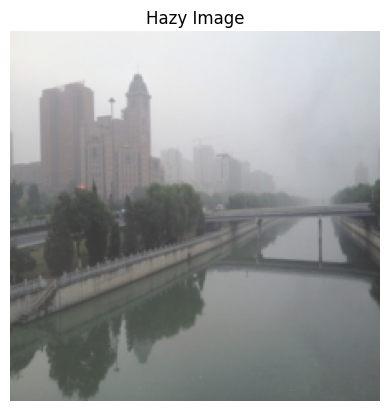

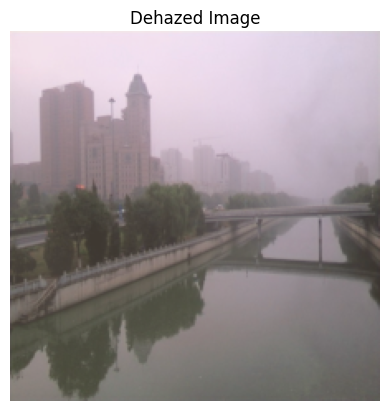

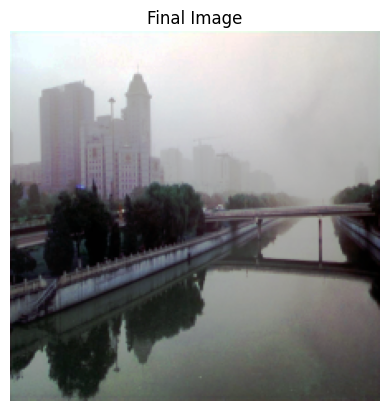

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive

# Paths for Hazy and Ground Truth Images
hazy_dir = '/content/drive/My Drive/hazy/'
# Path to the saved model
model_path = "/content/mad_modelO.pth"

# Load the trained model
class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        # Convolution to produce a single attention map
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute pixel-wise attention
        attention = self.sigmoid(self.conv(x))
        # Scale input features by attention map
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Channel Attention Layer
class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        attention = avg_out + max_out
        return x * self.sigmoid(attention)

# MultiScale Attention Layer
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)

        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)

        combined = torch.cat([small_scale, large_scale], dim=1)
        reduced = self.reduction(combined)
        return reduced

# Swin Transformer Block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4, window_size=7):
        super(SwinTransformerBlock, self).__init__()
        self.in_channels = in_channels
        self.window_size = window_size
        self.num_heads = num_heads

        self.norm1 = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(in_channels, num_heads, batch_first=True)
        self.norm2 = nn.LayerNorm(in_channels)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels * 4),
            nn.GELU(),
            nn.Linear(in_channels * 4, in_channels),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.window_size == 0 and W % self.window_size == 0, "Input dimensions must be divisible by the window size."

        # Divide into non-overlapping windows
        x = x.view(B, C, H // self.window_size, self.window_size, W // self.window_size, self.window_size)
        x = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, self.window_size ** 2, C)

        # Attention
        x = self.norm1(x)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out

        # MLP
        x = self.norm2(x)
        x = x + self.mlp(x)

        # Merge back to original shape
        x = x.reshape(B, H // self.window_size, W // self.window_size, self.window_size, self.window_size, C)
        x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, C, H, W)
        return x

# Main Dehazing Model with residual connections
class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=3):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32  # Adjust dimensions based on memory constraints

        # Pre-processing layer
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)

        # Swin Transformer blocks with residual connections and pixel-wise attention
        self.swins = nn.ModuleList([
            nn.Sequential(
                SwinTransformerBlock(self.dim, num_heads=4),
                ChannelAttention(self.dim),
                PixelWiseAttention(self.dim)  # Add pixel-wise attention here
            ) for _ in range(num_blocks)
        ])

        # Multi-scale attention
        self.multi_scale_attn = MultiScaleAttention(self.dim)

        # Post-processing layer
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)

        # Apply Swin Transformer blocks with pixel-wise attention and residual connections
        for swin in self.swins:
            x = x + swin(x)

        # Apply multi-scale attention
        x = self.multi_scale_attn(x)

        # Reconstruct final image
        x = self.post(x)
        return x + residual

model = MultiAttentionDehazingModel(num_blocks=4)
#model.load_state_dict(torch.load(model_path))
model.eval()

# Load the hazy image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.64, 0.6, 0.58], std=[0.14, 0.15, 0.152]),
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension
# Function for histogram equalization
def histogram_equalization(image_tensor):
    image = image_tensor.squeeze().permute(1, 2, 0).detach().cpu().numpy()
    image = image * np.array([0.14, 0.15, 0.152]) + np.array([0.64, 0.6, 0.58])
    image = (image * 255).astype(np.uint8)
    equalized_channels = [cv2.equalizeHist(image[:, :, c]) for c in range(3)]
    return cv2.merge(equalized_channels)
# Function to visualize the result
def display_image(tensor, title="Image"):
    image = tensor.squeeze().permute(1, 2, 0).detach()#.cpu()  # Remove batch, rearrange dims
    image = image * torch.tensor([0.14, 0.15, 0.152]) + torch.tensor([0.64, 0.6, 0.58])  # De-normalize
    image = image.clamp(0, 1)  # Clamp values to [0,1]
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to your hazy image
hazy_image_path = '/content/drive/My Drive/hazy/1968_0.8_0.12.jpg'  #hazy image path
hazy_image = load_image(hazy_image_path)

# Move to device
device = torch.device('cpu')
model.to(device)
hazy_image = hazy_image.to(device)

# Perform dehazing
with torch.no_grad():
    dehazed_image = model(hazy_image)

# Post-process and display
equalized_image = histogram_equalization(dehazed_image)
display_image(hazy_image, title="Hazy Image")
display_image(dehazed_image, title="Dehazed Image")
display_equalized_image(equalized_image, title="Final Image")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


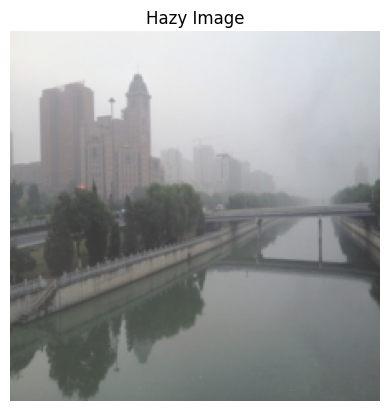

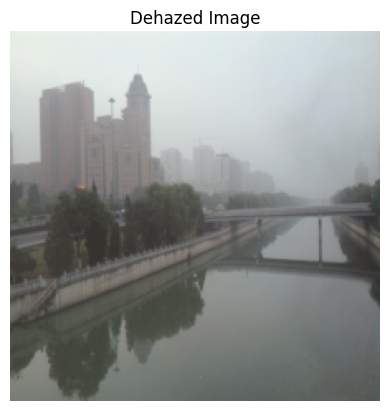

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive

# Paths for Hazy and Ground Truth Images
hazy_dir = '/content/drive/My Drive/hazy/'
# Path to the saved model
model_path = "/content/mad_modelO.pth"

# Load the trained model
class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        # Convolution to produce a single attention map
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute pixel-wise attention
        attention = self.sigmoid(self.conv(x))
        # Scale input features by attention map
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Channel Attention Layer
class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        attention = avg_out + max_out
        return x * self.sigmoid(attention)

# MultiScale Attention Layer
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)

        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)

        combined = torch.cat([small_scale, large_scale], dim=1)
        reduced = self.reduction(combined)
        return reduced

# Swin Transformer Block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4, window_size=7):
        super(SwinTransformerBlock, self).__init__()
        self.in_channels = in_channels
        self.window_size = window_size
        self.num_heads = num_heads

        self.norm1 = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(in_channels, num_heads, batch_first=True)
        self.norm2 = nn.LayerNorm(in_channels)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels * 4),
            nn.GELU(),
            nn.Linear(in_channels * 4, in_channels),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.window_size == 0 and W % self.window_size == 0, "Input dimensions must be divisible by the window size."

        # Divide into non-overlapping windows
        x = x.view(B, C, H // self.window_size, self.window_size, W // self.window_size, self.window_size)
        x = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, self.window_size ** 2, C)

        # Attention
        x = self.norm1(x)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out

        # MLP
        x = self.norm2(x)
        x = x + self.mlp(x)

        # Merge back to original shape
        x = x.reshape(B, H // self.window_size, W // self.window_size, self.window_size, self.window_size, C)
        x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, C, H, W)
        return x

# Main Dehazing Model with residual connections
class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=3):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32  # Adjust dimensions based on memory constraints

        # Pre-processing layer
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)

        # Swin Transformer blocks with residual connections and pixel-wise attention
        self.swins = nn.ModuleList([
            nn.Sequential(
                SwinTransformerBlock(self.dim, num_heads=4),
                ChannelAttention(self.dim),
                PixelWiseAttention(self.dim)  # Add pixel-wise attention here
            ) for _ in range(num_blocks)
        ])

        # Multi-scale attention
        self.multi_scale_attn = MultiScaleAttention(self.dim)

        # Post-processing layer
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)

        # Apply Swin Transformer blocks with pixel-wise attention and residual connections
        for swin in self.swins:
            x = x + swin(x)

        # Apply multi-scale attention
        x = self.multi_scale_attn(x)

        # Reconstruct final image
        x = self.post(x)
        return x + residual

model = MultiAttentionDehazingModel(num_blocks=4)
#model.load_state_dict(torch.load(model_path))
model.eval()

# Load the hazy image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.64, 0.6, 0.58], std=[0.14, 0.15, 0.152]),
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to visualize the result
def display_image(tensor, title="Image"):
    image = tensor.squeeze().permute(1, 2, 0).detach()#.cpu()  # Remove batch, rearrange dims
    image = image * torch.tensor([0.14, 0.15, 0.152]) + torch.tensor([0.64, 0.6, 0.58])  # De-normalize
    image = image.clamp(0, 1)  # Clamp values to [0,1]
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to your hazy image
hazy_image_path = '/content/drive/My Drive/hazy/1968_0.8_0.12.jpg'  #hazy image path
hazy_image = load_image(hazy_image_path)

# Move to device
device = torch.device('cpu')
model.to(device)
hazy_image = hazy_image.to(device)

# Perform dehazing
with torch.no_grad():
    dehazed_image = model(hazy_image)

# Display results
display_image(hazy_image, title="Hazy Image")
display_image(dehazed_image, title="Dehazed Image")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


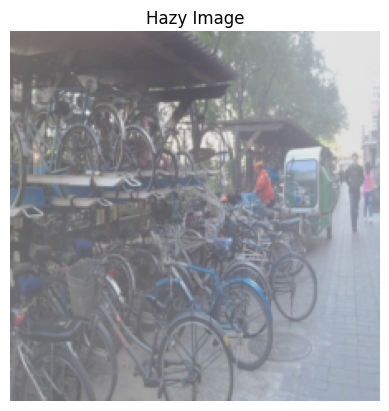

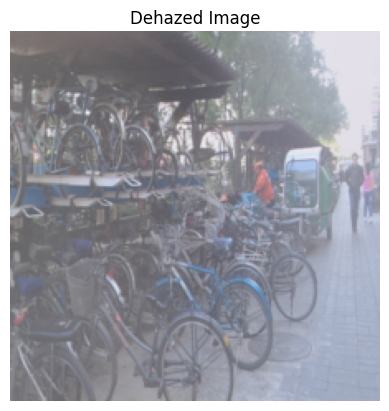

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive

# Paths for Hazy and Ground Truth Images
hazy_dir = '/content/drive/My Drive/hazy/'
# Path to the saved model
model_path = "/content/mad_modelO.pth"

# Load the trained model
class PixelWiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(PixelWiseAttention, self).__init__()
        # Convolution to produce a single attention map
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute pixel-wise attention
        attention = self.sigmoid(self.conv(x))
        # Scale input features by attention map
        return x * attention

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, padding=padding, stride=stride, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

# Channel Attention Layer
class ChannelAttention(nn.Module):
    def __init__(self, channel, reduction=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, kernel_size=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, kernel_size=1, bias=False),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        attention = avg_out + max_out
        return x * self.sigmoid(attention)

# MultiScale Attention Layer
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels):
        super(MultiScaleAttention, self).__init__()
        self.conv_small = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv_large = DepthwiseSeparableConv(in_channels, in_channels, kernel_size=5, padding=2)

        self.reduction = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)

    def forward(self, x):
        small_scale = self.conv_small(x)
        large_scale = self.conv_large(x)

        combined = torch.cat([small_scale, large_scale], dim=1)
        reduced = self.reduction(combined)
        return reduced

# Swin Transformer Block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4, window_size=7):
        super(SwinTransformerBlock, self).__init__()
        self.in_channels = in_channels
        self.window_size = window_size
        self.num_heads = num_heads

        self.norm1 = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(in_channels, num_heads, batch_first=True)
        self.norm2 = nn.LayerNorm(in_channels)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels * 4),
            nn.GELU(),
            nn.Linear(in_channels * 4, in_channels),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.window_size == 0 and W % self.window_size == 0, "Input dimensions must be divisible by the window size."

        # Divide into non-overlapping windows
        x = x.view(B, C, H // self.window_size, self.window_size, W // self.window_size, self.window_size)
        x = x.permute(0, 2, 4, 3, 5, 1).reshape(-1, self.window_size ** 2, C)

        # Attention
        x = self.norm1(x)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out

        # MLP
        x = self.norm2(x)
        x = x + self.mlp(x)

        # Merge back to original shape
        x = x.reshape(B, H // self.window_size, W // self.window_size, self.window_size, self.window_size, C)
        x = x.permute(0, 5, 1, 3, 2, 4).reshape(B, C, H, W)
        return x

# Main Dehazing Model with residual connections
class MultiAttentionDehazingModel(nn.Module):
    def __init__(self, num_blocks=3):
        super(MultiAttentionDehazingModel, self).__init__()
        self.dim = 32  # Adjust dimensions based on memory constraints

        # Pre-processing layer
        self.pre = DepthwiseSeparableConv(3, self.dim, kernel_size=3, padding=1)

        # Swin Transformer blocks with residual connections and pixel-wise attention
        self.swins = nn.ModuleList([
            nn.Sequential(
                SwinTransformerBlock(self.dim, num_heads=4),
                ChannelAttention(self.dim),
                PixelWiseAttention(self.dim)  # Add pixel-wise attention here
            ) for _ in range(num_blocks)
        ])

        # Multi-scale attention
        self.multi_scale_attn = MultiScaleAttention(self.dim)

        # Post-processing layer
        self.post = DepthwiseSeparableConv(self.dim, 3, kernel_size=3, padding=1)

    def forward(self, x):
        residual = x
        x = self.pre(x)

        # Apply Swin Transformer blocks with pixel-wise attention and residual connections
        for swin in self.swins:
            x = x + swin(x)

        # Apply multi-scale attention
        x = self.multi_scale_attn(x)

        # Reconstruct final image
        x = self.post(x)
        return x + residual

model = MultiAttentionDehazingModel(num_blocks=4)
#model.load_state_dict(torch.load(model_path))
model.eval()

# Load the hazy image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.64, 0.6, 0.58], std=[0.14, 0.15, 0.152]),
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to visualize the result
def display_image(tensor, title="Image"):
    image = tensor.squeeze().permute(1, 2, 0).detach()#.cpu()  # Remove batch, rearrange dims
    image = image * torch.tensor([0.14, 0.15, 0.152]) + torch.tensor([0.64, 0.6, 0.58])  # De-normalize
    image = image.clamp(0, 1)  # Clamp values to [0,1]
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to your hazy image
hazy_image_path = '/content/drive/My Drive/hazy/0076_0.8_0.2.jpg'  # Replace with your hazy image path
hazy_image = load_image(hazy_image_path)

# Move to device
device = torch.device('cpu')
model.to(device)
hazy_image = hazy_image.to(device)

# Perform dehazing
with torch.no_grad():
    dehazed_image = model(hazy_image)

# Display results
display_image(hazy_image, title="Hazy Image")
display_image(dehazed_image, title="Dehazed Image")


In [ ]:
#color charcter recogntion

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import os

# Configurations
IMG_HEIGHT, IMG_WIDTH = 32, 64  # Resized image size for training
NUM_CLASSES = 36  # Assuming digits (0-9) + uppercase letters (A-Z)

# Define Deeper CNN Model
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()

        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Change input channels to 3 for RGB
        self.pool1 = nn.MaxPool2d(2, 2)  # Max pooling

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 64 filters
        self.pool2 = nn.MaxPool2d(2, 2)  # Max pooling

        # Convolutional Layer 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 128 filters
        self.pool3 = nn.MaxPool2d(2, 2)  # Max pooling

        # Convolutional Layer 4
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # 256 filters
        self.pool4 = nn.MaxPool2d(2, 2)  # Max pooling

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 2 * 4, 1024)  # Adjust input size based on final feature map
        self.fc2 = nn.Linear(1024, 512)  # Intermediate fully connected layer
        self.fc3 = nn.Linear(512, num_classes)  # Final output layer

        # Dropout layers to reduce overfitting
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pooling
        x = self.pool2(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pooling
        x = self.pool3(F.relu(self.conv3(x)))  # Conv3 -> ReLU -> Pooling
        x = self.pool4(F.relu(self.conv4(x)))  # Conv4 -> ReLU -> Pooling

        x = x.view(-1, 256 * 2 * 4)  # Flatten the output for fully connected layers
        x = F.relu(self.fc1(x))  # Fully connected layer 1
        x = self.dropout(x)  # Apply dropout to reduce overfitting
        x = F.relu(self.fc2(x))  # Fully connected layer 2
        x = self.fc3(x)  # Output layer (classification)

        return x

# Dataset class (for loading character images)
class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Traverse the dataset directory and collect image paths and their corresponding labels
        for label, folder in enumerate(os.listdir(root_dir)):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                for img_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_name)
                    if img_path.endswith(".png") or img_path.endswith(".jpg"):  # Filter for images
                        self.image_paths.append(img_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open the image
        image = Image.open(img_path).convert("RGB")

        # Apply the transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

# Define the data transformations ( resizing and normalization)
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize all images to 32x64
    transforms.ToTensor(),       # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# Define the root directory where the dataset is stored
root_dir = '/content/drive/My Drive/train_char/'

# Initialize the deeper model
model = DeeperCharRecogCNN(num_classes=36)#.cuda()  # Assuming 36 classes (0-9, A-Z)
print(model)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 10
train_loader = DataLoader(CharacterDataset(root_dir, transform), batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs, labels#.cuda()

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    model_save_path = "/content/drive/My Drive/DeepCharRecogCNN.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved at {model_save_path}")



DeeperCharRecogCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1/10, Loss: 1.697409210928724
Model saved at /content/drive/My Drive/DeepCharRecogCNN.p

In [ ]:
#grayscale character recognition moddel (here only are code as we trained that on digfferent google collab )

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import os
from google.colab import drive

drive.mount('/content/drive')

# Configurations
IMG_HEIGHT, IMG_WIDTH = 28, 28  # Resized image size for training
NUM_CLASSES = 36  # Assuming digits (0-9) + uppercase letters (A-Z)

# Define Deeper CNN Model for Grayscale Images
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Compute the flattened size of the feature maps dynamically
        self._to_linear = None
        self._define_linear_input((1, IMG_HEIGHT, IMG_WIDTH))

        # Fully Connected Layers
        self.fc1 = nn.Linear(self._to_linear, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def _define_linear_input(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            x = self.pool4(F.relu(self.conv4(x)))
            self._to_linear = x.view(-1).shape[0]

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Dataset class (for loading character images)
class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Traverse the dataset directory and collect image paths and their corresponding labels
        for label, folder in enumerate(os.listdir(root_dir)):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                for img_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_name)
                    if img_path.endswith(".png") or img_path.endswith(".jpg"):
                        self.image_paths.append(img_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open the image as grayscale
        image = Image.open(img_path).convert("L")

        # Apply the transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

# Define the data transformations (resizing and normalization for grayscale images)
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),  # Resize all images to 32x64
    transforms.ToTensor(),       # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale images
])

# Define the root directory where the dataset is stored
root_dir = '/content/drive/My Drive/train_char/'

# Initialize the deeper model
model = DeeperCharRecogCNN(num_classes=NUM_CLASSES)  # For grayscale images
print(model)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 20
train_loader = DataLoader(CharacterDataset(root_dir, transform), batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        print(f"Input shape: {inputs.shape}")  # Debug input shape
        print(f"Labels shape: {labels.shape}")  # Debug label shape

        optimizer.zero_grad()

        outputs = model(inputs)
        print(f"Outputs shape: {outputs.shape}")  # Debug output shape

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Save the model
model_save_path = "/content/drive/My Drive/DeepCharRecogCNN_Grayscale.pt"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")


In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 19.9 MB/s eta 0:00:00


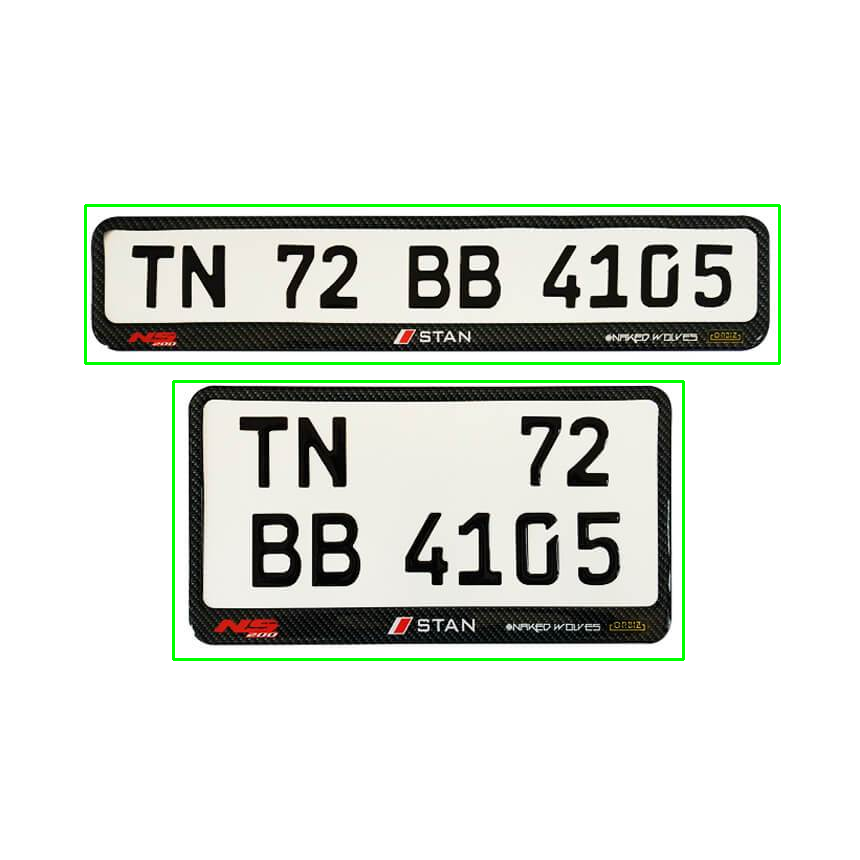

Recognized License Plate: AB


In [ ]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from google.colab.patches import cv2_imshow

# Load pre-trained model (assuming model weights and structure are already defined)
class DeeperCharRecogCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCharRecogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 2 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the model and set to evaluation mode
num_classes = 36
model = DeeperCharRecogCNN(num_classes=num_classes)
model.load_state_dict(torch.load("/content/drive/My Drive/DeepCharRecogCNN1.pth"))
model.eval()

# Load and preprocess the image
image = cv2.imread("/content/drive/My Drive/00000194.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Contrast Enhancement (Histogram Equalization)
enhanced = cv2.equalizeHist(gray)

# Step 2: Adaptive Thresholding
thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Edge Detection (Stronger Canny Edges)
edges = cv2.Canny(thresh, 100, 200)  # Increased edge strength
dilated_edges = cv2.dilate(edges, None, iterations=2)  # Increase dilation

# Step 4: Find contours and apply Non-Maximum Suppression
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

recognized_text = []

# Process each contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Filter out noise based on size
    if w < 10 or h < 20:
        continue

    # Crop and resize each character region
    char_img = thresh[y:y+h, x:x+w]
    char_img_resized = cv2.resize(char_img, (32, 64))
    char_img_resized = cv2.cvtColor(char_img_resized, cv2.COLOR_GRAY2RGB)
    char_img_resized = np.transpose(char_img_resized, (2, 0, 1)) / 255.0
    char_tensor = torch.tensor(char_img_resized, dtype=torch.float32).unsqueeze(0)

    # Predict character
    with torch.no_grad():
        output = model(char_tensor)
        _, predicted_class = torch.max(output, 1)
        recognized_char = chr(predicted_class.item() + ord('0'))  # Adjust based on class labels

        recognized_text.append(recognized_char)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display results
cv2_imshow(image)

# Output recognized text
license_plate = ''.join(recognized_text)
print("Recognized License Plate:", license_plate)


In [ ]:
# GRAYSCALE CHARACTER RECOGNITION CODES,
#model has been trained on the other google collab due to data gpu issue on this(T4 ws not available at that time)

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 15.0 MB/s eta 0:00:00
